# Project

## Overview

For this project you must create a data set by simulating a real-world phenomenon of your choosing. In this project you should:

 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
 - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
 - Synthesise/simulate a data set as closely matching their properties as possible.
 - Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
 
## Introduction

For this project I have choosen to look at the global Carbon dioxide (CO<sub>2</sub>) emissions, I have taken the data from owid co2data<sup>1</sup>.

CO<sub>2</sub> emissions have risen dramatically since the start of the industrial revolution. Most of the world's greenhouse gas emissions come from a relatively small number of countries. China, the United States, Russia and the European Union are the largest emittors on an absolute basis. However when you look at per capita the United State are the largest emittors<sup>2</sup>. 

In this notebook I will examine these countries along with others to examine if there is any correlation between CO<sub>2</sub> emissions and other variables such as population and GDP.

I have included data on the increase in temperature to show the correlation between CO<sub>2</sub> and the increase in global temperatures. As this is a well known phenomenon it will not be explored in this notebook. It is here for illustrative purposes and to highlight the need to change CO<sub>2</sub> emissions if we are to halt climate change.

I have included the codebook from Our World in Data, for information on all the columns and the meanings of each column.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import os

In [98]:
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

In [97]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Reading in the Data

In [2]:
dfco2_Data = pd.read_excel("owid-co2-data.xlsx")
dftemp_data = pd.read_csv("temperature-anomaly.csv")

## Why CO<sub>2</sub> Emissions Matter

I have included the data for the global increase in temperature to show how the world's temperature has been rising since the indutrial revolution. This data was taken from Our World in Data<sup>3</sup>.

In [3]:
dftemp_data = pd.read_csv("temperature-anomaly.csv")

In [4]:
dftemp_data

Entity  Code  Year  Median temperature anomaly from 1961-1990 average  \
0     Global   NaN  1850                                             -0.373   
1     Global   NaN  1851                                             -0.218   
2     Global   NaN  1852                                             -0.228   
3     Global   NaN  1853                                             -0.269   
4     Global   NaN  1854                                             -0.248   
..       ...   ...   ...                                                ...   
675  Tropics   NaN  2015                                              0.737   
676  Tropics   NaN  2016                                              0.763   
677  Tropics   NaN  2017                                              0.563   
678  Tropics   NaN  2018                                              0.473   
679  Tropics   NaN  2019                                              0.656   

     Upper bound (95% CI)  Lower bound (95% CI)  
0                  -0.339                -0.425  
1                  -0.184                -0.274  
2                  -0.196                -0.280  
3                  -0.239                -0.321  
4                  -0.218                -0.301  
..                    ...                   ...  
675                 0.781                 0.690  
676                 0.806                 0.713  
677                 0.607                 0.514  
678                 0.517                 0.424  
679                 0.703                 0.607  

[680 rows x 6 columns]

In [5]:
dftemp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Entity                                             680 non-null    object 
 1   Code                                               0 non-null      float64
 2   Year                                               680 non-null    int64  
 3   Median temperature anomaly from 1961-1990 average  680 non-null    float64
 4   Upper bound (95% CI)                               680 non-null    float64
 5   Lower bound (95% CI)                               680 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 32.0+ KB


In [6]:
dftemp_data.describe()

Code         Year  Median temperature anomaly from 1961-1990 average  \
count   0.0   680.000000                                         680.000000   
mean    NaN  1934.500000                                          -0.081219   
std     NaN    49.110047                                           0.308487   
min     NaN  1850.000000                                          -0.668000   
25%     NaN  1892.000000                                          -0.302000   
50%     NaN  1934.500000                                          -0.141500   
75%     NaN  1977.000000                                           0.068750   
max     NaN  2019.000000                                           1.064000   

       Upper bound (95% CI)  Lower bound (95% CI)  
count            680.000000            680.000000  
mean              -0.041969             -0.128060  
std                0.306076              0.316637  
min               -0.630000             -0.777000  
25%               -0.263500             -0.355750  
50%               -0.107500             -0.190000  
75%                0.093250              0.038750  
max                1.096000              1.027000

<AxesSubplot:xlabel='Year', ylabel='Median temperature anomaly from 1961-1990 average'>

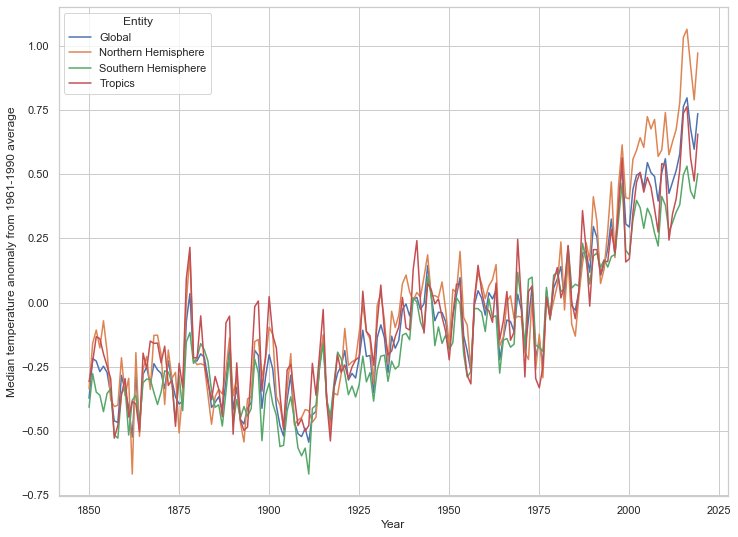

In [7]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftemp_data, x='Year', y='Median temperature anomaly from 1961-1990 average', hue='Entity')

## Examining the Data

The dataset obtained from Our World in Data is an extremely thorough and large dataset. Therefore throughout this notebook it will be broken down into more accessible dataframes, that will allow for analysis.

Before I begin the analysis the data will be examined, it is important to examine a dataset before analysis. I will examine the data using .head(), .info() and .describe(). I will also ascertain the percentage of NaN in the data as this will limit the analysis if it is extremely prevailant in a variable that variable will not be used.

In [8]:
dfco2_Data.head()

iso_code      country  year    co2  consumption_co2  co2_growth_prct  \
0      AFG  Afghanistan  1949  0.015              NaN              NaN   
1      AFG  Afghanistan  1950  0.084              NaN            475.0   
2      AFG  Afghanistan  1951  0.092              NaN              8.7   
3      AFG  Afghanistan  1952  0.092              NaN              0.0   
4      AFG  Afghanistan  1953  0.106              NaN             16.0   

   co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  ...  \
0             NaN        NaN           0.002                         NaN  ...   
1           0.070        NaN           0.011                         NaN  ...   
2           0.007        NaN           0.012                         NaN  ...   
3           0.000        NaN           0.012                         NaN  ...   
4           0.015        NaN           0.013                         NaN  ...   

   ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
0             NaN      NaN                 NaN            NaN   
1             NaN      NaN                 NaN            NaN   
2             NaN      NaN                 NaN            NaN   
3             NaN      NaN                 NaN            NaN   
4             NaN      NaN                 NaN            NaN   

   nitrous_oxide_per_capita  population           gdp  \
0                       NaN   7624058.0           NaN   
1                       NaN   7752117.0  9.421400e+09   
2                       NaN   7840151.0  9.692280e+09   
3                       NaN   7935996.0  1.001732e+10   
4                       NaN   8039684.0  1.063052e+10   

   primary_energy_consumption  energy_per_capita  energy_per_gdp  
0                         NaN                NaN             NaN  
1                         NaN                NaN             NaN  
2                         NaN                NaN             NaN  
3                         NaN                NaN             NaN  
4                         NaN                NaN             NaN  

[5 rows x 58 columns]

In [9]:
dfco2_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [10]:
dfco2_Data.describe()

year           co2  consumption_co2  co2_growth_prct  \
count  25204.000000  23949.000000      3976.000000     24931.000000   
mean    1953.225797    267.861942       916.755170        21.098600   
std       53.791369   1521.680894      3373.348275       702.565991   
min     1750.000000      0.000000         0.197000       -99.640000   
25%     1925.000000      0.528000        10.319750        -0.450000   
50%     1967.000000      4.857000        57.091000         3.350000   
75%     1995.000000     42.818000       276.378750        10.460000   
max     2020.000000  36702.503000     36702.503000    102318.510000   

       co2_growth_abs    trade_co2  co2_per_capita  \
count    23585.000000  3976.000000    23307.000000   
mean         5.146889    -2.415624        4.170811   
std         55.259760   182.444942       14.912201   
min      -1895.244000 -1657.998000        0.000000   
25%         -0.011000    -0.892500        0.253000   
50%          0.059000     1.953000        1.250000   
75%          1.103000     9.700500        4.657500   
max       1736.258000  1028.487000      748.639000   

       consumption_co2_per_capita  share_global_co2  cumulative_co2  ...  \
count                 3976.000000      23949.000000    2.394900e+04  ...   
mean                     6.567721          4.983979    1.035710e+04  ...   
std                      6.927957         17.704994    6.120603e+04  ...   
min                      0.055000          0.000000    0.000000e+00  ...   
25%                      1.240250          0.010000    6.992000e+00  ...   
50%                      4.359500          0.060000    9.131800e+01  ...   
75%                      9.848500          0.600000    1.147514e+03  ...   
max                     57.792000        100.000000    1.696524e+06  ...   

       ghg_per_capita      methane  methane_per_capita  nitrous_oxide  \
count     5155.000000  5211.000000         5157.000000    5211.000000   
mean         8.099506    82.253370            2.046923      29.308135   
std          9.387477   566.702756            3.534126     199.291118   
min        -50.487000     0.000000            0.000000       0.000000   
25%          2.514000     2.150000            0.715000       0.535000   
50%          5.474000     9.030000            1.111000       3.590000   
75%         10.299000    31.055000            1.690000      10.570000   
max         86.991000  8660.010000           39.812000    3054.000000   

       nitrous_oxide_per_capita    population           gdp  \
count               5157.000000  2.287800e+04  1.353800e+04   
mean                   0.606690  7.072322e+07  2.877088e+11   
std                    0.844671  3.795858e+08  2.180094e+12   
min                    0.000000  1.490000e+03  5.543200e+07   
25%                    0.228000  1.291899e+06  9.828867e+09   
50%                    0.384000  4.880320e+06  3.037019e+10   
75%                    0.607000  1.759622e+07  1.268944e+11   
max                    8.239000  7.794799e+09  1.136302e+14   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
count                 8690.000000        8681.000000     6803.000000  
mean                  1569.083895       25568.487454        1.850291  
std                   9066.102799       33319.956208        1.575161  
min                      0.000000           0.000000        0.050000  
25%                      6.997000        3270.369000        0.856000  
50%                     61.404500       13701.318000        1.407000  
75%                    352.884500       35493.775000        2.351000  
max                 162194.290000      317582.498000       13.493000  

[8 rows x 56 columns]

In [11]:
dfco2_Data.isna().sum().sort_values(ascending = False) / len(dfco2_Data)

share_global_cumulative_other_co2      0.920687
share_global_other_co2                 0.920687
cumulative_other_co2                   0.920687
other_co2_per_capita                   0.920687
other_industry_co2                     0.920687
consumption_co2_per_gdp                0.850778
consumption_co2_per_capita             0.842247
trade_co2_share                        0.842247
trade_co2                              0.842247
consumption_co2                        0.842247
flaring_co2_per_capita                 0.826178
share_global_flaring_co2               0.826139
share_global_cumulative_flaring_co2    0.826139
flaring_co2                            0.826139
cumulative_flaring_co2                 0.826139
ghg_per_capita                         0.795469
methane_per_capita                     0.795390
nitrous_oxide_per_capita               0.795390
total_ghg                              0.793366
nitrous_oxide                          0.793247
methane                                0

From using .isnan it is clear that the majority of columns have greater than 50% NaN and therefore none of these will be used in the analysis. CO<sub>2</sub> and CO<sub>2</sub> growth in production have <1% and <5% NaN and will be used in analysis. CO<sub>2</sub> per capita with <8% NaN will also be examined in this analysis.

In [156]:
dfc02=dfco2_Data[['country','year', 'population', 'co2']]

<AxesSubplot:xlabel='year', ylabel='co2'>

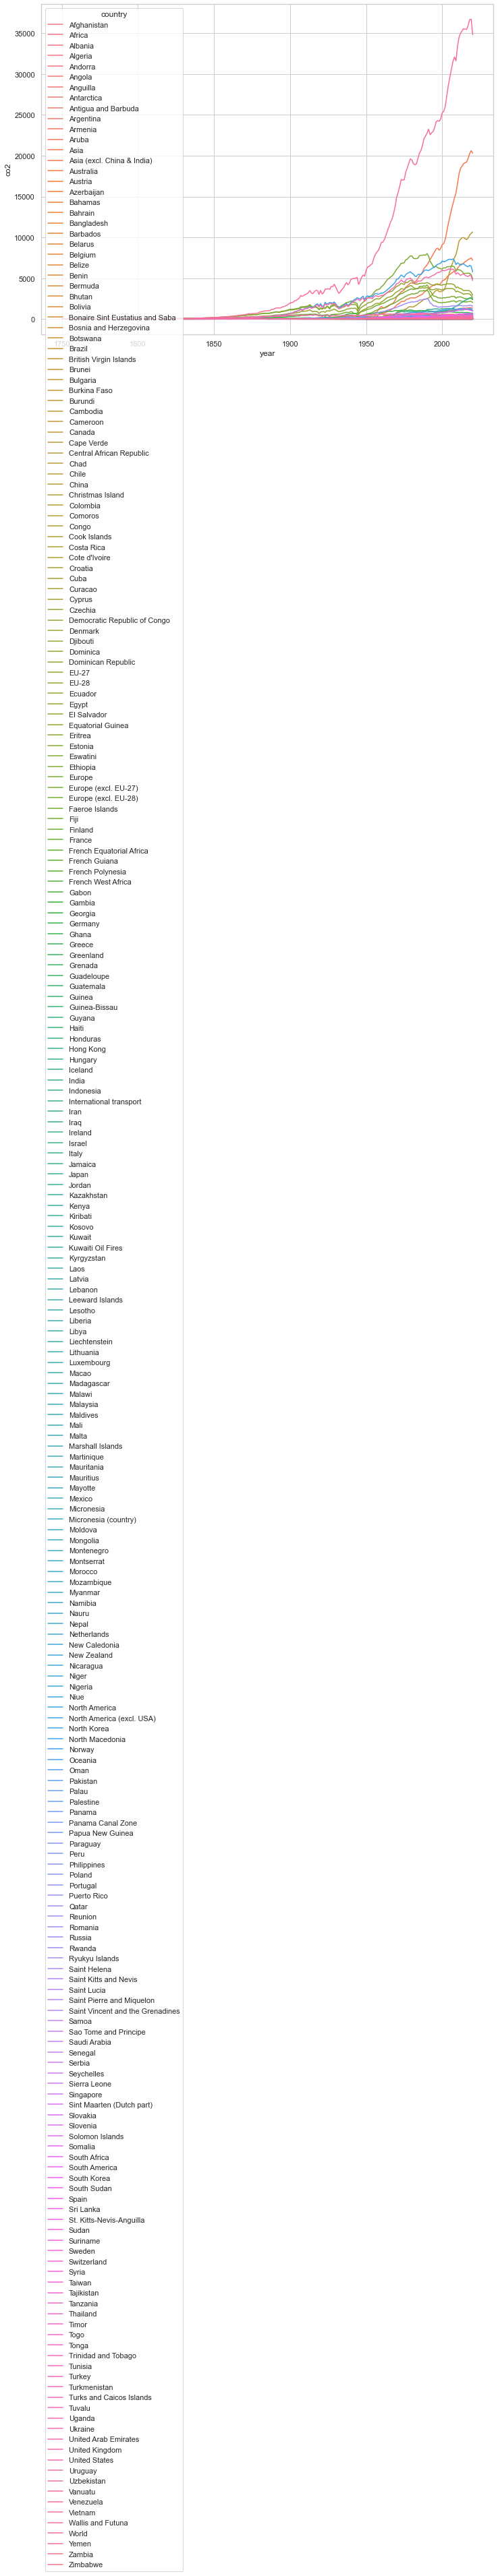

In [159]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfc02, x='year', y='co2', hue='country')

In [161]:
dfc02percapita=dfco2_Data[['country','year', 'population', 'co2_per_capita']]

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

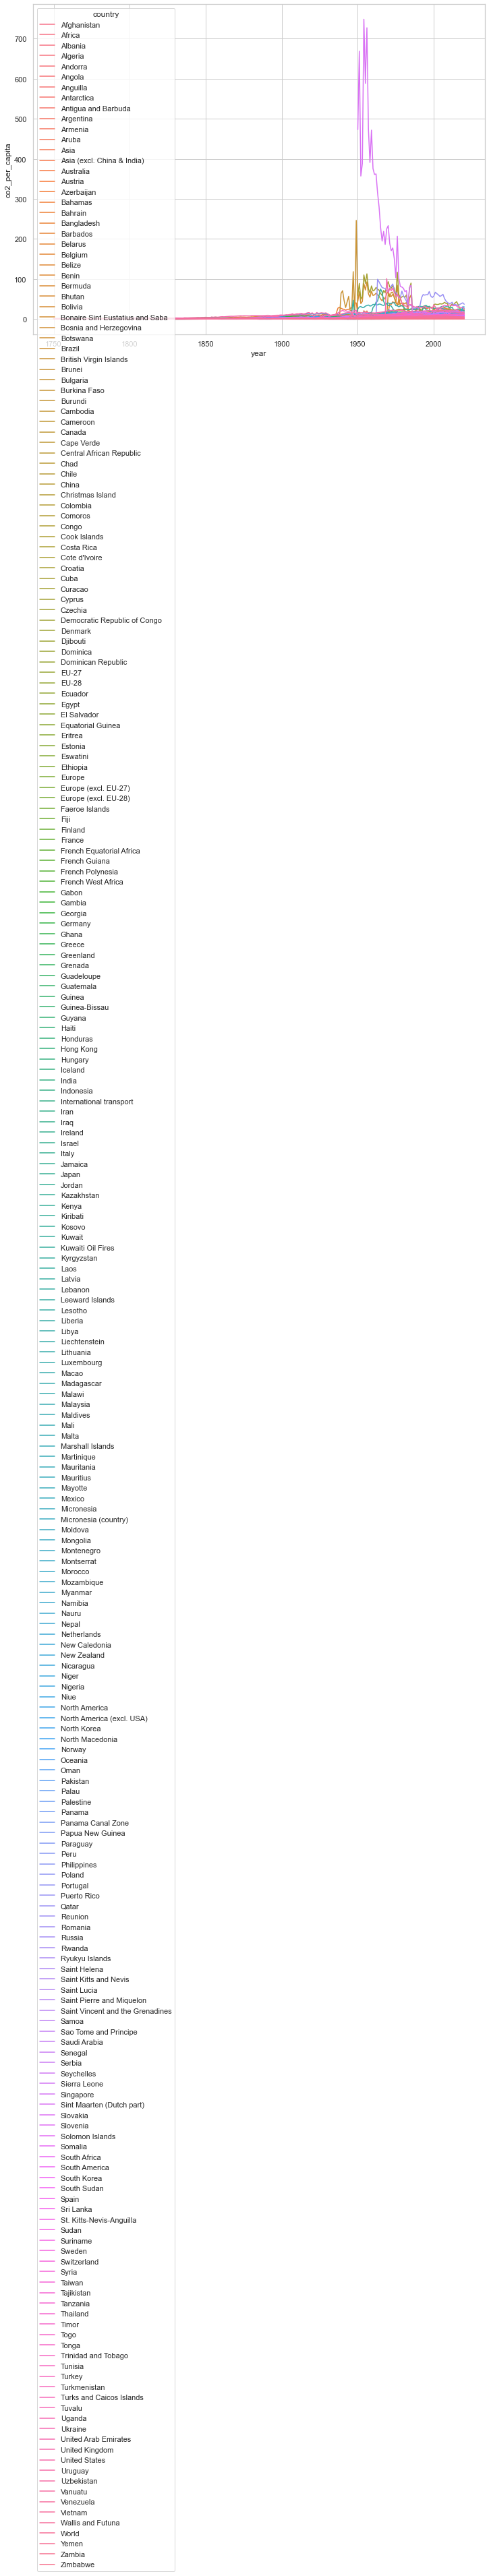

In [163]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfc02percapita, x='year', y='co2_per_capita', hue='country')

As this dataset is too large to even ascertain which countries are the largest emitters of both absolute CO<sub>2</sub> and per capita CO<sub>2</sub>, I will start by looking into continents as a whole and then specific countries in relation to population and GDP.

## Creating CO2 Emission Dataframe

In order to look at the CO2 emissions I have created a dataframe containing country, year, CO2 emissions and included population to see if there is a correlation between population and emissions.

CO2 emissions are measured in million tonnes.

In [12]:
dfc02emission=dfco2_Data[['country','year','co2', 'population']]

In [13]:
dfc02emission.set_index('country')

year     co2  population
country                              
Afghanistan  1949   0.015   7624058.0
Afghanistan  1950   0.084   7752117.0
Afghanistan  1951   0.092   7840151.0
Afghanistan  1952   0.092   7935996.0
Afghanistan  1953   0.106   8039684.0
...           ...     ...         ...
Zimbabwe     2016  10.738  14030338.0
Zimbabwe     2017   9.582  14236599.0
Zimbabwe     2018  11.854  14438812.0
Zimbabwe     2019  10.949  14645473.0
Zimbabwe     2020  10.531  14862927.0

[25204 rows x 3 columns]

### Examining CO2 Emission Dataframe

In [14]:
dfc02emission.describe()

year           co2    population
count  25204.000000  23949.000000  2.287800e+04
mean    1953.225797    267.861942  7.072322e+07
std       53.791369   1521.680894  3.795858e+08
min     1750.000000      0.000000  1.490000e+03
25%     1925.000000      0.528000  1.291899e+06
50%     1967.000000      4.857000  4.880320e+06
75%     1995.000000     42.818000  1.759622e+07
max     2020.000000  36702.503000  7.794799e+09

In [15]:
dfc02emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     25204 non-null  object 
 1   year        25204 non-null  int64  
 2   co2         23949 non-null  float64
 3   population  22878 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 787.8+ KB


### Creating the Dataframe for Each Continent


#### Africa

In [16]:
dfafrica=dfc02emission.loc[dfc02emission.country=='Africa']
dfafrica.set_index('country')

year       co2    population
country                              
Africa   1884     0.022  1.308486e+08
Africa   1885     0.037  1.315638e+08
Africa   1886     0.048  1.322848e+08
Africa   1887     0.048  1.330118e+08
Africa   1888     0.081  1.337446e+08
...       ...       ...           ...
Africa   2016  1356.719  1.213041e+09
Africa   2017  1384.372  1.244222e+09
Africa   2018  1385.645  1.275921e+09
Africa   2019  1408.479  1.308064e+09
Africa   2020  1326.044  1.340598e+09

[137 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

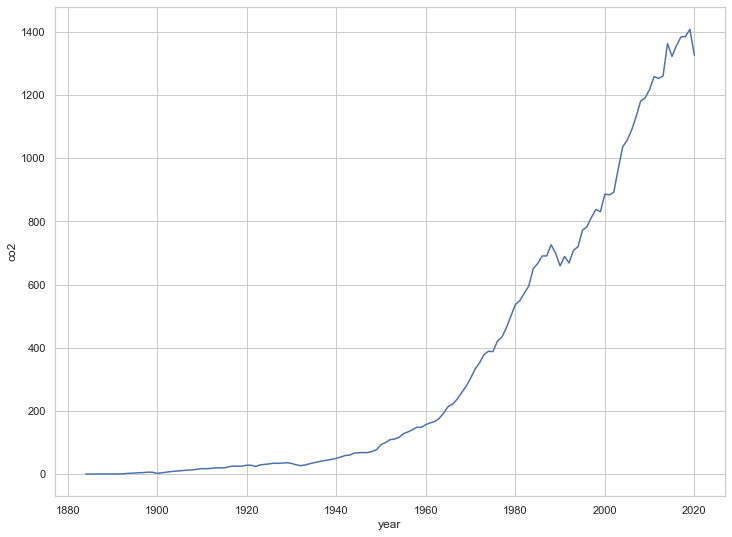

In [17]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfafrica, x='year', y='co2')

#### Asia

In [18]:
dfasia=dfc02emission.loc[dfc02emission.country=='Asia']
dfasia.set_index('country')

year        co2    population
country                               
Asia     1830      0.002  7.908359e+08
Asia     1831      0.003  7.936877e+08
Asia     1832      0.002  7.960339e+08
Asia     1833      0.002  7.978705e+08
Asia     1834        NaN  7.997160e+08
...       ...        ...           ...
Asia     2016  19218.166  4.475438e+09
Asia     2017  19653.513  4.517860e+09
Asia     2018  20254.370  4.559478e+09
Asia     2019  20608.593  4.600173e+09
Asia     2020  20317.058  4.639847e+09

[191 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

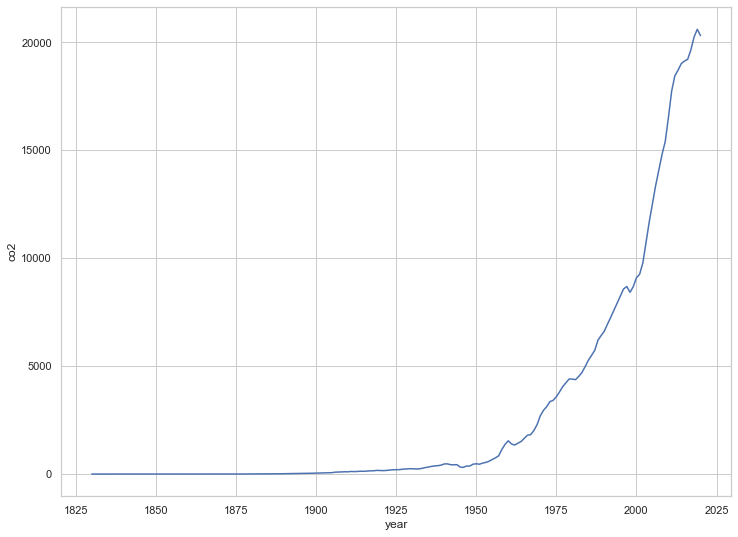

In [19]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfasia, x='year', y='co2')

#### Australia

In [20]:
dfaustralia=dfc02emission.loc[dfc02emission.country=='Australia']
dfaustralia.set_index('country')

year      co2  population
country                             
Australia  1860    0.278   1288328.0
Australia  1861    0.509   1350647.0
Australia  1862    0.355   1403026.0
Australia  1863    0.399   1444218.0
Australia  1864    0.267   1486620.0
...         ...      ...         ...
Australia  2016  415.945  24262710.0
Australia  2017  414.751  24584619.0
Australia  2018  416.001  24898153.0
Australia  2019  414.517  25203200.0
Australia  2020  391.892  25499881.0

[161 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

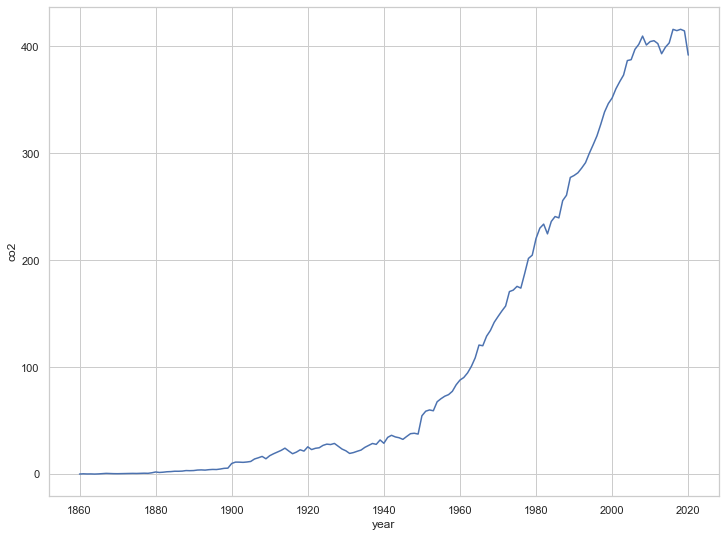

In [21]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfaustralia, x='year', y='co2')

#### Europe

In [22]:
dfeurope=dfc02emission.loc[dfc02emission.country=='Europe']
dfeurope.set_index('country')

year       co2   population
country                             
Europe   1750     9.351  150305974.0
Europe   1751     9.351          NaN
Europe   1752     9.354          NaN
Europe   1753     9.354          NaN
Europe   1754     9.358          NaN
...       ...       ...          ...
Europe   2016  5590.253  745441379.0
Europe   2017  5620.307  746596841.0
Europe   2018  5593.057  747608696.0
Europe   2019  5430.239  748381389.0
Europe   2020  4946.034  748843405.0

[271 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

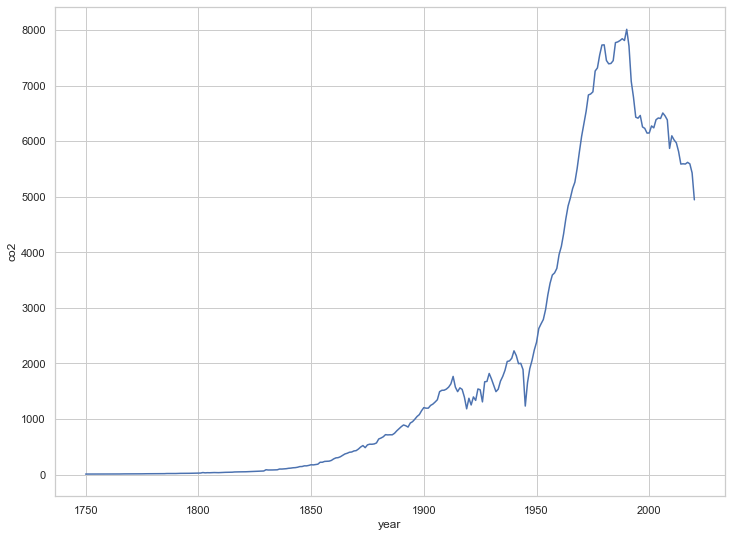

In [23]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfeurope, x='year', y='co2')

#### North America

In [24]:
dfnamerica=dfc02emission.loc[dfc02emission.country=='North America']
dfnamerica.set_index('country')

year       co2   population
country                                   
North America  1785     0.004          NaN
North America  1786     0.004          NaN
North America  1787     0.004          NaN
North America  1788     0.004          NaN
North America  1789     0.004          NaN
...             ...       ...          ...
North America  2016  6471.360  573814461.0
North America  2017  6412.982  578582963.0
North America  2018  6588.630  582921781.0
North America  2019  6460.726  587512621.0
North America  2020  5775.159  592062319.0

[236 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

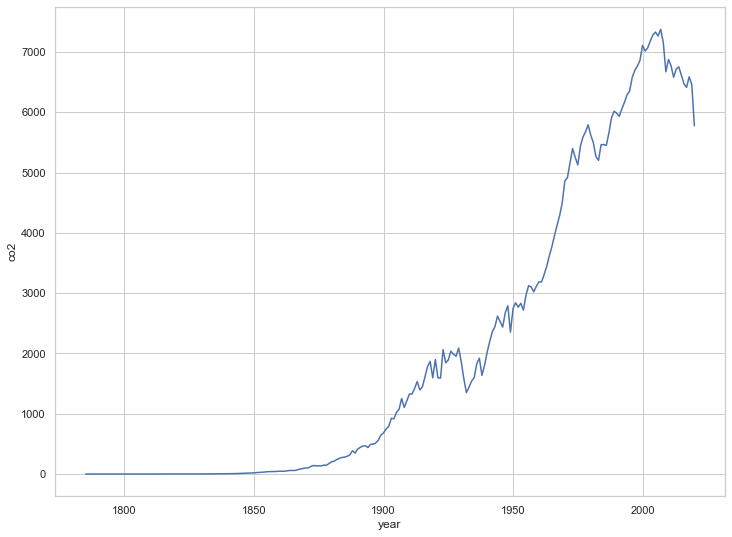

In [25]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfnamerica, x='year', y='co2')

#### South America

In [26]:
dfsamerica=dfc02emission.loc[dfc02emission.country=='South America']
dfsamerica.set_index('country')

year       co2   population
country                                   
South America  1884     0.004   30121017.0
South America  1885     0.004   30717090.0
South America  1886     0.007   31328092.0
South America  1887     1.092   31954600.0
South America  1888     0.898   32597223.0
...             ...       ...          ...
South America  2016  1164.898  416164871.0
South America  2017  1156.734  419903920.0
South America  2018  1091.450  423581098.0
South America  2019  1065.510  427199425.0
South America  2020   994.160  430759771.0

[137 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

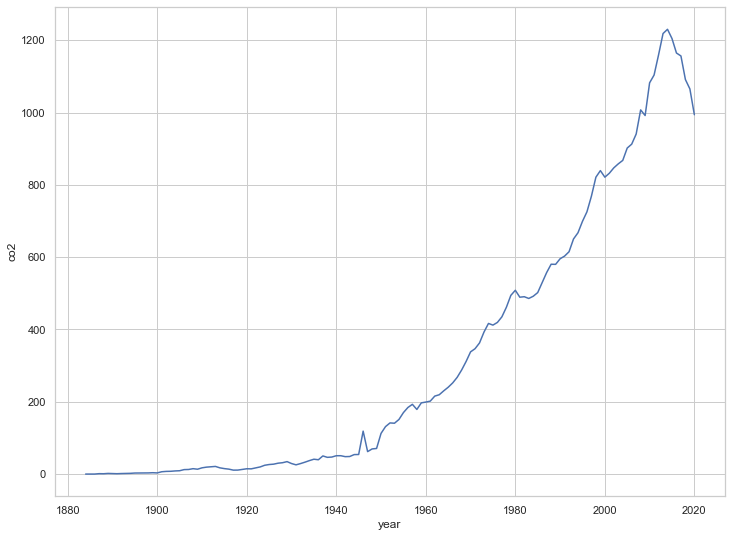

In [27]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfsamerica, x='year', y='co2')

## Global Data

As global data was not available in the original data I created a dataframe including each of the continents.

In [28]:
dfglobal_data = dfco2_Data.copy()
countries =["Asia", "Africa", "Australia","Europe","North America","South America"]

dfglobal_data= dfglobal_data.loc[dfglobal_data['country'].isin(countries)]

In [29]:
dfglobal_data

iso_code        country  year       co2  consumption_co2  \
72         NaN         Africa  1884     0.022              NaN   
73         NaN         Africa  1885     0.037              NaN   
74         NaN         Africa  1886     0.048              NaN   
75         NaN         Africa  1887     0.048              NaN   
76         NaN         Africa  1888     0.081              NaN   
...        ...            ...   ...       ...              ...   
20888      NaN  South America  2016  1164.898         1240.096   
20889      NaN  South America  2017  1156.734         1238.620   
20890      NaN  South America  2018  1091.450         1173.851   
20891      NaN  South America  2019  1065.510         1139.737   
20892      NaN  South America  2020   994.160              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
72                 NaN             NaN        NaN           0.005   
73               66.67           0.015        NaN           0.008   
74               30.00           0.011        NaN           0.010   
75                0.00           0.000        NaN           0.010   
76               69.23           0.033        NaN           0.017   
...                ...             ...        ...             ...   
20888            -3.32         -40.064     75.198           2.799   
20889            -0.70          -8.164     81.886           2.755   
20890            -5.64         -65.284     82.401           2.577   
20891            -2.38         -25.940     74.228           2.494   
20892            -6.70         -71.349        NaN           2.308   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
72                            NaN  ...             NaN      NaN   
73                            NaN  ...             NaN      NaN   
74                            NaN  ...             NaN      NaN   
75                            NaN  ...             NaN      NaN   
76                            NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
20888                       2.980  ...             NaN      NaN   
20889                       2.950  ...             NaN      NaN   
20890                       2.771  ...             NaN      NaN   
20891                       2.668  ...             NaN      NaN   
20892                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
72                    NaN            NaN                       NaN   
73                    NaN            NaN                       NaN   
74                    NaN            NaN                       NaN   
75                    NaN            NaN                       NaN   
76                    NaN            NaN                       NaN   
...                   ...            ...                       ...   
20888                 NaN            NaN                       NaN   
20889                 NaN            NaN                       NaN   
20890                 NaN            NaN                       NaN   
20891                 NaN            NaN                       NaN   
20892                 NaN            NaN                       NaN   

        population  gdp  primary_energy_consumption  energy_per_capita  \
72     130848603.0  NaN                         NaN                NaN   
73     131563803.0  NaN                         NaN                NaN   
74     132284841.0  NaN                         NaN                NaN   
75     133011765.0  NaN                         NaN                NaN   
76     133744628.0  NaN                         NaN                NaN   
...            ...  ...                         ...                ...   
20888  416164871.0  NaN                         NaN                NaN   
20889  419903920.0  NaN                         NaN                NaN   
20890  423581098.0  NaN                         NaN                NaN  

### Examining the Global Dataframe

In [30]:
dfglobal_data.describe()

year           co2  consumption_co2  co2_growth_prct  \
count  1133.000000   1111.000000       180.000000      1127.000000   
mean   1919.406884   1486.416851      4576.630350        26.360781   
std      65.552783   2903.949952      4658.179283       487.258226   
min    1750.000000      0.002000       245.907000       -57.770000   
25%    1877.000000     21.269500       634.872000         0.030000   
50%    1926.000000    215.670000      3572.678500         3.690000   
75%    1973.000000   1385.008500      7045.082750         8.230000   
max    2020.000000  20608.593000     19125.189000     14800.000000   

       co2_growth_abs    trade_co2  co2_per_capita  \
count      1102.00000   180.000000     1052.000000   
mean         30.61728  -133.733839        4.060080   
std         131.98263   500.154555        4.991994   
min        -685.56800 -1657.998000        0.000000   
25%           0.00400  -275.696500        0.506250   
50%           2.42600   -39.216000        1.584000   
75%          26.35475    82.797000        5.557500   
max        1215.68100   668.203000       19.455000   

       consumption_co2_per_capita  share_global_co2  cumulative_co2  ...  \
count                  180.000000       1111.000000     1111.000000  ...   
mean                     7.508461         24.196886    55461.484594  ...   
std                      5.933720         31.292559   113145.313246  ...   
min                      0.705000          0.000000        0.002000  ...   
25%                      2.222500          1.015000      345.205500  ...   
50%                      5.987000          4.780000     4192.222000  ...   
75%                     13.901500         40.300000    38650.851500  ...   
max                     17.914000        100.000000   532916.155000  ...   

       ghg_per_capita     methane  methane_per_capita  nitrous_oxide  \
count       27.000000   27.000000           27.000000      27.000000   
mean        28.974259  152.094815            7.688519      81.926667   
std          3.650559   16.966428            1.404896      16.558690   
min         21.394000  121.110000            5.033000      56.130000   
25%         27.708500  139.205000            6.434000      71.370000   
50%         29.143000  153.780000            7.735000      80.190000   
75%         30.950000  162.045000            8.882000      90.445000   
max         36.519000  187.380000            9.762000     117.670000   

       nitrous_oxide_per_capita    population           gdp  \
count                 27.000000  1.074000e+03  1.590000e+02   
mean                   4.131074  5.110882e+08  2.299493e+11   
std                    0.953121  7.720417e+08  3.158811e+11   
min                    2.357000  1.288328e+06  6.036576e+09   
25%                    3.271000  6.128806e+07  2.334175e+10   
50%                    4.385000  2.610533e+08  6.495578e+10   
75%                    4.792000  6.638033e+08  3.209613e+11   
max                    6.130000  4.639847e+09  1.238560e+12   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
count                  220.000000         220.000000       52.000000  
mean                 13134.111045       46862.832795        2.100173  
std                  11799.845453       33941.898895        0.330698  
min                    405.358000        2178.898000        1.527000  
25%                   1478.416000       15675.508000        1.836250  
50%                   8938.315500       35449.087000        2.189500  
75%                  24076.400500       72940.038250        2.336000  
max                  32718.297000      101186.932000        2.590000  

[8 rows x 56 columns]

In [31]:
dfglobal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 72 to 20892
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             161 non-null    object 
 1   country                              1133 non-null   object 
 2   year                                 1133 non-null   int64  
 3   co2                                  1111 non-null   float64
 4   consumption_co2                      180 non-null    float64
 5   co2_growth_prct                      1127 non-null   float64
 6   co2_growth_abs                       1102 non-null   float64
 7   trade_co2                            180 non-null    float64
 8   co2_per_capita                       1052 non-null   float64
 9   consumption_co2_per_capita           180 non-null    float64
 10  share_global_co2                     1111 non-null   float64
 11  cumulative_co2              

### Plotting the Global Data

I first plotted CO<sub>2</sub> emissions for each continent using a lineplot. Then in order to add in population I created a bubble plot of the same data but taking into account the population of each continent.

<AxesSubplot:xlabel='year', ylabel='co2'>

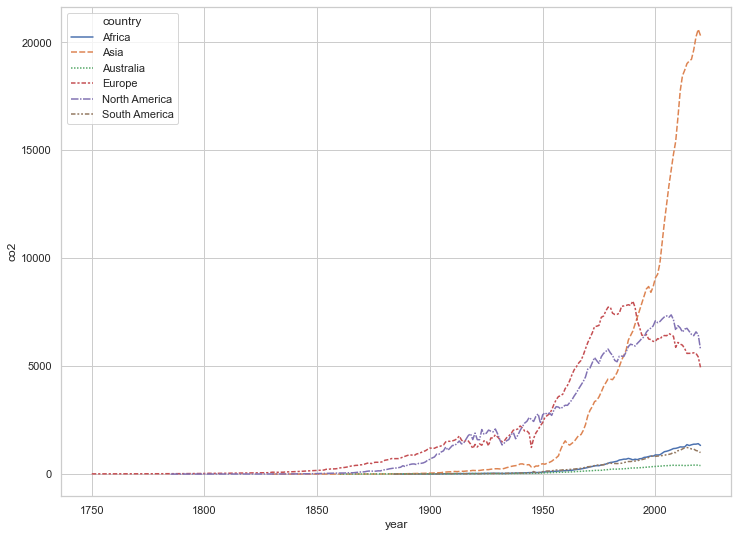

In [32]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfglobal_data, x='year', y='co2', hue='country', style ='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

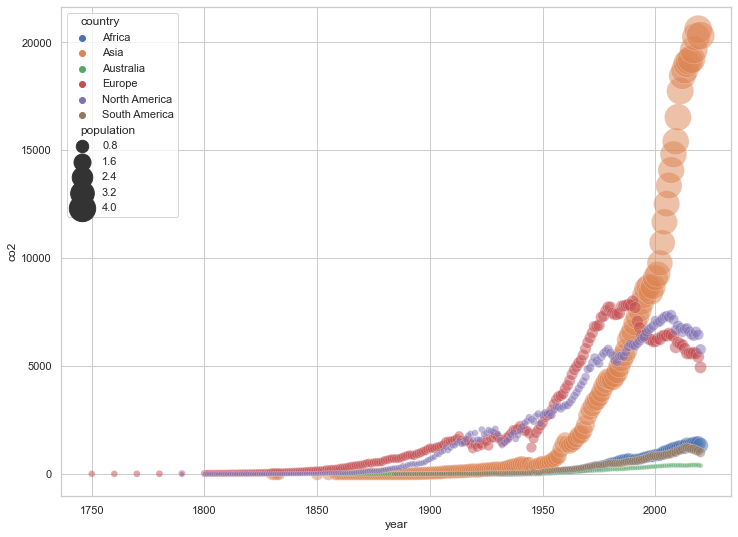

In [33]:
sns.scatterplot(data=dfglobal_data, x="year", y="co2", size="population", hue="country", alpha=0.5, sizes=(20, 800))

Absolute CO<sub>2</sub> emissions are largely made up by Asia, accounting for over 20,000 million tonnes in 2020 with Europe accounting for ~5000 million tonnes and North America for ~6000 million tonnes (5775 taken from the dfnamerica dataframe). 

In the next section of this notebook I will focus on countries within these continents.

## Exmaining Countries in Central America

In [34]:
ca_data = dfco2_Data.copy()
countries =["Guatemala", "Belize", "Panama","Costa Rica","Nicaragua","Honduras","El Salvador"]

ca_data= ca_data.loc[ca_data['country'].isin(countries)]


In [35]:
ca_data

iso_code country  year     co2  consumption_co2  co2_growth_prct  \
2738       BLZ  Belize  1950   0.018              NaN              NaN   
2739       BLZ  Belize  1951   0.026              NaN            40.00   
2740       BLZ  Belize  1952   0.026              NaN             0.00   
2741       BLZ  Belize  1953   0.029              NaN            14.29   
2742       BLZ  Belize  1954   0.029              NaN             0.00   
...        ...     ...   ...     ...              ...              ...   
17577      PAN  Panama  2016  10.555           23.169            -2.96   
17578      PAN  Panama  2017  11.212           23.903             6.22   
17579      PAN  Panama  2018  10.731           24.104            -4.29   
17580      PAN  Panama  2019  12.294           24.408            14.57   
17581      PAN  Panama  2020  10.780              NaN           -12.32   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
2738              NaN        NaN           0.266                         NaN   
2739            0.007        NaN           0.360                         NaN   
2740            0.000        NaN           0.349                         NaN   
2741            0.004        NaN           0.388                         NaN   
2742            0.000        NaN           0.377                         NaN   
...               ...        ...             ...                         ...   
17577          -0.322     12.614           2.615                       5.739   
17578           0.657     12.691           2.730                       5.820   
17579          -0.481     13.373           2.569                       5.771   
17580           1.563     12.114           2.895                       5.748   
17581          -1.514        NaN           2.498                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
2738   ...             NaN      NaN                 NaN            NaN   
2739   ...             NaN      NaN                 NaN            NaN   
2740   ...             NaN      NaN                 NaN            NaN   
2741   ...             NaN      NaN                 NaN            NaN   
2742   ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
17577  ...           6.673     5.37                1.33           1.34   
17578  ...             NaN      NaN                 NaN            NaN   
17579  ...             NaN      NaN                 NaN            NaN   
17580  ...             NaN      NaN                 NaN            NaN   
17581  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
2738                        NaN     68915.0           NaN   
2739                        NaN     71239.0           NaN   
2740                        NaN     73430.0           NaN   
2741                        NaN     75551.0           NaN   
2742                        NaN     77688.0           NaN   
...                         ...         ...           ...   
17577                     0.332   4037073.0  7.946854e+10   
17578                       NaN   4106764.0  8.334599e+10   
17579                       NaN   4176868.0  8.603574e+10   
17580                       NaN   4246440.0           NaN   
17581                       NaN   4314768.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
2738                          NaN                NaN             NaN  
2739                          NaN                NaN             NaN  
2740                          NaN                NaN             NaN  
2741                          NaN                NaN             NaN  
2742                          NaN                NaN             NaN  
...                           ...                ...             ...  
17577                     123.952    

<AxesSubplot:xlabel='year', ylabel='co2'>

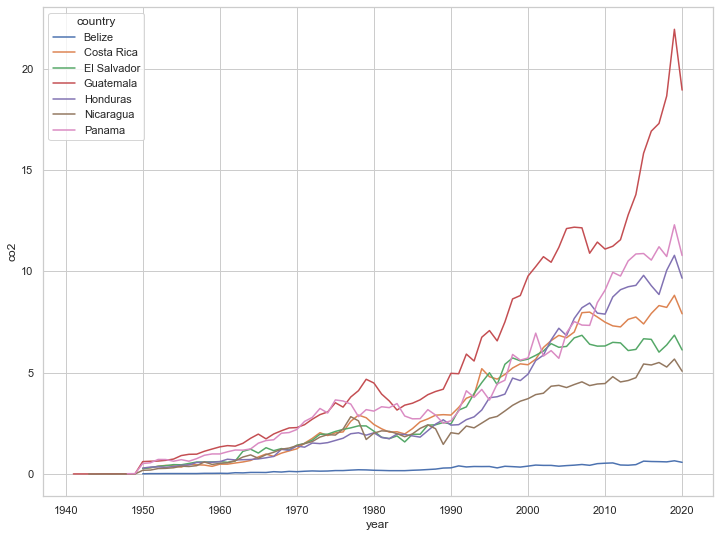

In [36]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=ca_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

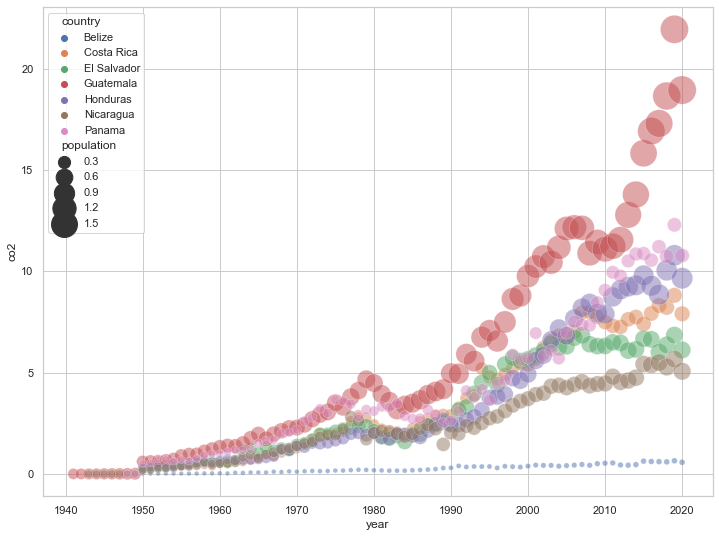

In [37]:
sns.scatterplot(data=ca_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

From the graphs above it is clear that in Central America Guatemala is the biggest emitter of CO<sub>2</sub>, having doubled it's emissions in the last 20 years. It also has the largest population of the countries in Central America followed by Honduras and Nicaragua. Despite Nicaragua being the third dentist in terms of population it is the second lowest emitter. Belize is lowest emitter of CO<sub>2</sub> and has the lowest population of all countries in Central America, with a population of 397,621 in 2020. This is taken from the command below.

In [38]:
search_name = "Belize"
ca_data.query('country==@search_name')

iso_code country  year    co2  consumption_co2  co2_growth_prct  \
2738      BLZ  Belize  1950  0.018              NaN              NaN   
2739      BLZ  Belize  1951  0.026              NaN            40.00   
2740      BLZ  Belize  1952  0.026              NaN             0.00   
2741      BLZ  Belize  1953  0.029              NaN            14.29   
2742      BLZ  Belize  1954  0.029              NaN             0.00   
...       ...     ...   ...    ...              ...              ...   
2804      BLZ  Belize  2016  0.623              NaN            -2.86   
2805      BLZ  Belize  2017  0.616              NaN            -1.18   
2806      BLZ  Belize  2018  0.605              NaN            -1.79   
2807      BLZ  Belize  2019  0.658              NaN             8.90   
2808      BLZ  Belize  2020  0.583              NaN           -11.48   

      co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
2738             NaN        NaN           0.266                         NaN   
2739           0.007        NaN           0.360                         NaN   
2740           0.000        NaN           0.349                         NaN   
2741           0.004        NaN           0.388                         NaN   
2742           0.000        NaN           0.377                         NaN   
...              ...        ...             ...                         ...   
2804          -0.018        NaN           1.691                         NaN   
2805          -0.007        NaN           1.638                         NaN   
2806          -0.011        NaN           1.578                         NaN   
2807           0.054        NaN           1.687                         NaN   
2808          -0.076        NaN           1.466                         NaN   

      ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
2738  ...             NaN      NaN                 NaN            NaN   
2739  ...             NaN      NaN                 NaN            NaN   
2740  ...             NaN      NaN                 NaN            NaN   
2741  ...             NaN      NaN                 NaN            NaN   
2742  ...             NaN      NaN                 NaN            NaN   
...   ...             ...      ...                 ...            ...   
2804  ...          13.207     1.02               2.772           0.33   
2805  ...             NaN      NaN                 NaN            NaN   
2806  ...             NaN      NaN                 NaN            NaN   
2807  ...             NaN      NaN                 NaN            NaN   
2808  ...             NaN      NaN                 NaN            NaN   

      nitrous_oxide_per_capita  population  gdp  primary_energy_consumption  \
2738                       NaN     68915.0  NaN                         NaN   
2739                       NaN     71239.0  NaN                         NaN   
2740                       NaN     73430.0  NaN                         NaN   
2741                       NaN     75551.0  NaN                         NaN   
2742                       NaN     77688.0  NaN                         NaN   
...                        ...         ...  ...                         ...   
2804                     0.897    368399.0  NaN                       3.088   
2805                       NaN    375775.0  NaN                         NaN   
2806                       NaN    383071.0  NaN                         NaN   
2807                       NaN    390351.0  NaN                         NaN   
2808                       NaN    397621.0  NaN                         NaN   

      energy_per_capita  energy_per_gdp  
2738                NaN             NaN  
2739                NaN             NaN  
2740                NaN             NaN  
2741                NaN             NaN  
2742                NaN             NaN  
...                 ...             ...  
2804           8390.657             NaN  
2805                NaN      

## Exmaining Countries in Europe

I created a dataframe containing each country in Europe, I choose to focus on the continent Europe and not the European Union.

I then used population data taken from worldometer to get the the highest populated countries and lowest populated countries<sup>4</sup> in Europe. In order to cross reference that the countries on this list were also in the data set I searched for the countries to ensure they were present.

I then choose to look at the countries with the highest level of GDP and the lowest level of GDP. As the data for GDP was patchy in the original dataset I took the information from eurostat<sup>5</sup>. 

In [39]:
# Checking to see if all EU countries are in the dataset
search_name = "Holy See"
dfco2_Data.query('country==@search_name')

Empty DataFrame
Columns: [iso_code, country, year, co2, consumption_co2, co2_growth_prct, co2_growth_abs, trade_co2, co2_per_capita, consumption_co2_per_capita, share_global_co2, cumulative_co2, share_global_cumulative_co2, co2_per_gdp, consumption_co2_per_gdp, co2_per_unit_energy, coal_co2, cement_co2, flaring_co2, gas_co2, oil_co2, other_industry_co2, cement_co2_per_capita, coal_co2_per_capita, flaring_co2_per_capita, gas_co2_per_capita, oil_co2_per_capita, other_co2_per_capita, trade_co2_share, share_global_cement_co2, share_global_coal_co2, share_global_flaring_co2, share_global_gas_co2, share_global_oil_co2, share_global_other_co2, cumulative_cement_co2, cumulative_coal_co2, cumulative_flaring_co2, cumulative_gas_co2, cumulative_oil_co2, cumulative_other_co2, share_global_cumulative_cement_co2, share_global_cumulative_coal_co2, share_global_cumulative_flaring_co2, share_global_cumulative_gas_co2, share_global_cumulative_oil_co2, share_global_cumulative_other_co2, total_ghg, ghg_per_capita, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita, population, gdp, primary_energy_consumption, energy_per_capita, energy_per_gdp]
Index: []

[0 rows x 58 columns]

In [40]:
eu_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Belgium", "Czech Republic", "Greece", "Portugal", "Sweden"
           "Hungary", "Belarus", "Austria", "Serbia", "Switzerland", "Bulgaria", "Denmark", "Finland",
           "Slovakia", "Norway", "Ireland", "Croatia", "Moldova", "Bosnia and Herzegovina", "Albania",
           "Lithuania", "North Macedonia", "Slovenia", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

eu_data= eu_data.loc[eu_data['country'].isin(countries)]

eu_data

iso_code         country  year      co2  consumption_co2  \
209        ALB         Albania  1933    0.007              NaN   
210        ALB         Albania  1934    0.007              NaN   
211        ALB         Albania  1935    0.018              NaN   
212        ALB         Albania  1936    0.128              NaN   
213        ALB         Albania  1937    0.297              NaN   
...        ...             ...   ...      ...              ...   
23842      GBR  United Kingdom  2016  399.337          543.496   
23843      GBR  United Kingdom  2017  387.565          536.924   
23844      GBR  United Kingdom  2018  381.890          539.458   
23845      GBR  United Kingdom  2019  369.010          520.696   
23846      GBR  United Kingdom  2020  329.579              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
209                NaN             NaN        NaN           0.007   
210               0.00           0.000        NaN           0.007   
211             150.00           0.011        NaN           0.017   
212             600.00           0.110        NaN           0.120   
213             131.43           0.169        NaN           0.276   
...                ...             ...        ...             ...   
23842            -5.45         -23.003    144.159           6.023   
23843            -2.95         -11.772    149.359           5.808   
23844            -1.46          -5.676    157.568           5.688   
23845            -3.37         -12.880    151.687           5.464   
23846           -10.69         -39.431        NaN           4.855   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
209                           NaN  ...             NaN      NaN   
210                           NaN  ...             NaN      NaN   
211                           NaN  ...             NaN      NaN   
212                           NaN  ...             NaN      NaN   
213                           NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
23842                       8.198  ...           6.962    52.27   
23843                       8.046  ...             NaN      NaN   
23844                       8.035  ...             NaN      NaN   
23845                       7.711  ...             NaN      NaN   
23846                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
209                   NaN            NaN                       NaN   
210                   NaN            NaN                       NaN   
211                   NaN            NaN                       NaN   
212                   NaN            NaN                       NaN   
213                   NaN            NaN                       NaN   
...                   ...            ...                       ...   
23842               0.788           28.4                     0.428   
23843                 NaN            NaN                       NaN   
23844                 NaN            NaN                       NaN   
23845                 NaN            NaN                       NaN   
23846                 NaN            NaN                       NaN   

       population           gdp  primary_energy_consumption  \
209     1032142.0           NaN                         NaN   
210     1042776.0           NaN                         NaN   
211     1053520.0           NaN                         NaN   
212     1064375.0           NaN                         NaN   
213     1075341.0           NaN                         NaN   
...           ...           ...                         ...   
23842  66297944.0  2.460057e+12                    2226.110   
23843  66727463.0  2.506604e+12                    2219.816   
23844  67141678.0  2.540210e+12                    2212.342   
23845  67530161.0           NaN                    2177.825   
23846  67886004.0           NaN              

<AxesSubplot:xlabel='year', ylabel='co2'>

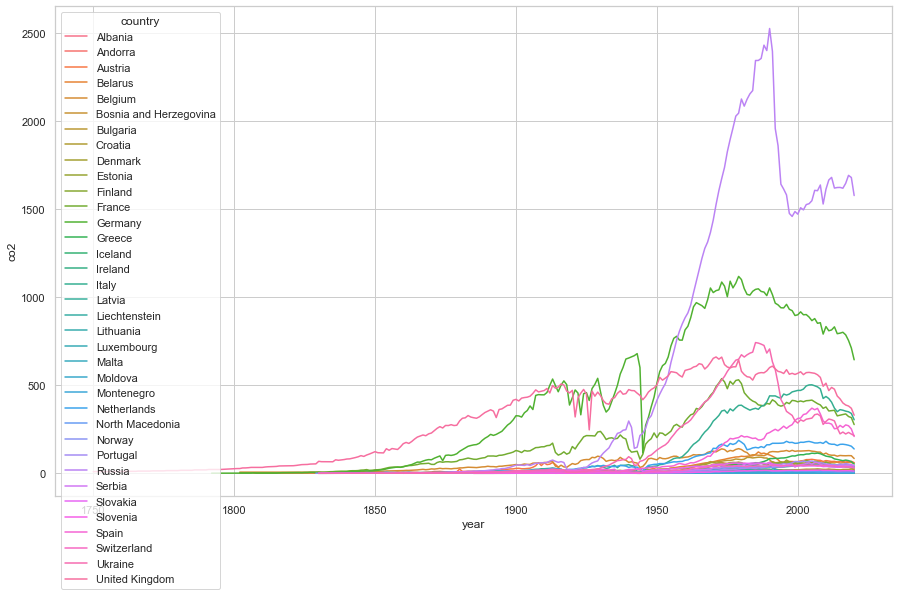

In [41]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

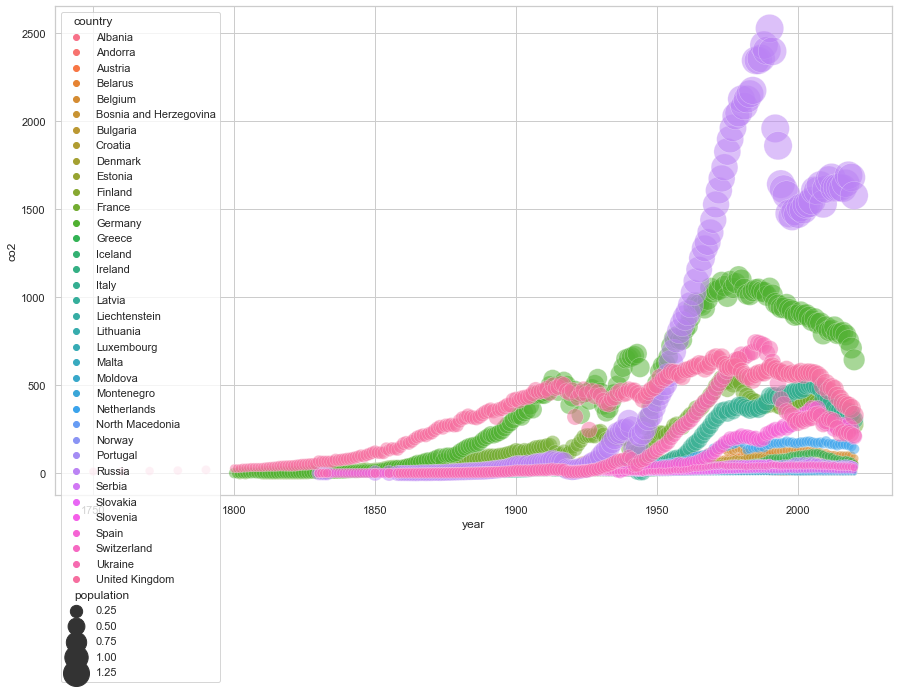

In [42]:
sns.scatterplot(data=eu_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

As it is difficult to see the data presented in the two plots above I narrowed down the countries represented. First to the ten highest populated countries and then to the ten lowest populated countries.

### Ten Highest Populated Counties

In [43]:
eu_top_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands"]

In [44]:
eu_top_pop_data = eu_top_pop_data.loc[eu_top_pop_data['country'].isin(countries)]

eu_top_pop_data

iso_code         country  year      co2  consumption_co2  \
8539       FRA          France  1802    2.239              NaN   
8540       FRA          France  1803      NaN              NaN   
8541       FRA          France  1804    2.176              NaN   
8542       FRA          France  1805      NaN              NaN   
8543       FRA          France  1806      NaN              NaN   
...        ...             ...   ...      ...              ...   
23842      GBR  United Kingdom  2016  399.337          543.496   
23843      GBR  United Kingdom  2017  387.565          536.924   
23844      GBR  United Kingdom  2018  381.890          539.458   
23845      GBR  United Kingdom  2019  369.010          520.696   
23846      GBR  United Kingdom  2020  329.579              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
8539               NaN             NaN        NaN           0.077   
8540              0.00             NaN        NaN             NaN   
8541             -2.78             NaN        NaN           0.074   
8542              0.00             NaN        NaN             NaN   
8543              0.00             NaN        NaN             NaN   
...                ...             ...        ...             ...   
23842            -5.45         -23.003    144.159           6.023   
23843            -2.95         -11.772    149.359           5.808   
23844            -1.46          -5.676    157.568           5.688   
23845            -3.37         -12.880    151.687           5.464   
23846           -10.69         -39.431        NaN           4.855   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
8539                          NaN  ...             NaN      NaN   
8540                          NaN  ...             NaN      NaN   
8541                          NaN  ...             NaN      NaN   
8542                          NaN  ...             NaN      NaN   
8543                          NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
23842                       8.198  ...           6.962    52.27   
23843                       8.046  ...             NaN      NaN   
23844                       8.035  ...             NaN      NaN   
23845                       7.711  ...             NaN      NaN   
23846                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
8539                  NaN            NaN                       NaN   
8540                  NaN            NaN                       NaN   
8541                  NaN            NaN                       NaN   
8542                  NaN            NaN                       NaN   
8543                  NaN            NaN                       NaN   
...                   ...            ...                       ...   
23842               0.788           28.4                     0.428   
23843                 NaN            NaN                       NaN   
23844                 NaN            NaN                       NaN   
23845                 NaN            NaN                       NaN   
23846                 NaN            NaN                       NaN   

       population           gdp  primary_energy_consumption  \
8539   29217510.0           NaN                         NaN   
8540   29326876.0           NaN                         NaN   
8541   29436651.0           NaN                         NaN   
8542   29546838.0           NaN                         NaN   
8543   29657436.0           NaN                         NaN   
...           ...           ...                         ...   
23842  66297944.0  2.460057e+12                    2226.110   
23843  66727463.0  2.506604e+12                    2219.816   
23844  67141678.0  2.540210e+12                    2212.342   
23845  67530161.0           NaN                    2177.825   
23846  67886004.0           NaN              

<AxesSubplot:xlabel='year', ylabel='co2'>

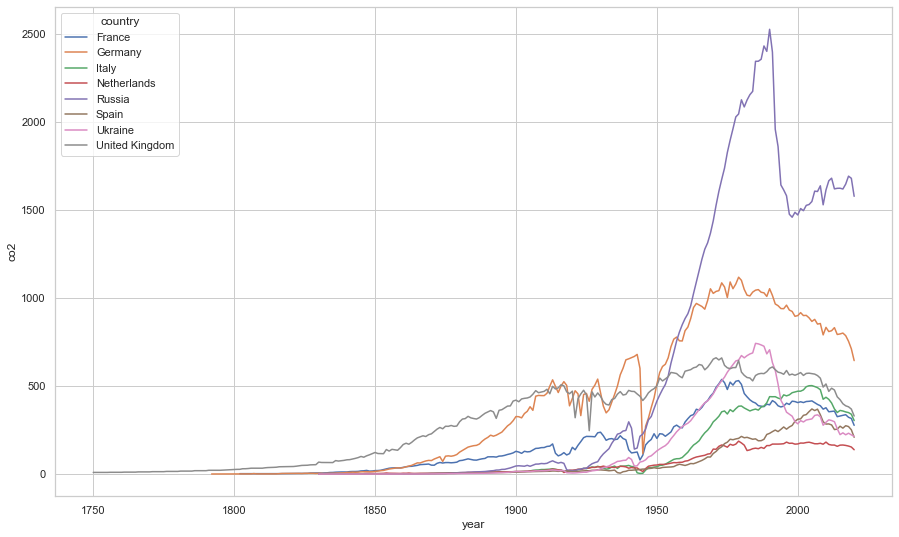

In [45]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_pop_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

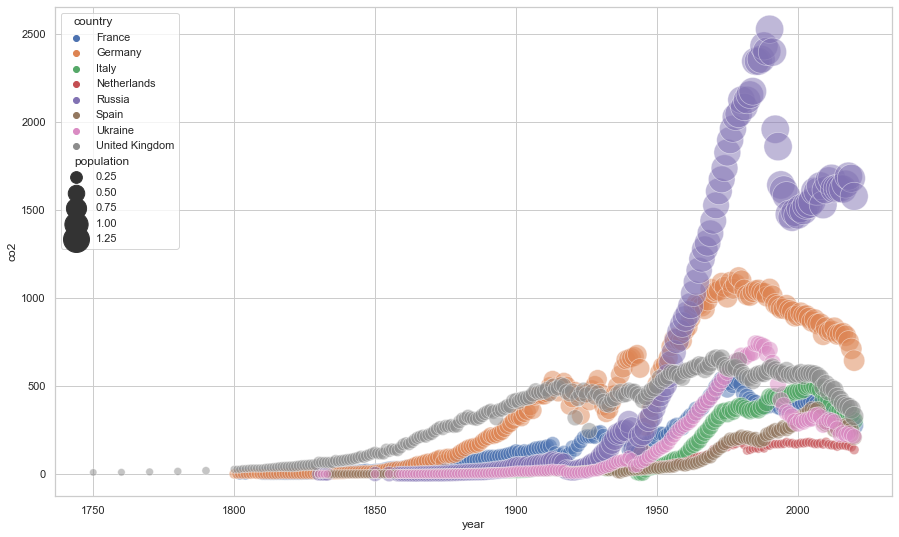

In [46]:
sns.scatterplot(data=eu_top_pop_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

### Ten Lowest Populated Counties

In [47]:
eu_low_pop_data = dfco2_Data.copy()
countries =["Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [48]:
eu_low_pop_data = eu_low_pop_data.loc[eu_low_pop_data['country'].isin(countries)]

eu_low_pop_data

iso_code     country  year    co2  consumption_co2  co2_growth_prct  \
402        AND     Andorra  1990  0.407              NaN              NaN   
403        AND     Andorra  1991  0.407              NaN             0.00   
404        AND     Andorra  1992  0.407              NaN             0.00   
405        AND     Andorra  1993  0.410              NaN             0.90   
406        AND     Andorra  1994  0.407              NaN            -0.89   
...        ...         ...   ...    ...              ...              ...   
15013      MNE  Montenegro  2016  2.015              NaN            -9.98   
15014      MNE  Montenegro  2017  2.103              NaN             4.36   
15015      MNE  Montenegro  2018  2.400              NaN            14.11   
15016      MNE  Montenegro  2019  2.645              NaN            10.21   
15017      MNE  Montenegro  2020  2.310              NaN           -12.67   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
402               NaN        NaN           7.461                         NaN   
403             0.000        NaN           7.177                         NaN   
404             0.000        NaN           6.907                         NaN   
405             0.004        NaN           6.730                         NaN   
406            -0.004        NaN           6.489                         NaN   
...               ...        ...             ...                         ...   
15013          -0.224        NaN           3.213                         NaN   
15014           0.088        NaN           3.351                         NaN   
15015           0.297        NaN           3.823                         NaN   
15016           0.245        NaN           4.212                         NaN   
15017          -0.335        NaN           3.678                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
402    ...           7.455     0.02               0.364           0.00   
403    ...           7.193     0.02               0.351           0.00   
404    ...           6.949     0.02               0.339           0.00   
405    ...           6.885     0.03               0.492           0.00   
406    ...           6.667     0.03               0.476           0.00   
...    ...             ...      ...                 ...            ...   
15013  ...           5.455     0.83               1.324           0.18   
15014  ...             NaN      NaN                 NaN            NaN   
15015  ...             NaN      NaN                 NaN            NaN   
15016  ...             NaN      NaN                 NaN            NaN   
15017  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
402                       0.000     54508.0           NaN   
403                       0.000     56666.0           NaN   
404                       0.000     58882.0           NaN   
405                       0.000     60974.0           NaN   
406                       0.000     62676.0           NaN   
...                         ...         ...           ...   
15013                     0.287    627271.0  1.096616e+10   
15014                       NaN    627563.0  1.144381e+10   
15015                       NaN    627803.0  1.198041e+10   
15016                       NaN    627988.0           NaN   
15017                       NaN    628062.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
402                           NaN                NaN             NaN  
403                           NaN                NaN             NaN  
404                           NaN                NaN             NaN  
405                           NaN                NaN             NaN  
406                           NaN                NaN             NaN  
...                           ...                ...             ...  
1

<AxesSubplot:xlabel='year', ylabel='co2'>

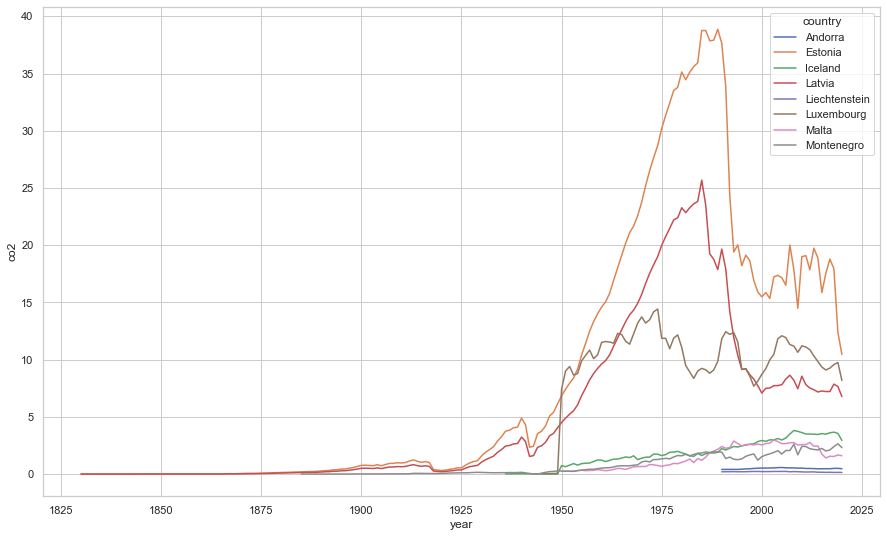

In [49]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_pop_data, x='year', y='co2', hue='country')

### Highest and Lowest Combined

In [50]:
eu_top_low_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [51]:
eu_top_low_pop_data = eu_top_low_pop_data.loc[eu_top_low_pop_data['country'].isin(countries)]

eu_top_low_pop_data

iso_code         country  year      co2  consumption_co2  \
402        AND         Andorra  1990    0.407              NaN   
403        AND         Andorra  1991    0.407              NaN   
404        AND         Andorra  1992    0.407              NaN   
405        AND         Andorra  1993    0.410              NaN   
406        AND         Andorra  1994    0.407              NaN   
...        ...             ...   ...      ...              ...   
23842      GBR  United Kingdom  2016  399.337          543.496   
23843      GBR  United Kingdom  2017  387.565          536.924   
23844      GBR  United Kingdom  2018  381.890          539.458   
23845      GBR  United Kingdom  2019  369.010          520.696   
23846      GBR  United Kingdom  2020  329.579              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
402                NaN             NaN        NaN           7.461   
403               0.00           0.000        NaN           7.177   
404               0.00           0.000        NaN           6.907   
405               0.90           0.004        NaN           6.730   
406              -0.89          -0.004        NaN           6.489   
...                ...             ...        ...             ...   
23842            -5.45         -23.003    144.159           6.023   
23843            -2.95         -11.772    149.359           5.808   
23844            -1.46          -5.676    157.568           5.688   
23845            -3.37         -12.880    151.687           5.464   
23846           -10.69         -39.431        NaN           4.855   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
402                           NaN  ...           7.455     0.02   
403                           NaN  ...           7.193     0.02   
404                           NaN  ...           6.949     0.02   
405                           NaN  ...           6.885     0.03   
406                           NaN  ...           6.667     0.03   
...                           ...  ...             ...      ...   
23842                       8.198  ...           6.962    52.27   
23843                       8.046  ...             NaN      NaN   
23844                       8.035  ...             NaN      NaN   
23845                       7.711  ...             NaN      NaN   
23846                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
402                 0.364            0.0                     0.000   
403                 0.351            0.0                     0.000   
404                 0.339            0.0                     0.000   
405                 0.492            0.0                     0.000   
406                 0.476            0.0                     0.000   
...                   ...            ...                       ...   
23842               0.788           28.4                     0.428   
23843                 NaN            NaN                       NaN   
23844                 NaN            NaN                       NaN   
23845                 NaN            NaN                       NaN   
23846                 NaN            NaN                       NaN   

       population           gdp  primary_energy_consumption  \
402       54508.0           NaN                         NaN   
403       56666.0           NaN                         NaN   
404       58882.0           NaN                         NaN   
405       60974.0           NaN                         NaN   
406       62676.0           NaN                         NaN   
...           ...           ...                         ...   
23842  66297944.0  2.460057e+12                    2226.110   
23843  66727463.0  2.506604e+12                    2219.816   
23844  67141678.0  2.540210e+12                    2212.342   
23845  67530161.0           NaN                    2177.825   
23846  67886004.0           NaN              

<AxesSubplot:xlabel='year', ylabel='co2'>

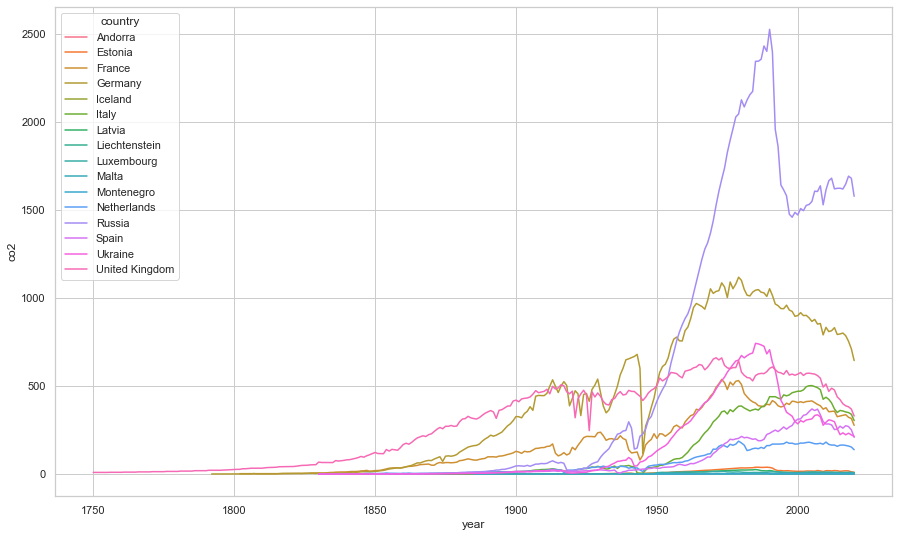

In [52]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_low_pop_data, x='year', y='co2', hue='country')

By combining the highest population data with the lowest population data it is possible to see the difference clearer than when they are plotted on different plots.

The plot for the lowest population countries did not reach 40 on the y-axis, whereas the highest populations reached over 2500, for one Russia alone.


## GDP and CO<sub>2</sub> Emissions

I will examine below if there is a correlation between GDP and CO<sub>2</sub>. Iw ould expect there to be a positive correlation between emissions on GDP, as it well understood that the richest countries are the largest emitters of CO<sub>2</sub>. 

Developed countries as a whole are responsible to 79% of emissions according to the Center for Global Development<sup>6</sup>.

I wanted to examine this first on Europe and then expand it out across the global data.

### Highest GDP Europe

In [53]:
eu_top_gdp_data = dfco2_Data.copy()
countries =["Luxembourg", "Ireland", "Switzerland","Norway","Denmark","Netherlands",
            "Austria", "Sweden", "Germany", "Iceland"]
eu_top_gdp_data = eu_top_gdp_data.loc[eu_top_gdp_data['country'].isin(countries)]

eu_top_gdp_data

iso_code      country  year     co2  consumption_co2  co2_growth_prct  \
1596       AUT      Austria  1807   0.169              NaN              NaN   
1597       AUT      Austria  1808     NaN              NaN             0.00   
1598       AUT      Austria  1809     NaN              NaN             0.00   
1599       AUT      Austria  1810     NaN              NaN             0.00   
1600       AUT      Austria  1811     NaN              NaN             0.00   
...        ...          ...   ...     ...              ...              ...   
21893      CHE  Switzerland  2016  39.193          117.007             1.19   
21894      CHE  Switzerland  2017  38.183          118.900            -2.58   
21895      CHE  Switzerland  2018  36.868          120.080            -3.44   
21896      CHE  Switzerland  2019  36.742          116.050            -0.34   
21897      CHE  Switzerland  2020  32.298              NaN           -12.09   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
1596              NaN        NaN           0.054                         NaN   
1597              NaN        NaN             NaN                         NaN   
1598              NaN        NaN             NaN                         NaN   
1599              NaN        NaN             NaN                         NaN   
1600              NaN        NaN             NaN                         NaN   
...               ...        ...             ...                         ...   
21893           0.462     77.815           4.677                      13.963   
21894          -1.010     80.718           4.516                      14.061   
21895          -1.315     83.212           4.324                      14.085   
21896          -0.126     79.308           4.277                      13.508   
21897          -4.444        NaN           3.732                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
1596   ...             NaN      NaN                 NaN            NaN   
1597   ...             NaN      NaN                 NaN            NaN   
1598   ...             NaN      NaN                 NaN            NaN   
1599   ...             NaN      NaN                 NaN            NaN   
1600   ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
21893  ...           5.575     4.86                0.58           2.19   
21894  ...             NaN      NaN                 NaN            NaN   
21895  ...             NaN      NaN                 NaN            NaN   
21896  ...             NaN      NaN                 NaN            NaN   
21897  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
1596                        NaN   3124310.0           NaN   
1597                        NaN   3142485.0           NaN   
1598                        NaN   3160765.0           NaN   
1599                        NaN   3179258.0           NaN   
1600                        NaN   3197752.0           NaN   
...                         ...         ...           ...   
21893                     0.261   8379915.0  5.085793e+11   
21894                       NaN   8455797.0  5.177307e+11   
21895                       NaN   8525614.0  5.319712e+11   
21896                       NaN   8591361.0           NaN   
21897                       NaN   8654618.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
1596                          NaN                NaN             NaN  
1597                          NaN                NaN             NaN  
1598                          NaN                NaN             NaN  
1599                          NaN                NaN             NaN  
1600                          NaN                NaN             NaN  
...                           ...               

<AxesSubplot:xlabel='year', ylabel='co2'>

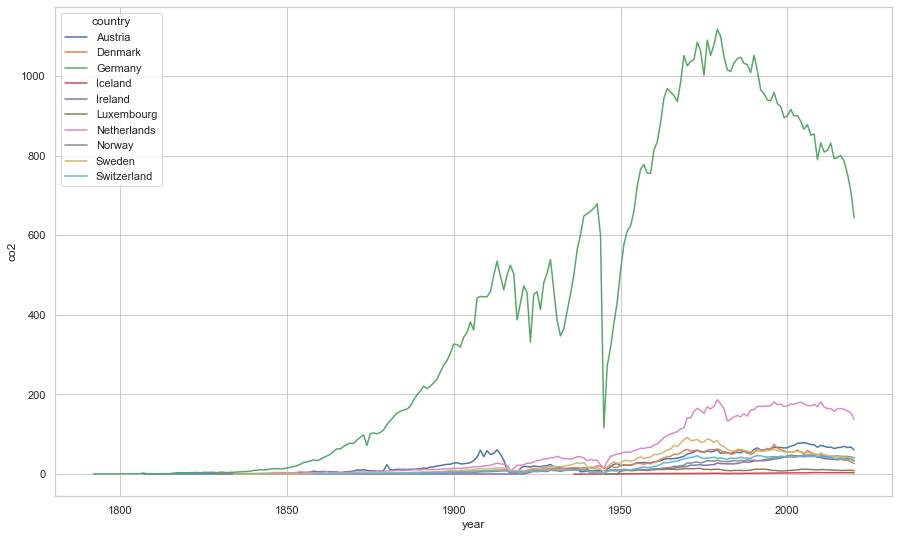

In [54]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_gdp_data, x='year', y='co2', hue='country')

Luxembourg, Ireland and Switzerland are the top three countries in terms of GDP per capita. Luxembourg is one of the lowest emitters with only Iceland emitting less CO<sub>2</sub>. Germany is by far the largest emitter of CO<sub>2</sub> followed by the Netherlands. The Netherlands ranks 6th in terms of GDP per capita and Germany 9th. 

Text(0, 0.5, 'CO2')

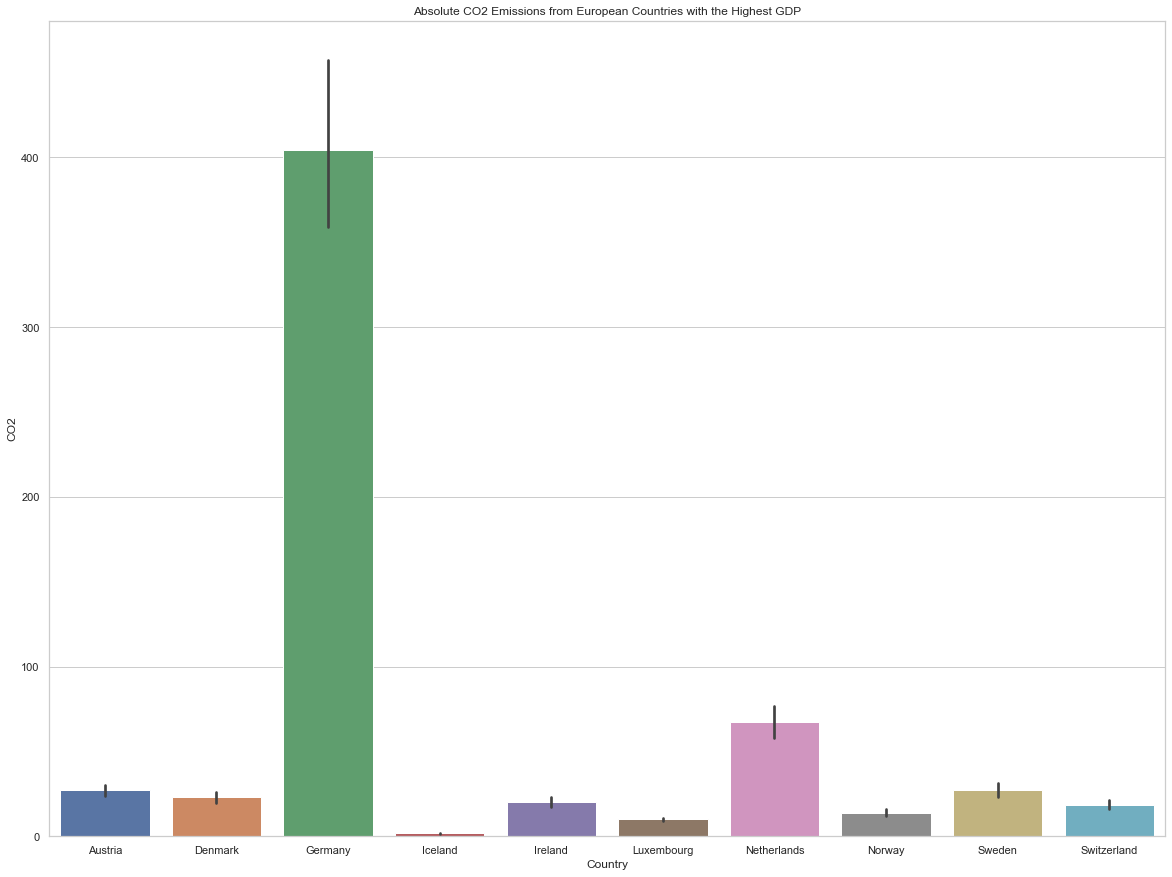

In [99]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = eu_top_gdp_data)
plt.title("Absolute CO2 Emissions from European Countries with the Highest GDP")
plt.xlabel("Country")
plt.ylabel("CO2")

Text(0, 0.5, 'CO2')

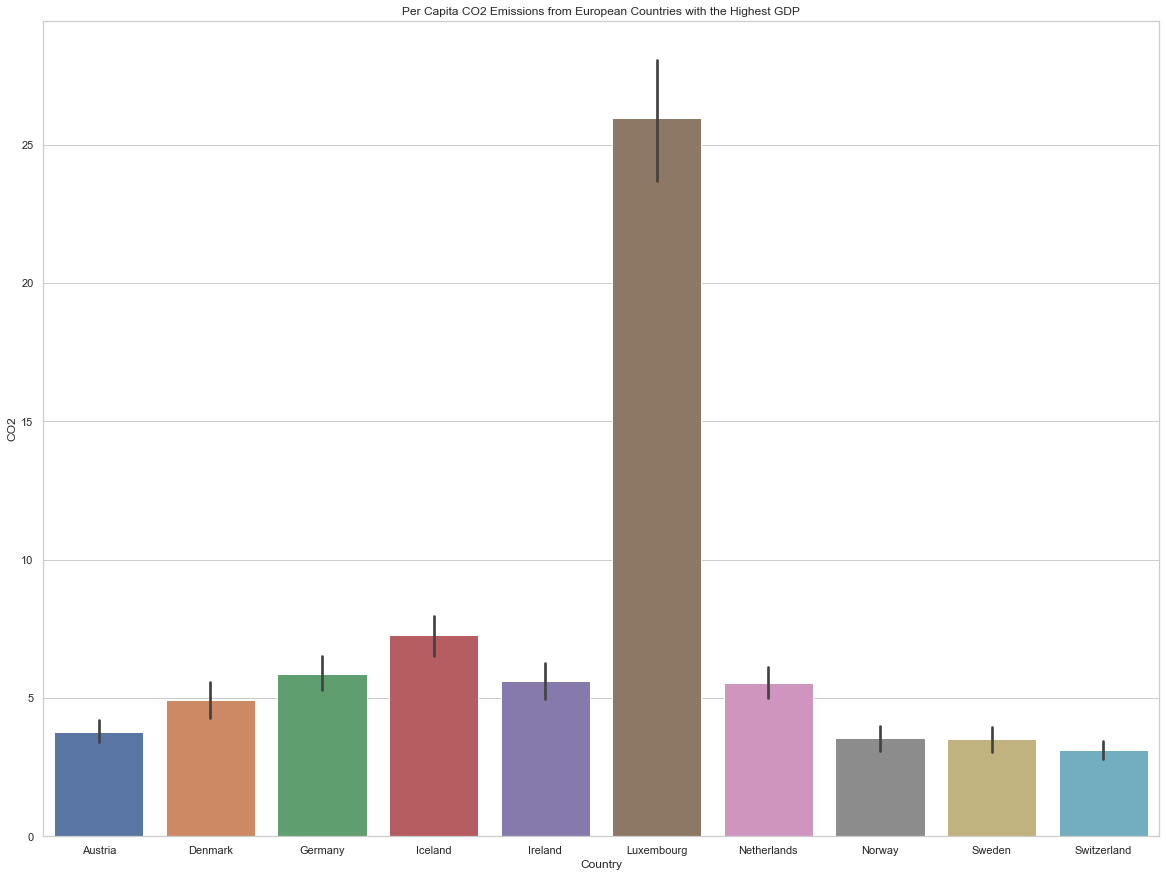

In [100]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = eu_top_gdp_data)
plt.title("Per Capita CO2 Emissions from European Countries with the Highest GDP")
plt.xlabel("Country")
plt.ylabel("CO2")

The bar charts illustrate the data in a more efficient way. It clearly shows that Germany emitts the most absolute CO<sub>2</sub> with Luxembourg being the secondest smallest emitter. But when you look at CO<sub>2</sub> per capita Luxembourg emits far more than the other countries, emitting over 25 million tonnes, with Iceland in second place emitting ~7 million tonnes.

### Lowest GDP Europe

In [55]:
eu_low_gdp_data = dfco2_Data.copy()
countries =["Albania", "Boznia and Herzegovina", "North Macedonia","Serbia","Montenegro",
            "Bulgaria", "Turkey", "Greece", "Croatia", "Slovakia"]
eu_low_gdp_data = eu_low_gdp_data.loc[eu_low_gdp_data['country'].isin(countries)]

eu_low_gdp_data

iso_code  country  year      co2  consumption_co2  co2_growth_prct  \
209        ALB  Albania  1933    0.007              NaN              NaN   
210        ALB  Albania  1934    0.007              NaN             0.00   
211        ALB  Albania  1935    0.018              NaN           150.00   
212        ALB  Albania  1936    0.128              NaN           600.00   
213        ALB  Albania  1937    0.297              NaN           131.43   
...        ...      ...   ...      ...              ...              ...   
22994      TUR   Turkey  2016  401.240          428.779             5.22   
22995      TUR   Turkey  2017  425.329          444.014             6.00   
22996      TUR   Turkey  2018  419.437          427.425            -1.39   
22997      TUR   Turkey  2019  399.345          398.699            -4.79   
22998      TUR   Turkey  2020  392.794              NaN            -1.64   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
209               NaN        NaN           0.007                         NaN   
210             0.000        NaN           0.007                         NaN   
211             0.011        NaN           0.017                         NaN   
212             0.110        NaN           0.120                         NaN   
213             0.169        NaN           0.276                         NaN   
...               ...        ...             ...                         ...   
22994          19.908     27.539           5.026                       5.371   
22995          24.089     18.685           5.243                       5.474   
22996          -5.892      7.988           5.094                       5.191   
22997         -20.092     -0.646           4.787                       4.779   
22998          -6.551        NaN           4.657                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
209    ...             NaN      NaN                 NaN            NaN   
210    ...             NaN      NaN                 NaN            NaN   
211    ...             NaN      NaN                 NaN            NaN   
212    ...             NaN      NaN                 NaN            NaN   
213    ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
22994  ...            4.96    44.55               0.558          35.18   
22995  ...             NaN      NaN                 NaN            NaN   
22996  ...             NaN      NaN                 NaN            NaN   
22997  ...             NaN      NaN                 NaN            NaN   
22998  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
209                         NaN   1032142.0           NaN   
210                         NaN   1042776.0           NaN   
211                         NaN   1053520.0           NaN   
212                         NaN   1064375.0           NaN   
213                         NaN   1075341.0           NaN   
...                         ...         ...           ...   
22994                     0.441  79827868.0  1.498503e+12   
22995                       NaN  81116451.0  1.610457e+12   
22996                       NaN  82340090.0  1.655984e+12   
22997                       NaN  83429607.0           NaN   
22998                       NaN  84339067.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
209                           NaN                NaN             NaN  
210                           NaN                NaN             NaN  
211                           NaN                NaN             NaN  
212                           NaN                NaN             NaN  
213                           NaN                NaN             NaN  
...                           ...                ...             ...  
22994        

<AxesSubplot:xlabel='year', ylabel='co2'>

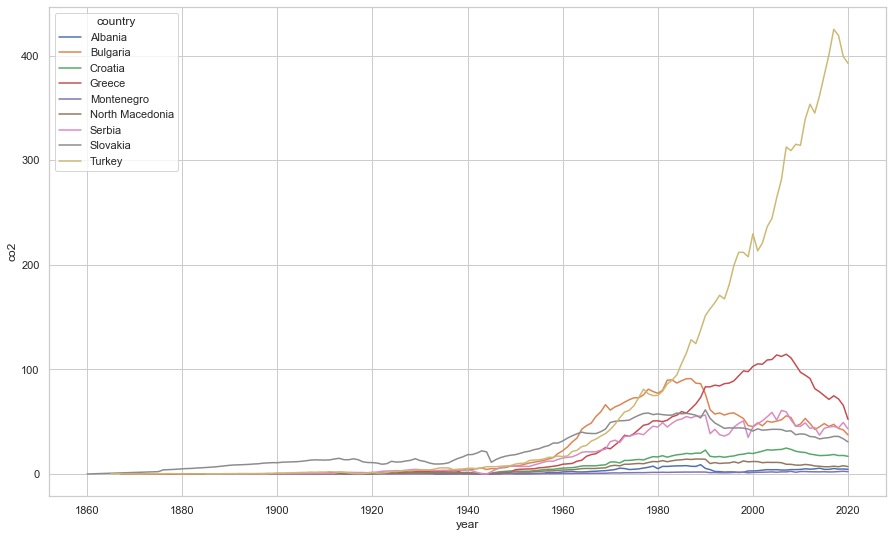

In [56]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_gdp_data, x='year', y='co2', hue='country')

Text(0, 0.5, 'CO2')

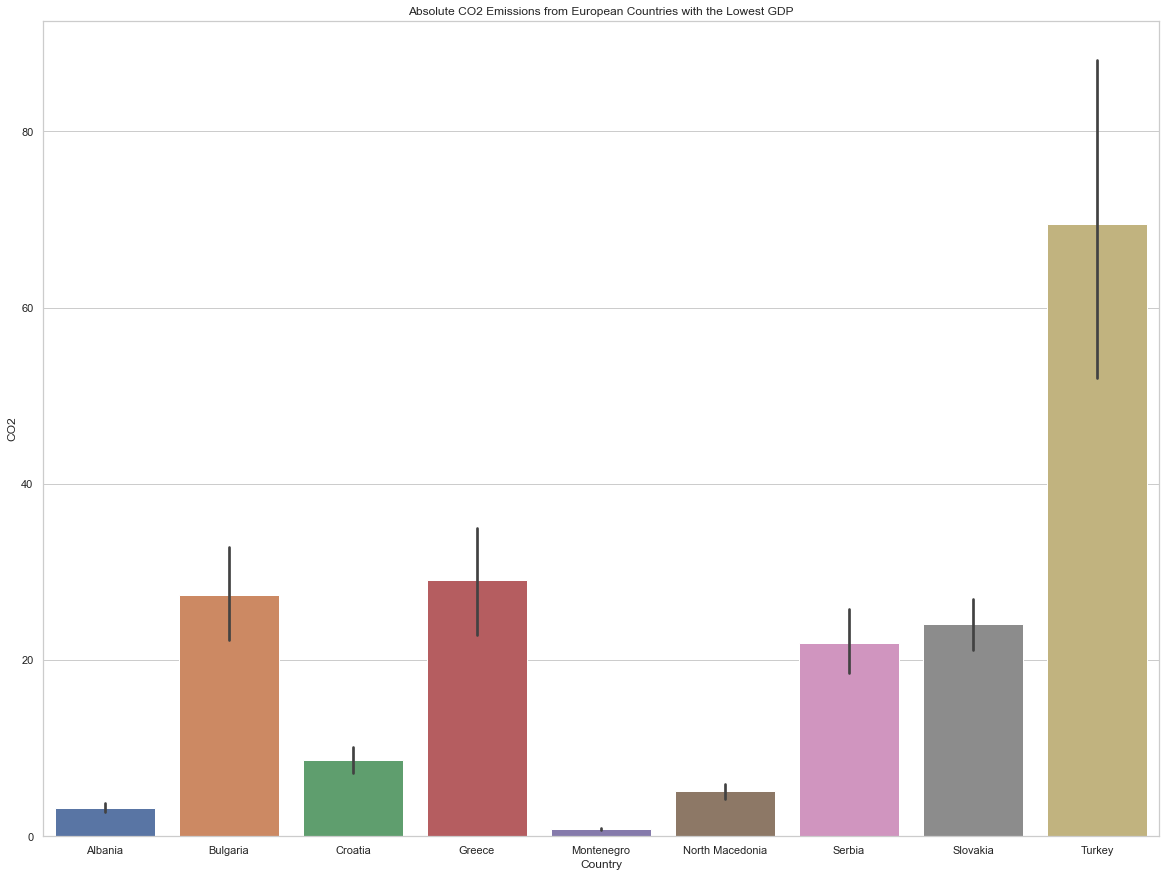

In [101]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = eu_low_gdp_data)
plt.title("Absolute CO2 Emissions from European Countries with the Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2")

Text(0, 0.5, 'CO2')

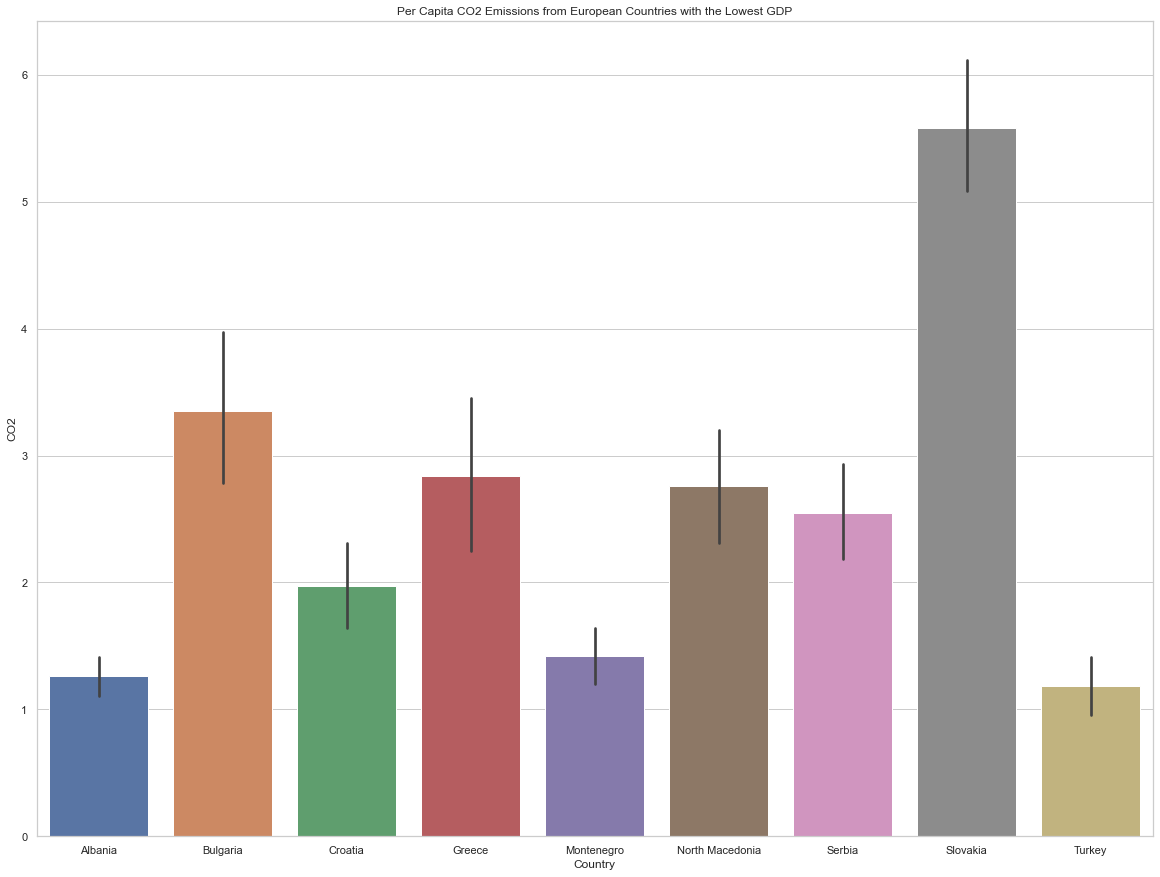

In [102]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = eu_low_gdp_data)
plt.title("Per Capita CO2 Emissions from European Countries with the Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2")

Although Turkey is the largest emitter of absolute CO<sub>2</sub> emitting ~70 million tonnes, it is one of smallest per capita emitters emitting <1.5 million tonnes.

There have been incidents of countries with high GDPs reducing their CO<sub>2</sub> emissions without decreasing their GDPs.

I will look into Sweden as an example below.

In [57]:
dfSweden=eu_top_gdp_data.loc[eu_top_gdp_data.country=='Sweden']
dfSweden

iso_code country  year     co2  consumption_co2  co2_growth_prct  \
21548      SWE  Sweden  1834   0.033              NaN              NaN   
21549      SWE  Sweden  1835     NaN              NaN             0.00   
21550      SWE  Sweden  1836     NaN              NaN             0.00   
21551      SWE  Sweden  1837     NaN              NaN             0.00   
21552      SWE  Sweden  1838     NaN              NaN             0.00   
...        ...     ...   ...     ...              ...              ...   
21730      SWE  Sweden  2016  43.262           69.940            -0.78   
21731      SWE  Sweden  2017  42.594           70.547            -1.54   
21732      SWE  Sweden  2018  42.095           71.054            -1.17   
21733      SWE  Sweden  2019  40.937           67.889            -2.75   
21734      SWE  Sweden  2020  38.635              NaN            -5.62   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
21548             NaN        NaN           0.011                         NaN   
21549             NaN        NaN             NaN                         NaN   
21550             NaN        NaN             NaN                         NaN   
21551             NaN        NaN             NaN                         NaN   
21552             NaN        NaN             NaN                         NaN   
...               ...        ...             ...                         ...   
21730          -0.341     26.678           4.398                       7.111   
21731          -0.668     27.954           4.300                       7.122   
21732          -0.498     28.959           4.222                       7.126   
21733          -1.159     26.952           4.079                       6.764   
21734          -2.302        NaN           3.826                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
21548  ...             NaN      NaN                 NaN            NaN   
21549  ...             NaN      NaN                 NaN            NaN   
21550  ...             NaN      NaN                 NaN            NaN   
21551  ...             NaN      NaN                 NaN            NaN   
21552  ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
21730  ...             4.7     4.77               0.485           4.94   
21731  ...             NaN      NaN                 NaN            NaN   
21732  ...             NaN      NaN                 NaN            NaN   
21733  ...             NaN      NaN                 NaN            NaN   
21734  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
21548                       NaN   2972567.0  4.521862e+09   
21549                       NaN   2997160.0  4.557068e+09   
21550                       NaN   3021957.0  4.760730e+09   
21551                       NaN   3046958.0  4.767672e+09   
21552                       NaN   3072167.0  4.713907e+09   
...                         ...         ...           ...   
21730                     0.502   9836003.0  4.431636e+11   
21731                       NaN   9904895.0  4.545437e+11   
21732                       NaN   9971630.0  4.634074e+11   
21733                       NaN  10036391.0           NaN   
21734                       NaN  10099270.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
21548                         NaN                NaN             NaN  
21549                         NaN                NaN             NaN  
21550                         NaN                NaN             NaN  
21551                         NaN                NaN             NaN  
21552                         NaN                NaN             NaN  
...                           ...                ...             ...  
21730                     594.882    

<AxesSubplot:xlabel='year', ylabel='co2'>

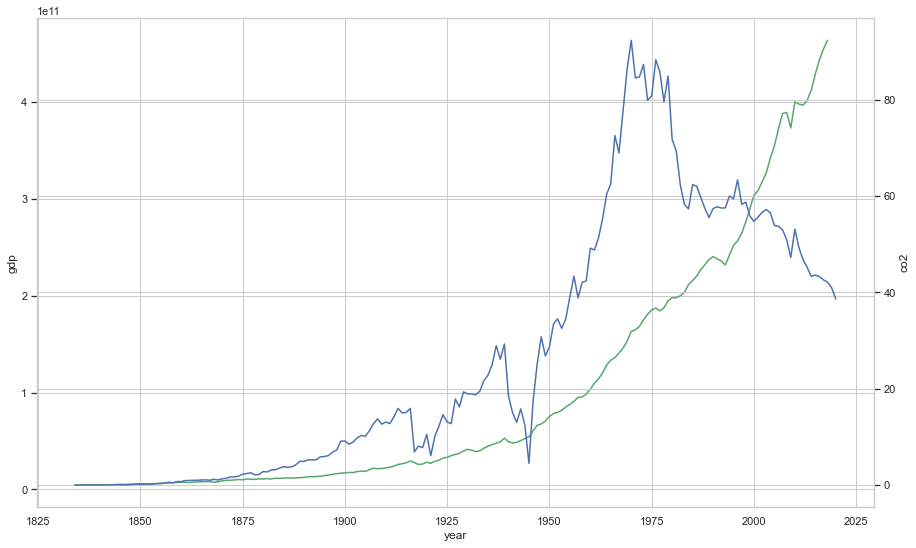

In [58]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dfSweden, x='year', y='gdp', color="g")
ax2 = plt.twinx()
sns.lineplot(data=dfSweden, x='year', y = 'co2', color="b", ax=ax2)

As seen from Sweden it is possible to both increase your GDP whilst decreasing CO<sub>2</sub> emissions.

I was curious to see this comparison with Irish data. Unfortunately CO<sub>2</sub> emissions are rising for Ireland while GDP is decreasing.

In [59]:
dfIre=eu_top_gdp_data.loc[eu_top_gdp_data.country=='Ireland']
dfIre

iso_code  country  year     co2  consumption_co2  co2_growth_prct  \
11390      IRL  Ireland  1850   0.396              NaN              NaN   
11391      IRL  Ireland  1851     NaN              NaN             0.00   
11392      IRL  Ireland  1852     NaN              NaN             0.00   
11393      IRL  Ireland  1853     NaN              NaN             0.00   
11394      IRL  Ireland  1854     NaN              NaN             0.00   
...        ...      ...   ...     ...              ...              ...   
11556      IRL  Ireland  2016  40.156           42.594             3.79   
11557      IRL  Ireland  2017  39.133           42.307            -2.55   
11558      IRL  Ireland  2018  39.195           42.031             0.16   
11559      IRL  Ireland  2019  37.275           41.235            -4.90   
11560      IRL  Ireland  2020  33.349              NaN           -10.53   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
11390             NaN        NaN           0.057                         NaN   
11391             NaN        NaN             NaN                         NaN   
11392             NaN        NaN             NaN                         NaN   
11393             NaN        NaN             NaN                         NaN   
11394             NaN        NaN             NaN                         NaN   
...               ...        ...             ...                         ...   
11556           1.468      2.438           8.551                       9.071   
11557          -1.022      3.173           8.233                       8.900   
11558           0.062      2.836           8.134                       8.723   
11559          -1.920      3.959           7.634                       8.445   
11560          -3.927        NaN           6.754                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
11390  ...             NaN      NaN                 NaN            NaN   
11391  ...             NaN      NaN                 NaN            NaN   
11392  ...             NaN      NaN                 NaN            NaN   
11393  ...             NaN      NaN                 NaN            NaN   
11394  ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
11556  ...          13.965    16.49               3.511           9.42   
11557  ...             NaN      NaN                 NaN            NaN   
11558  ...             NaN      NaN                 NaN            NaN   
11559  ...             NaN      NaN                 NaN            NaN   
11560  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
11390                       NaN   6891380.0           NaN   
11391                       NaN   6768411.0           NaN   
11392                       NaN   6651288.0           NaN   
11393                       NaN   6539839.0           NaN   
11394                       NaN   6430257.0           NaN   
...                         ...         ...           ...   
11556                     2.006   4695790.0  2.686955e+11   
11557                       NaN   4753281.0  2.905816e+11   
11558                       NaN   4818694.0  3.143217e+11   
11559                       NaN   4882498.0           NaN   
11560                       NaN   4937796.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
11390                         NaN                NaN             NaN  
11391                         NaN                NaN             NaN  
11392                         NaN                NaN             NaN  
11393                         NaN                NaN             NaN  
11394                         NaN                NaN             NaN  
...                           ...                ...             ...  
11556                    

<AxesSubplot:xlabel='year', ylabel='co2'>

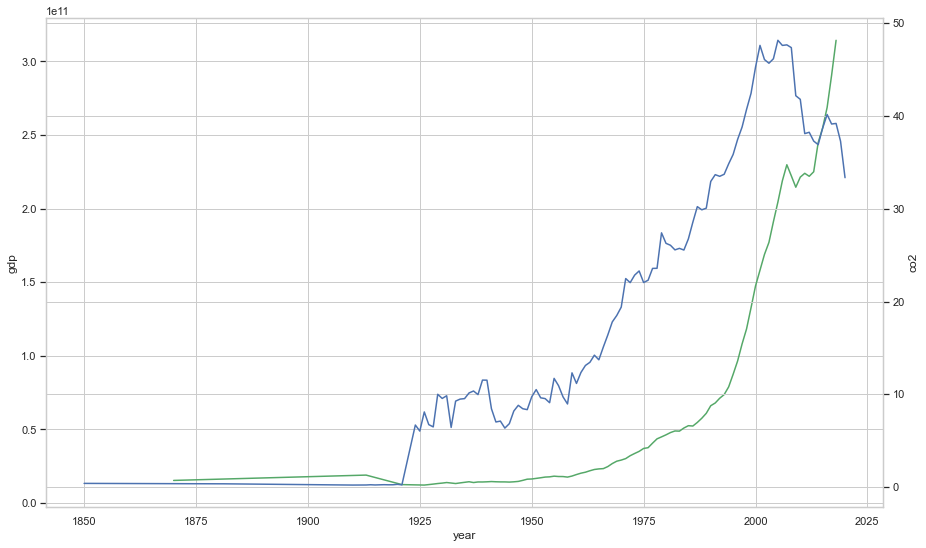

In [60]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dfIre, x='year', y='gdp', color="g")
ax2 = plt.twinx()
sns.lineplot(data=dfIre, x='year', y = 'co2', color="b", ax=ax2)

### Highest GDP Global

As the GDP in the dataset was sparse with ~50% NaN I used worldometer to get the countries with the highest GDP<sup>7</sup>. I choose to focus on the top 10 countries in terms of nominal GDP.

First I plotted absolute emissions as seen below. I then focused on per capita emissions.

In [61]:
# Absolute emissions

dftop_gdp_global = dfco2_Data.copy()
# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada"]
dftop_gdp_global = dftop_gdp_global.loc[dftop_gdp_global['country'].isin(countries)]

dftop_gdp_global

iso_code        country  year       co2  consumption_co2  \
3367       BRA         Brazil  1901     2.103              NaN   
3368       BRA         Brazil  1902     2.506              NaN   
3369       BRA         Brazil  1903     2.440              NaN   
3370       BRA         Brazil  1904     2.620              NaN   
3371       BRA         Brazil  1905     2.799              NaN   
...        ...            ...   ...       ...              ...   
24063      USA  United States  2016  5248.024         5576.720   
24064      USA  United States  2017  5207.751         5550.772   
24065      USA  United States  2018  5375.491         5726.611   
24066      USA  United States  2019  5255.816         5625.784   
24067      USA  United States  2020  4712.771              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
3367               NaN             NaN        NaN           0.114   
3368             19.16           0.403        NaN           0.133   
3369             -2.63          -0.066        NaN           0.127   
3370              7.36           0.180        NaN           0.133   
3371              6.85           0.180        NaN           0.139   
...                ...             ...        ...             ...   
24063            -2.30        -123.747    328.696          16.247   
24064            -0.77         -40.273    343.021          16.020   
24065             3.22         167.739    351.120          16.434   
24066            -2.23        -119.674    369.967          15.972   
24067           -10.33        -543.046        NaN          14.238   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
3367                          NaN  ...             NaN      NaN   
3368                          NaN  ...             NaN      NaN   
3369                          NaN  ...             NaN      NaN   
3370                          NaN  ...             NaN      NaN   
3371                          NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
24063                      17.264  ...          18.059   629.38   
24064                      17.075  ...             NaN      NaN   
24065                      17.507  ...             NaN      NaN   
24066                      17.096  ...             NaN      NaN   
24067                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
3367                  NaN            NaN                       NaN   
3368                  NaN            NaN                       NaN   
3369                  NaN            NaN                       NaN   
3370                  NaN            NaN                       NaN   
3371                  NaN            NaN                       NaN   
...                   ...            ...                       ...   
24063               1.948          251.7                     0.779   
24064                 NaN            NaN                       NaN   
24065                 NaN            NaN                       NaN   
24066                 NaN            NaN                       NaN   
24067                 NaN            NaN                       NaN   

        population           gdp  primary_energy_consumption  \
3367    18469004.0  1.728848e+10                         NaN   
3368    18874521.0  1.729822e+10                         NaN   
3369    19279718.0  1.764560e+10                         NaN   
3370    19693613.0  1.798087e+10                         NaN   
3371    20116394.0  1.850278e+10                         NaN   
...            ...           ...                         ...   
24063  323015992.0  1.716256e+13                   25560.520   
24064  325084758.0  1.759628e+13                   25647.389   
24065  327096263.0  1.814065e+13                   26556.388   
24066  329064917.0           NaN                   26291.355   
24067  331002647.0           NaN  

<AxesSubplot:xlabel='year', ylabel='co2'>

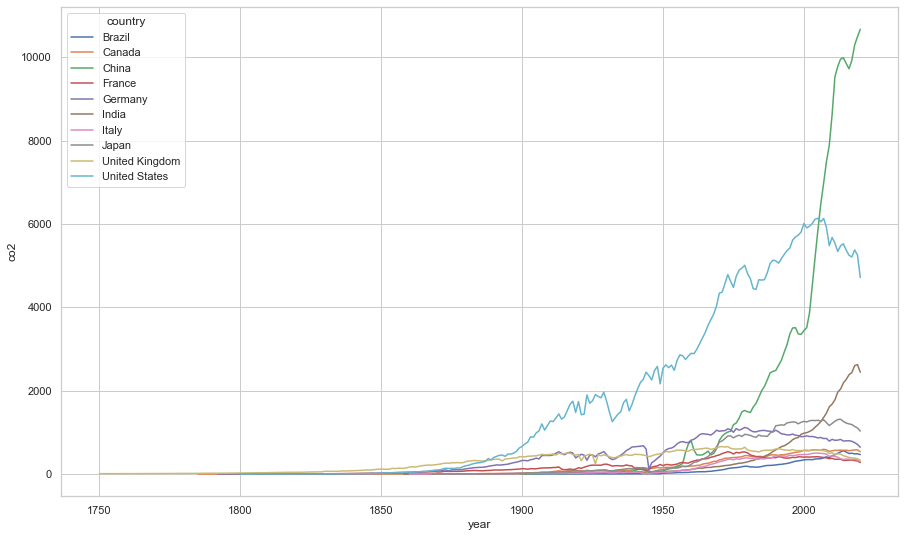

In [62]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dftop_gdp_global, x='year', y='co2', hue='country')

In terms of absolute emissions China is the largest emitter followed by the United States and India. The United States is the country with the largest nomial GDP followed by China, India is fifth in the world for nominal GDP.

In [63]:
dftop_gdp_global_percapita = dfco2_Data.copy()
# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada"]
dftop_gdp_global_percapita = dftop_gdp_global_percapita.loc[dftop_gdp_global_percapita
                                                            ['country'].isin(countries)]

dftop_gdp_global_percapita

iso_code        country  year       co2  consumption_co2  \
3367       BRA         Brazil  1901     2.103              NaN   
3368       BRA         Brazil  1902     2.506              NaN   
3369       BRA         Brazil  1903     2.440              NaN   
3370       BRA         Brazil  1904     2.620              NaN   
3371       BRA         Brazil  1905     2.799              NaN   
...        ...            ...   ...       ...              ...   
24063      USA  United States  2016  5248.024         5576.720   
24064      USA  United States  2017  5207.751         5550.772   
24065      USA  United States  2018  5375.491         5726.611   
24066      USA  United States  2019  5255.816         5625.784   
24067      USA  United States  2020  4712.771              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
3367               NaN             NaN        NaN           0.114   
3368             19.16           0.403        NaN           0.133   
3369             -2.63          -0.066        NaN           0.127   
3370              7.36           0.180        NaN           0.133   
3371              6.85           0.180        NaN           0.139   
...                ...             ...        ...             ...   
24063            -2.30        -123.747    328.696          16.247   
24064            -0.77         -40.273    343.021          16.020   
24065             3.22         167.739    351.120          16.434   
24066            -2.23        -119.674    369.967          15.972   
24067           -10.33        -543.046        NaN          14.238   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
3367                          NaN  ...             NaN      NaN   
3368                          NaN  ...             NaN      NaN   
3369                          NaN  ...             NaN      NaN   
3370                          NaN  ...             NaN      NaN   
3371                          NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
24063                      17.264  ...          18.059   629.38   
24064                      17.075  ...             NaN      NaN   
24065                      17.507  ...             NaN      NaN   
24066                      17.096  ...             NaN      NaN   
24067                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
3367                  NaN            NaN                       NaN   
3368                  NaN            NaN                       NaN   
3369                  NaN            NaN                       NaN   
3370                  NaN            NaN                       NaN   
3371                  NaN            NaN                       NaN   
...                   ...            ...                       ...   
24063               1.948          251.7                     0.779   
24064                 NaN            NaN                       NaN   
24065                 NaN            NaN                       NaN   
24066                 NaN            NaN                       NaN   
24067                 NaN            NaN                       NaN   

        population           gdp  primary_energy_consumption  \
3367    18469004.0  1.728848e+10                         NaN   
3368    18874521.0  1.729822e+10                         NaN   
3369    19279718.0  1.764560e+10                         NaN   
3370    19693613.0  1.798087e+10                         NaN   
3371    20116394.0  1.850278e+10                         NaN   
...            ...           ...                         ...   
24063  323015992.0  1.716256e+13                   25560.520   
24064  325084758.0  1.759628e+13                   25647.389   
24065  327096263.0  1.814065e+13                   26556.388   
24066  329064917.0           NaN                   26291.355   
24067  331002647.0           NaN  

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

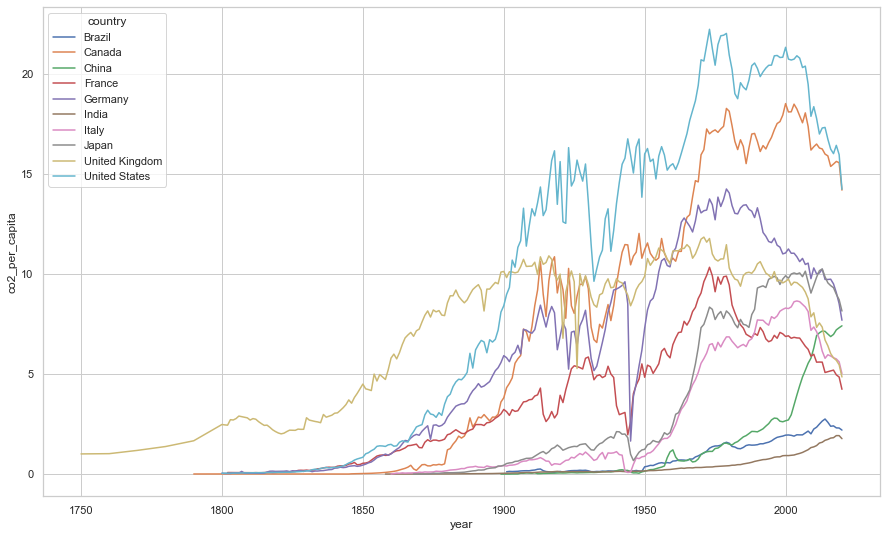

In [64]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dftop_gdp_global, x='year', y='co2_per_capita', hue='country')

In terms of per capita emissions the United States is the largest emitter followed by Canada and then Germany. Germany is fourth in terms of nominal GDP with Canada coming 10th. India is the lowest per capita emitter depsite being in the top three for absolute emissions.

### Lowest GDP Global

As the GDP in the dataset was sparse with ~50% NaN I used worldometer to get the countries with the lowest GDP<sup>7</sup>. I choose to focus on the lowest 10 countries in terms of nominal GDP.

First I plotted absolute emissions as seen below. I then focused on per capita emissions.

In [65]:
dflow_gdp_global = dfco2_Data.copy()
# Countries entered in order of GDP
countries =["Comoros","Vanuatu", "Samoa","Dominica",
            "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dflow_gdp_global = dflow_gdp_global.loc[dflow_gdp_global['country'].isin(countries)]

dflow_gdp_global

iso_code  country  year    co2  consumption_co2  co2_growth_prct  \
4875       COM  Comoros  1959  0.011              NaN              NaN   
4876       COM  Comoros  1960  0.011              NaN             0.00   
4877       COM  Comoros  1961  0.011              NaN             0.00   
4878       COM  Comoros  1962  0.011              NaN             0.00   
4879       COM  Comoros  1963  0.011              NaN             0.00   
...        ...      ...   ...    ...              ...              ...   
24402      VUT  Vanuatu  2016  0.147              NaN            11.11   
24403      VUT  Vanuatu  2017  0.139              NaN            -5.00   
24404      VUT  Vanuatu  2018  0.176              NaN            26.32   
24405      VUT  Vanuatu  2019  0.181              NaN             3.08   
24406      VUT  Vanuatu  2020  0.182              NaN             0.14   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
4875              NaN        NaN           0.058                         NaN   
4876            0.000        NaN           0.058                         NaN   
4877            0.000        NaN           0.057                         NaN   
4878            0.000        NaN           0.056                         NaN   
4879            0.000        NaN           0.055                         NaN   
...               ...        ...             ...                         ...   
24402           0.015        NaN           0.527                         NaN   
24403          -0.007        NaN           0.488                         NaN   
24404           0.037        NaN           0.601                         NaN   
24405           0.005        NaN           0.604                         NaN   
24406           0.000        NaN           0.591                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
4875   ...             NaN      NaN                 NaN            NaN   
4876   ...             NaN      NaN                 NaN            NaN   
4877   ...             NaN      NaN                 NaN            NaN   
4878   ...             NaN      NaN                 NaN            NaN   
4879   ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
24402  ...           2.986     0.49               1.763           0.18   
24403  ...             NaN      NaN                 NaN            NaN   
24404  ...             NaN      NaN                 NaN            NaN   
24405  ...             NaN      NaN                 NaN            NaN   
24406  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population          gdp  \
4875                        NaN    188088.0  114381000.0   
4876                        NaN    191122.0  124257000.0   
4877                        NaN    194149.0  125477000.0   
4878                        NaN    197202.0  137088000.0   
4879                        NaN    200371.0  165816000.0   
...                         ...         ...          ...   
24402                     0.647    278326.0          NaN   
24403                       NaN    285499.0          NaN   
24404                       NaN    292675.0          NaN   
24405                       NaN    299882.0          NaN   
24406                       NaN    307150.0          NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
4875                          NaN                NaN             NaN  
4876                          NaN                NaN             NaN  
4877                          NaN                NaN             NaN  
4878                          NaN                NaN             NaN  
4879                          NaN                NaN             NaN  
...                           ...                ...             ...  
24402                       0.699           2515.

<AxesSubplot:xlabel='year', ylabel='co2'>

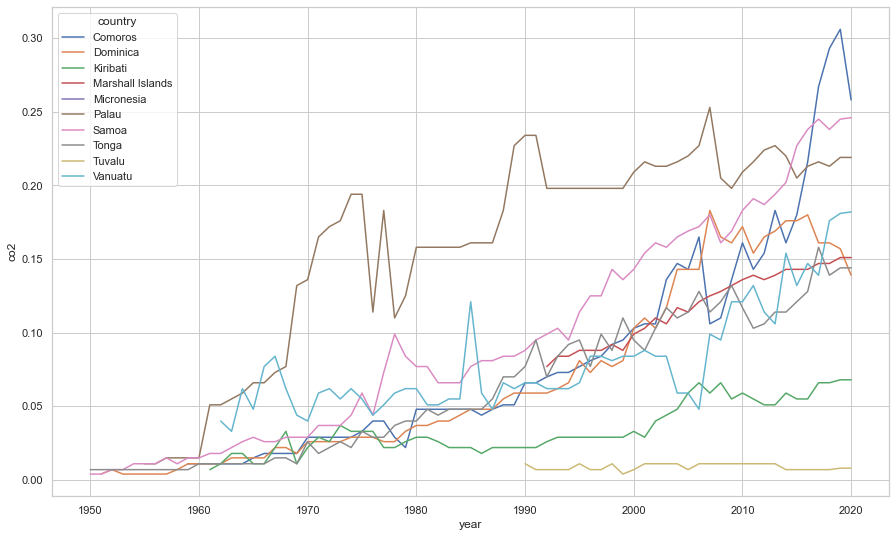

In [66]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dflow_gdp_global, x='year', y='co2', hue='country')

In [67]:
dflow_gdp_global_percapita = dfco2_Data.copy()
# Countries entered in order of GDP
countries =["Comoros","Vanuatu", "Samoa","Dominica",
            "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dflow_gdp_global_percapita = dflow_gdp_global_percapita.loc[dflow_gdp_global_percapita
                                                            ['country'].isin(countries)]

dflow_gdp_global_percapita

iso_code  country  year    co2  consumption_co2  co2_growth_prct  \
4875       COM  Comoros  1959  0.011              NaN              NaN   
4876       COM  Comoros  1960  0.011              NaN             0.00   
4877       COM  Comoros  1961  0.011              NaN             0.00   
4878       COM  Comoros  1962  0.011              NaN             0.00   
4879       COM  Comoros  1963  0.011              NaN             0.00   
...        ...      ...   ...    ...              ...              ...   
24402      VUT  Vanuatu  2016  0.147              NaN            11.11   
24403      VUT  Vanuatu  2017  0.139              NaN            -5.00   
24404      VUT  Vanuatu  2018  0.176              NaN            26.32   
24405      VUT  Vanuatu  2019  0.181              NaN             3.08   
24406      VUT  Vanuatu  2020  0.182              NaN             0.14   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
4875              NaN        NaN           0.058                         NaN   
4876            0.000        NaN           0.058                         NaN   
4877            0.000        NaN           0.057                         NaN   
4878            0.000        NaN           0.056                         NaN   
4879            0.000        NaN           0.055                         NaN   
...               ...        ...             ...                         ...   
24402           0.015        NaN           0.527                         NaN   
24403          -0.007        NaN           0.488                         NaN   
24404           0.037        NaN           0.601                         NaN   
24405           0.005        NaN           0.604                         NaN   
24406           0.000        NaN           0.591                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
4875   ...             NaN      NaN                 NaN            NaN   
4876   ...             NaN      NaN                 NaN            NaN   
4877   ...             NaN      NaN                 NaN            NaN   
4878   ...             NaN      NaN                 NaN            NaN   
4879   ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
24402  ...           2.986     0.49               1.763           0.18   
24403  ...             NaN      NaN                 NaN            NaN   
24404  ...             NaN      NaN                 NaN            NaN   
24405  ...             NaN      NaN                 NaN            NaN   
24406  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population          gdp  \
4875                        NaN    188088.0  114381000.0   
4876                        NaN    191122.0  124257000.0   
4877                        NaN    194149.0  125477000.0   
4878                        NaN    197202.0  137088000.0   
4879                        NaN    200371.0  165816000.0   
...                         ...         ...          ...   
24402                     0.647    278326.0          NaN   
24403                       NaN    285499.0          NaN   
24404                       NaN    292675.0          NaN   
24405                       NaN    299882.0          NaN   
24406                       NaN    307150.0          NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
4875                          NaN                NaN             NaN  
4876                          NaN                NaN             NaN  
4877                          NaN                NaN             NaN  
4878                          NaN                NaN             NaN  
4879                          NaN                NaN             NaN  
...                           ...                ...             ...  
24402                       0.699           2515.

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

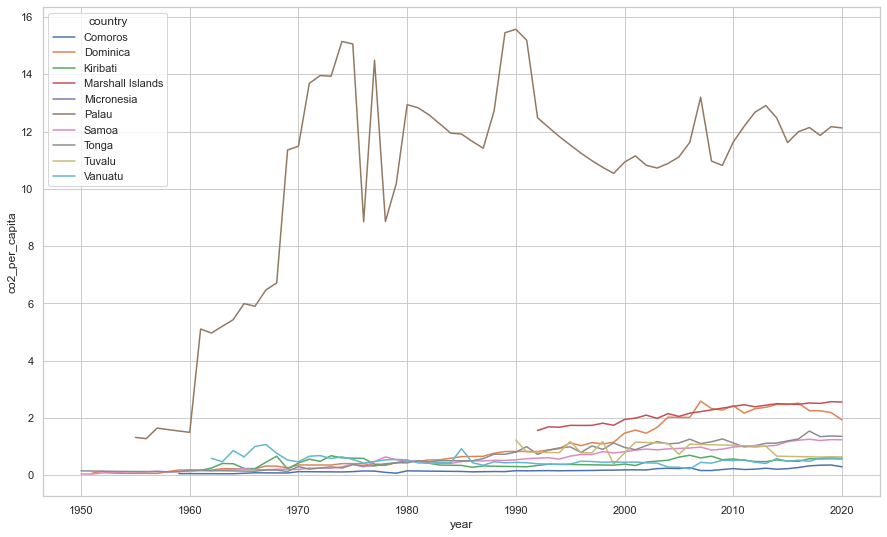

In [68]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dflow_gdp_global_percapita, x='year', y='co2_per_capita', hue='country')

The comaprison between the lowest and highest emitters is stark, particularly when it comes to absolute emissions. In order to present this data in a more visually appealing way I will next look into creating Bar Charts.

## Bar Charts for GDP and CO<sub>2</sub> Emissions

For these Bar Charts I will focus on certain years and not the changes in emissions over time. I will look at 3 different years, first 2020 as it is the most recent year, then 2007 as it is the year before the economic collapse and finally 2009 as it was the year after the economic collapse.


In [69]:
dfgdp_low_top = dfco2_Data.copy()

# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada", "Comoros", "Vanuatu", "Samoa",
            "Dominica", "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dfgdp_low_top = dfgdp_low_top.loc[dfgdp_low_top['country'].isin(countries)]

dfgdp_low_top

iso_code  country  year    co2  consumption_co2  co2_growth_prct  \
3367       BRA   Brazil  1901  2.103              NaN              NaN   
3368       BRA   Brazil  1902  2.506              NaN            19.16   
3369       BRA   Brazil  1903  2.440              NaN            -2.63   
3370       BRA   Brazil  1904  2.620              NaN             7.36   
3371       BRA   Brazil  1905  2.799              NaN             6.85   
...        ...      ...   ...    ...              ...              ...   
24402      VUT  Vanuatu  2016  0.147              NaN            11.11   
24403      VUT  Vanuatu  2017  0.139              NaN            -5.00   
24404      VUT  Vanuatu  2018  0.176              NaN            26.32   
24405      VUT  Vanuatu  2019  0.181              NaN             3.08   
24406      VUT  Vanuatu  2020  0.182              NaN             0.14   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
3367              NaN        NaN           0.114                         NaN   
3368            0.403        NaN           0.133                         NaN   
3369           -0.066        NaN           0.127                         NaN   
3370            0.180        NaN           0.133                         NaN   
3371            0.180        NaN           0.139                         NaN   
...               ...        ...             ...                         ...   
24402           0.015        NaN           0.527                         NaN   
24403          -0.007        NaN           0.488                         NaN   
24404           0.037        NaN           0.601                         NaN   
24405           0.005        NaN           0.604                         NaN   
24406           0.000        NaN           0.591                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
3367   ...             NaN      NaN                 NaN            NaN   
3368   ...             NaN      NaN                 NaN            NaN   
3369   ...             NaN      NaN                 NaN            NaN   
3370   ...             NaN      NaN                 NaN            NaN   
3371   ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
24402  ...           2.986     0.49               1.763           0.18   
24403  ...             NaN      NaN                 NaN            NaN   
24404  ...             NaN      NaN                 NaN            NaN   
24405  ...             NaN      NaN                 NaN            NaN   
24406  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
3367                        NaN  18469004.0  1.728848e+10   
3368                        NaN  18874521.0  1.729822e+10   
3369                        NaN  19279718.0  1.764560e+10   
3370                        NaN  19693613.0  1.798087e+10   
3371                        NaN  20116394.0  1.850278e+10   
...                         ...         ...           ...   
24402                     0.647    278326.0           NaN   
24403                       NaN    285499.0           NaN   
24404                       NaN    292675.0           NaN   
24405                       NaN    299882.0           NaN   
24406                       NaN    307150.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
3367                          NaN                NaN             NaN  
3368                          NaN                NaN             NaN  
3369                          NaN                NaN             NaN  
3370                          NaN                NaN             NaN  
3371                          NaN                NaN             NaN  
...                           ...                ...             ...  
24402                       0.699    

In [70]:
dfgdp_low_top[['country', 'year', 'co2']]

country  year    co2
3367    Brazil  1901  2.103
3368    Brazil  1902  2.506
3369    Brazil  1903  2.440
3370    Brazil  1904  2.620
3371    Brazil  1905  2.799
...        ...   ...    ...
24402  Vanuatu  2016  0.147
24403  Vanuatu  2017  0.139
24404  Vanuatu  2018  0.176
24405  Vanuatu  2019  0.181
24406  Vanuatu  2020  0.182

[2443 rows x 3 columns]

### 2020

In [71]:
dfgdp_low_top20= dfgdp_low_top[dfgdp_low_top.year==2020]
dfgdp_low_top20[['country', 'year', 'co2']]

country  year        co2
3486             Brazil  2020    467.384
4280             Canada  2020    535.823
4723              China  2020  10667.887
4936            Comoros  2020      0.258
6147           Dominica  2020      0.139
8757             France  2020    276.634
9590            Germany  2020    644.310
10977             India  2020   2441.792
11812             Italy  2020    303.815
12036             Japan  2020   1030.775
12429          Kiribati  2020      0.068
14198  Marshall Islands  2020      0.151
17477             Palau  2020      0.219
19532             Samoa  2020      0.246
22625             Tonga  2020      0.144
23251            Tuvalu  2020      0.008
23846    United Kingdom  2020    329.579
24067     United States  2020   4712.771
24406           Vanuatu  2020      0.182

Text(0, 0.5, 'CO2 (million tonnes)')

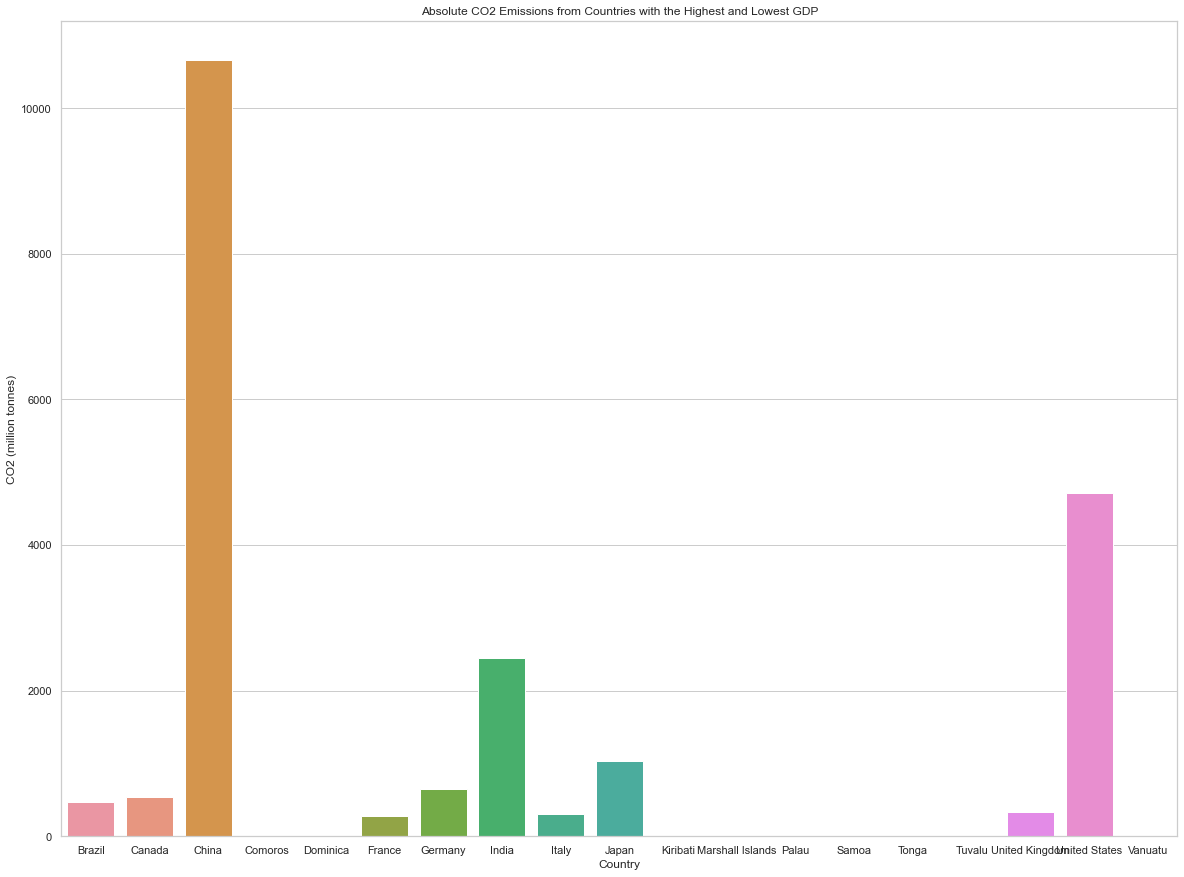

In [126]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_low_top20)
plt.title("Absolute CO2 Emissions from Countries with the Highest and Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

#### 2020 Highest GDP Emissions

In [121]:
dfgdp_top10_20 = dfgdp_low_top20
# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada"]
dfgdp_top10_20 = dfgdp_top10_20.loc[dfgdp_top10_20['country'].isin(countries)]

dfgdp_top10_20

iso_code         country  year        co2  consumption_co2  \
3486       BRA          Brazil  2020    467.384              NaN   
4280       CAN          Canada  2020    535.823              NaN   
4723       CHN           China  2020  10667.887              NaN   
8757       FRA          France  2020    276.634              NaN   
9590       DEU         Germany  2020    644.310              NaN   
10977      IND           India  2020   2441.792              NaN   
11812      ITA           Italy  2020    303.815              NaN   
12036      JPN           Japan  2020   1030.775              NaN   
23846      GBR  United Kingdom  2020    329.579              NaN   
24067      USA   United States  2020   4712.771              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
3486             -3.79         -18.410        NaN           2.199   
4280             -8.00         -46.567        NaN          14.197   
4723              1.70         177.899        NaN           7.412   
8757            -12.44         -39.297        NaN           4.238   
9590             -9.43         -67.117        NaN           7.690   
10977            -7.01        -184.176        NaN           1.769   
11812           -10.58         -35.957        NaN           5.025   
12036            -6.80         -75.154        NaN           8.150   
23846           -10.69         -39.431        NaN           4.855   
24067           -10.33        -543.046        NaN          14.238   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
3486                          NaN  ...             NaN      NaN   
4280                          NaN  ...             NaN      NaN   
4723                          NaN  ...             NaN      NaN   
8757                          NaN  ...             NaN      NaN   
9590                          NaN  ...             NaN      NaN   
10977                         NaN  ...             NaN      NaN   
11812                         NaN  ...             NaN      NaN   
12036                         NaN  ...             NaN      NaN   
23846                         NaN  ...             NaN      NaN   
24067                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
3486                  NaN            NaN                       NaN   
4280                  NaN            NaN                       NaN   
4723                  NaN            NaN                       NaN   
8757                  NaN            NaN                       NaN   
9590                  NaN            NaN                       NaN   
10977                 NaN            NaN                       NaN   
11812                 NaN            NaN                       NaN   
12036                 NaN            NaN                       NaN   
23846                 NaN            NaN                       NaN   
24067                 NaN            NaN                       NaN   

         population  gdp  primary_energy_consumption  energy_per_capita  \
3486   2.125594e+08  NaN                         NaN                NaN   
4280   3.774216e+07  NaN                         NaN                NaN   
4723   1.439324e+09  NaN                         NaN                NaN   
8757   6.527351e+07  NaN                         NaN                NaN   
9590   8.378394e+07  NaN                         NaN                NaN   
10977  1.380004e+09  NaN                         NaN                NaN   
11812  6.046183e+07  NaN                         NaN                NaN   
12036  1.264765e+08  NaN                         NaN                NaN   
23846  6.788600e+07  NaN                         NaN                NaN   
24067  3.310026e+08  NaN                         NaN                NaN   

       energy_per_gdp  
3486              NaN  
4280              NaN  
4723              NaN  
8757              NaN  
9590              NaN  
10977             

Text(0, 0.5, 'CO2 (million tonnes)')

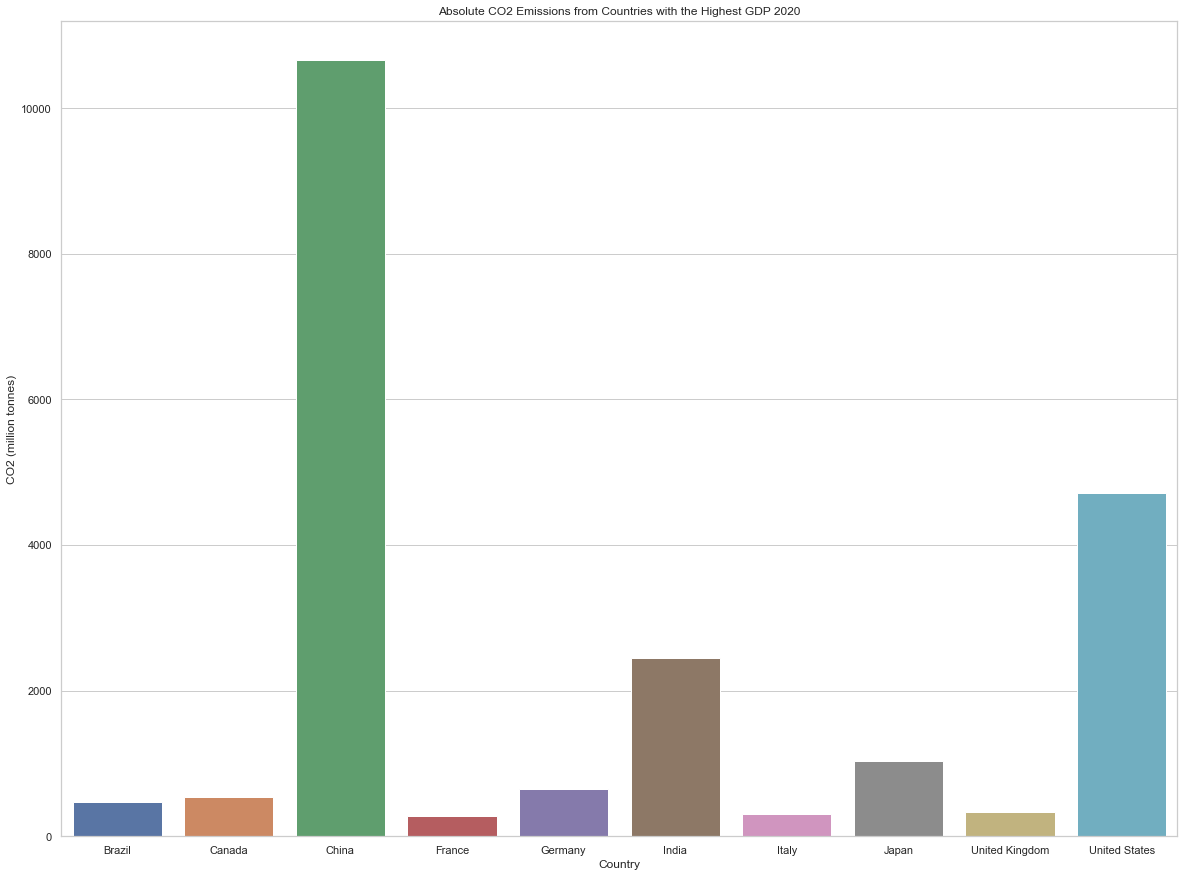

In [127]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_top10_20)
plt.title("Absolute CO2 Emissions from Countries with the Highest GDP 2020")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

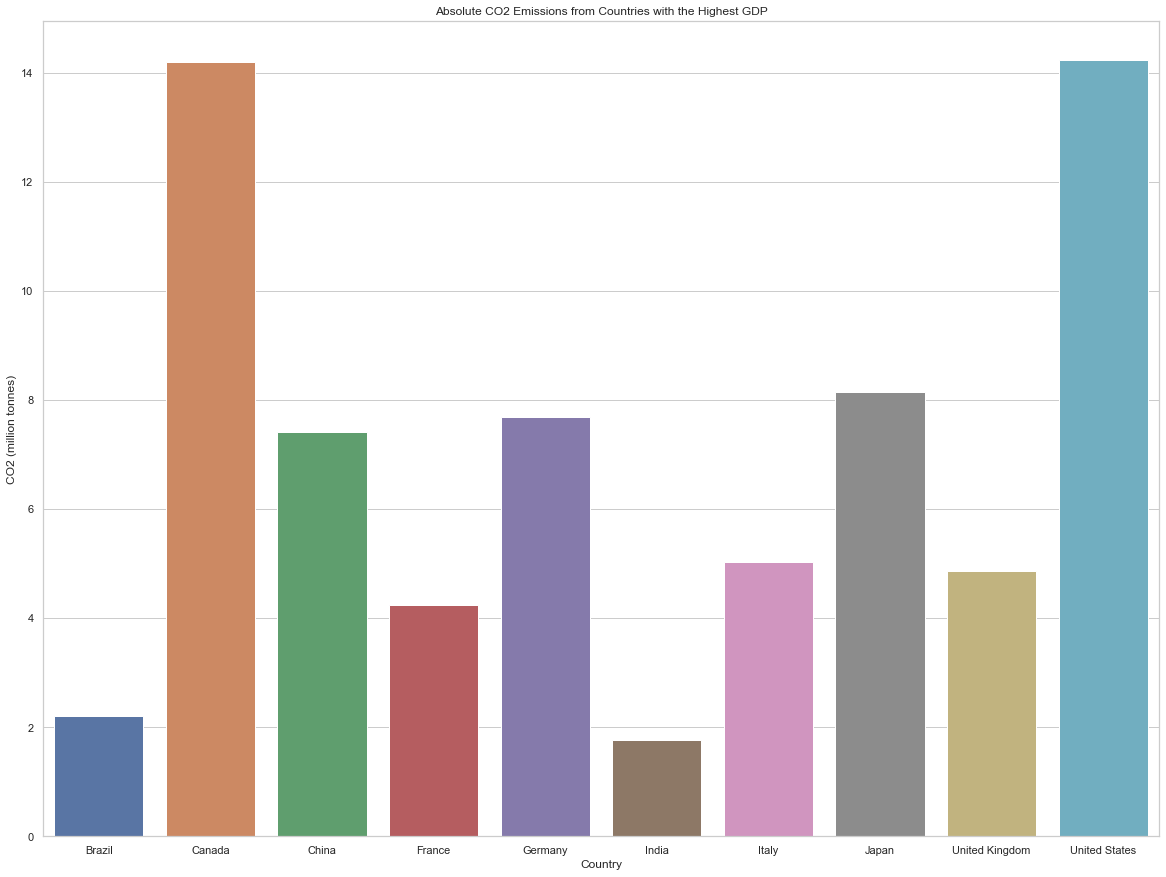

In [128]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_top10_20)
plt.title("Absolute CO2 Emissions from Countries with the Highest GDP")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

#### 2020 Lowest GDP

In [122]:
# Absolute emissions

dfgdp_low10_20 = dfgdp_low_top20
# Countries entered in order of GDP
countries =["Comoros","Vanuatu", "Samoa","Dominica",
            "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dfgdp_low10_20 = dfgdp_low10_20.loc[dfgdp_low10_20['country'].isin(countries)]

dfgdp_low10_20

iso_code           country  year    co2  consumption_co2  \
4936       COM           Comoros  2020  0.258              NaN   
6147       DMA          Dominica  2020  0.139              NaN   
12429      KIR          Kiribati  2020  0.068              NaN   
14198      MHL  Marshall Islands  2020  0.151              NaN   
17477      PLW             Palau  2020  0.219              NaN   
19532      WSM             Samoa  2020  0.246              NaN   
22625      TON             Tonga  2020  0.144              NaN   
23251      TUV            Tuvalu  2020  0.008              NaN   
24406      VUT           Vanuatu  2020  0.182              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
4936            -15.49          -0.047        NaN           0.297   
6147            -11.51          -0.018        NaN           1.934   
12429             0.14           0.000        NaN           0.570   
14198             0.14           0.000        NaN           2.556   
17477             0.14           0.000        NaN          12.125   
19532             0.14           0.000        NaN           1.239   
22625             0.14           0.000        NaN           1.360   
23251             0.15           0.000        NaN           0.642   
24406             0.14           0.000        NaN           0.591   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
4936                          NaN  ...             NaN      NaN   
6147                          NaN  ...             NaN      NaN   
12429                         NaN  ...             NaN      NaN   
14198                         NaN  ...             NaN      NaN   
17477                         NaN  ...             NaN      NaN   
19532                         NaN  ...             NaN      NaN   
22625                         NaN  ...             NaN      NaN   
23251                         NaN  ...             NaN      NaN   
24406                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
4936                  NaN            NaN                       NaN   
6147                  NaN            NaN                       NaN   
12429                 NaN            NaN                       NaN   
14198                 NaN            NaN                       NaN   
17477                 NaN            NaN                       NaN   
19532                 NaN            NaN                       NaN   
22625                 NaN            NaN                       NaN   
23251                 NaN            NaN                       NaN   
24406                 NaN            NaN                       NaN   

       population  gdp  primary_energy_consumption  energy_per_capita  \
4936     869595.0  NaN                         NaN                NaN   
6147      71991.0  NaN                         NaN                NaN   
12429    119446.0  NaN                         NaN                NaN   
14198     59194.0  NaN                         NaN                NaN   
17477     18092.0  NaN                         NaN                NaN   
19532    198410.0  NaN                         NaN                NaN   
22625    105697.0  NaN                         NaN                NaN   
23251     11792.0  NaN                         NaN                NaN   
24406    307150.0  NaN                         NaN                NaN   

       energy_per_gdp  
4936              NaN  
6147              NaN  
12429             NaN  
14198             NaN  
17477             NaN  
19532             NaN  
22625             NaN  
23251             NaN  
24406             NaN  

[9 rows x 58 columns]

Text(0, 0.5, 'CO2 (million tonnes)')

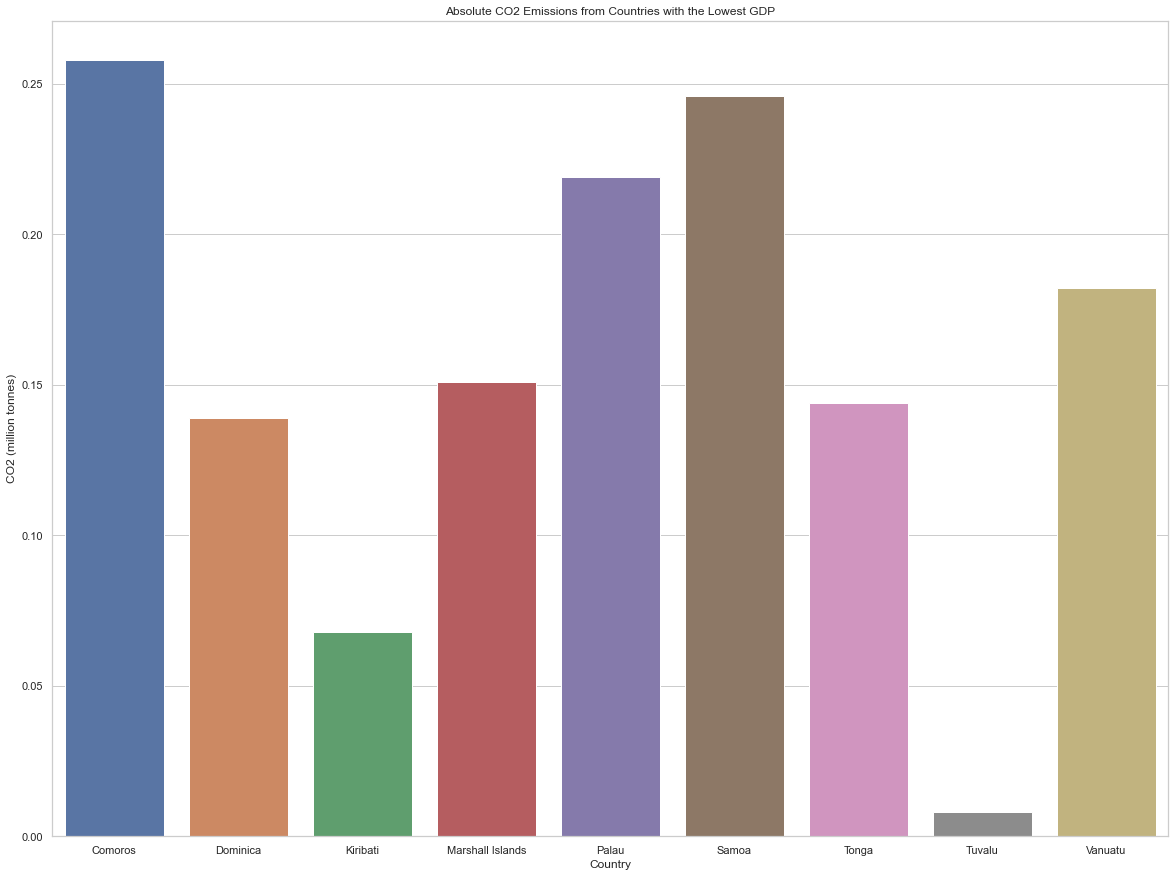

In [129]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_low10_20)
plt.title("Absolute CO2 Emissions from Countries with the Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

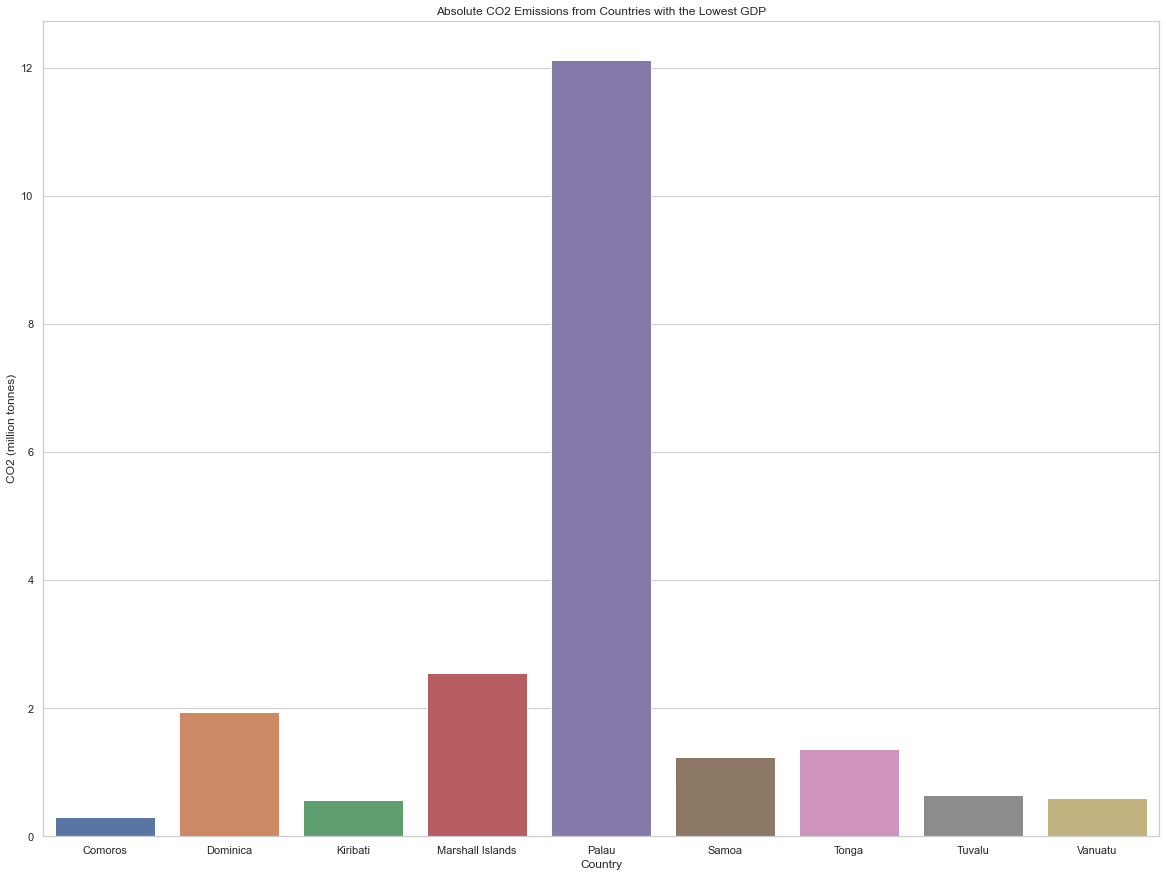

In [130]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_low10_20)
plt.title("Absolute CO2 Emissions from Countries with the Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

### 2007

In [107]:
dfgdp_low_top07= dfgdp_low_top[dfgdp_low_top.year==2007]
dfgdp_low_top07[['country', 'year', 'co2']]

country  year       co2
3473             Brazil  2007   390.573
4267             Canada  2007   594.665
4710              China  2007  6978.612
4923            Comoros  2007     0.106
6134           Dominica  2007     0.183
8744             France  2007   395.428
9577            Germany  2007   851.624
10964             India  2007  1358.152
11799             Italy  2007   490.603
12023             Japan  2007  1303.134
12416          Kiribati  2007     0.059
14185  Marshall Islands  2007     0.125
14581        Micronesia  2007       NaN
17464             Palau  2007     0.253
19519             Samoa  2007     0.180
22612             Tonga  2007     0.114
23238            Tuvalu  2007     0.011
23833    United Kingdom  2007   559.236
24054     United States  2007  6131.004
24393           Vanuatu  2007     0.099

Text(0, 0.5, 'CO2 (million tonnes)')

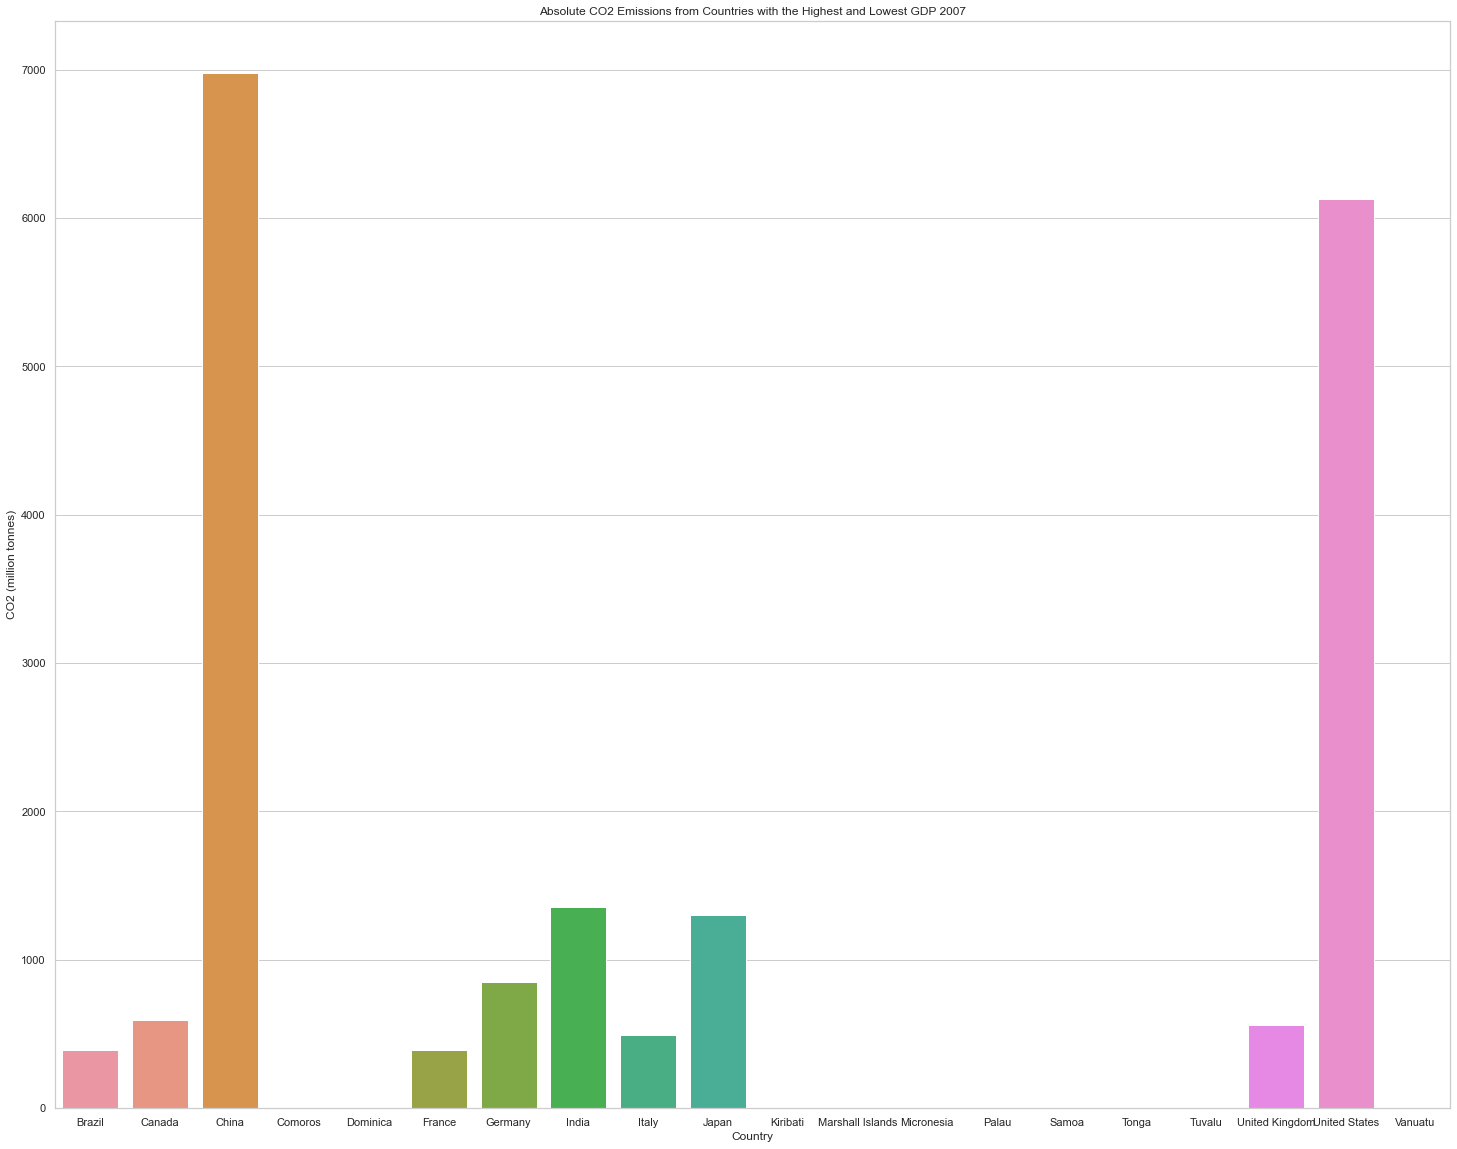

In [131]:
sns.set(style="whitegrid", rc={'figure.figsize':(25,20)})
sns.barplot(x = "country", y = "co2", data = dfgdp_low_top07)
plt.title("Absolute CO2 Emissions from Countries with the Highest and Lowest GDP 2007")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

#### 2007 Highest GDP Emissions

In [133]:
dfgdp_low_top07

dfgdp_top10_07 = dfgdp_low_top07
# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada"]
dfgdp_top10_07 = dfgdp_top10_07.loc[dfgdp_top10_07['country'].isin(countries)]

dfgdp_top10_07

iso_code         country  year       co2  consumption_co2  \
3473       BRA          Brazil  2007   390.573          397.853   
4267       CAN          Canada  2007   594.665          599.677   
4710       CHN           China  2007  6978.612         5481.465   
8744       FRA          France  2007   395.428          549.745   
9577       DEU         Germany  2007   851.624         1021.717   
10964      IND           India  2007  1358.152         1277.397   
11799      ITA           Italy  2007   490.603          625.318   
12023      JPN           Japan  2007  1303.134         1517.103   
23833      GBR  United Kingdom  2007   559.236          749.354   
24054      USA   United States  2007  6131.004         6618.792   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
3473              5.88          21.702      7.280           2.054   
4267              4.07          23.256      5.012          18.058   
4710              7.55         489.808  -1497.147           5.185   
8744             -2.55         -10.334    154.317           6.391   
9577             -3.04         -26.696    170.092          10.478   
10964             7.81          98.408    -80.755           1.148   
11799            -1.27          -6.289    134.716           8.351   
12023             2.82          35.772    213.969          10.142   
23833            -1.47          -8.336    190.118           9.100   
24054             1.31          79.336    487.787          20.395   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
3473                        2.092  ...           7.711   420.53   
4267                       18.210  ...          27.157   111.91   
4710                        4.072  ...           6.020   923.61   
8744                        8.886  ...           6.920    67.91   
9577                       12.571  ...          10.929    64.32   
10964                       1.080  ...           1.757   648.74   
11799                      10.644  ...           8.319    49.28   
12023                      11.807  ...           8.906    26.42   
23833                      12.194  ...          10.506    80.69   
24054                      22.018  ...          21.959   708.39   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
3473                2.212         170.17                     0.895   
4267                3.398          45.64                     1.386   
4710                0.686         449.38                     0.334   
8744                1.098          44.04                     0.712   
9577                0.791          45.81                     0.564   
10964               0.548         222.64                     0.188   
11799               0.839          22.60                     0.385   
12023               0.206          20.95                     0.163   
23833               1.313          31.40                     0.511   
24054               2.357         273.08                     0.908   

         population           gdp  primary_energy_consumption  \
3473   1.901304e+08  2.405104e+12                    2676.282   
4267   3.293080e+07  1.381196e+12                    3754.236   
4710   1.345994e+09  1.035821e+13                   25024.414   
8744   6.186923e+07  2.353924e+12                    3034.583   
9577   8.127784e+07  3.268103e+12                    3858.342   
10964  1.183209e+09  4.355554e+12                    5258.090   
11799  5.874786e+07  2.122823e+12                    2133.441   
12023  1.284940e+08  4.589238e+12                    6126.677   
23833  6.145515e+07  2.267380e+12                    2596.369   
24054  3.006084e+08  1.536446e+13                   26943.482   

       energy_per_capita  energy_per_gdp  
3473           14076.064           1.359  
4267          114003.105           2.682  
4710           18591.773           2.548  
8744           49048.521           1.325  
9577           47470.932           1.145  
10964           4443.923 

Text(0, 0.5, 'CO2 (million tonnes)')

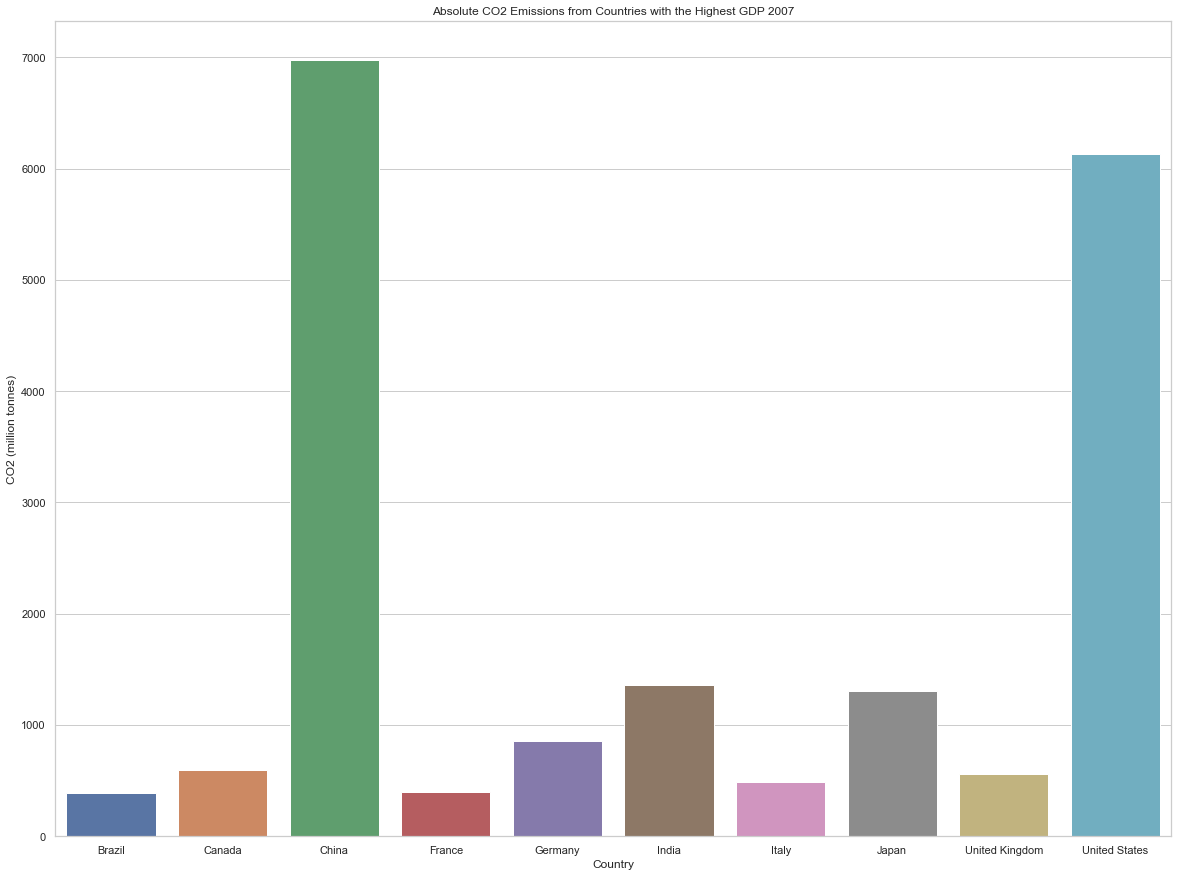

In [134]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_top10_07)
plt.title("Absolute CO2 Emissions from Countries with the Highest GDP 2007")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

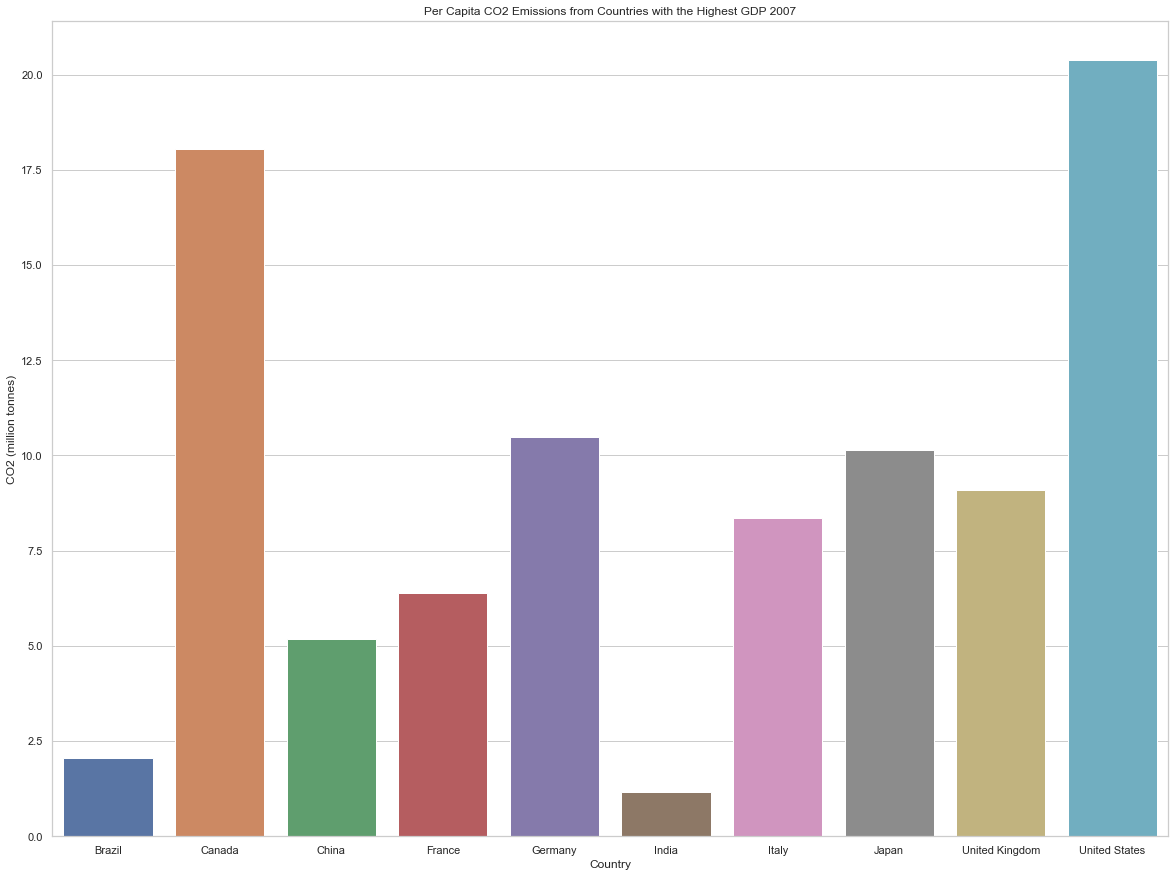

In [146]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_top10_07)
plt.title("Per Capita CO2 Emissions from Countries with the Highest GDP 2007")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

#### Lowest Emitters 2007

In [137]:

dfgdp_low10_07 = dfgdp_low_top07
# Countries entered in order of GDP
countries =["Comoros","Vanuatu", "Samoa","Dominica",
            "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dfgdp_low10_07 = dfgdp_low10_07.loc[dfgdp_low10_07['country'].isin(countries)]

dfgdp_low10_07

iso_code           country  year    co2  consumption_co2  \
4923       COM           Comoros  2007  0.106              NaN   
6134       DMA          Dominica  2007  0.183              NaN   
12416      KIR          Kiribati  2007  0.059              NaN   
14185      MHL  Marshall Islands  2007  0.125              NaN   
14581      NaN        Micronesia  2007    NaN              NaN   
17464      PLW             Palau  2007  0.253              NaN   
19519      WSM             Samoa  2007  0.180              NaN   
22612      TON             Tonga  2007  0.114              NaN   
23238      TUV            Tuvalu  2007  0.011              NaN   
24393      VUT           Vanuatu  2007  0.099              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
4923            -35.56          -0.059        NaN           0.166   
6134             28.21           0.040        NaN           2.588   
12416           -11.11          -0.007        NaN           0.607   
14185             3.03           0.004        NaN           2.223   
14581              NaN             NaN        NaN             NaN   
17464            11.29           0.026        NaN          13.196   
19519             4.26           0.007        NaN           0.986   
22612           -11.43          -0.015        NaN           1.107   
23238             0.00           0.000        NaN           1.076   
24393           107.69           0.051        NaN           0.451   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
4923                          NaN  ...           0.654     0.19   
6134                          NaN  ...          10.563     0.04   
12416                         NaN  ...           0.722     0.02   
14185                         NaN  ...           2.321     0.03   
14581                         NaN  ...             NaN     0.05   
17464                         NaN  ...          14.737     0.02   
19519                         NaN  ...          -0.330     0.26   
22612                         NaN  ...          -2.427     0.09   
23238                         NaN  ...           2.000     0.01   
24393                         NaN  ...           3.151     0.46   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
4923                0.296           0.05                     0.078   
6134                0.563           0.02                     0.282   
12416               0.206           0.00                     0.000   
14185               0.536           0.00                     0.000   
14581                 NaN           0.02                       NaN   
17464               1.053           0.00                     0.000   
19519               1.429           0.04                     0.220   
22612               0.874           0.05                     0.485   
23238               1.000           0.00                     0.000   
24393               2.100           0.16                     0.731   

       population          gdp  primary_energy_consumption  energy_per_capita  \
4923     641624.0  908328188.7                       0.477            743.662   
6134      70797.0  554311699.2                       0.815          11473.530   
12416     96531.0          NaN                       0.270           2780.693   
14185     56046.0          NaN                         NaN                NaN   
14581         NaN          NaN                         NaN                NaN   
17464     19159.0          NaN                         NaN                NaN   
19519    182045.0          NaN                       1.024           5624.150   
22612    102577.0          NaN                       0.501           4865.805   
23238     10219.0          NaN                         NaN                NaN   
24393    219464.0          NaN                       0.577           2634.794   

       energy_per_gdp  
4923            0.497  
6134            1.367  
12416             NaN  
14185             NaN 

Text(0, 0.5, 'CO2 (million tonnes)')

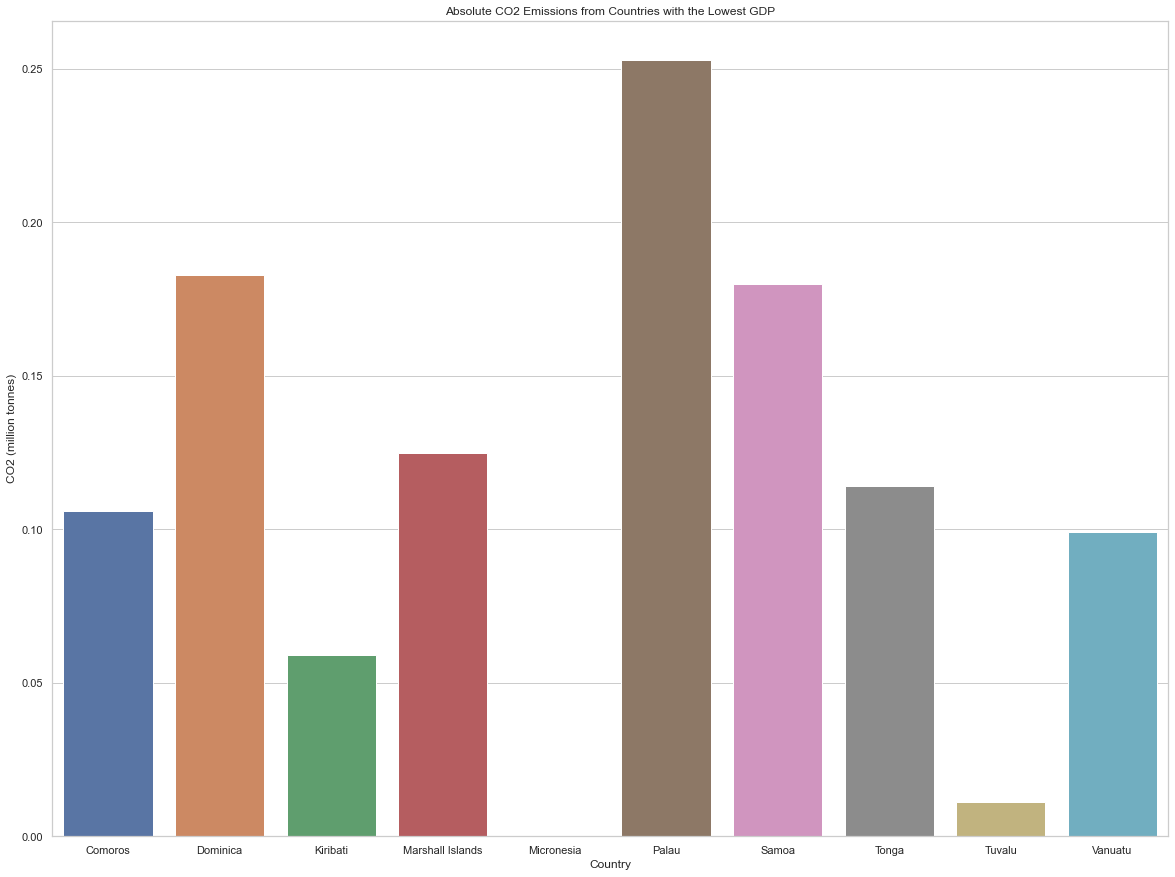

In [138]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_low10_07)
plt.title("Absolute CO2 Emissions from Countries with the Lowest GDP")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

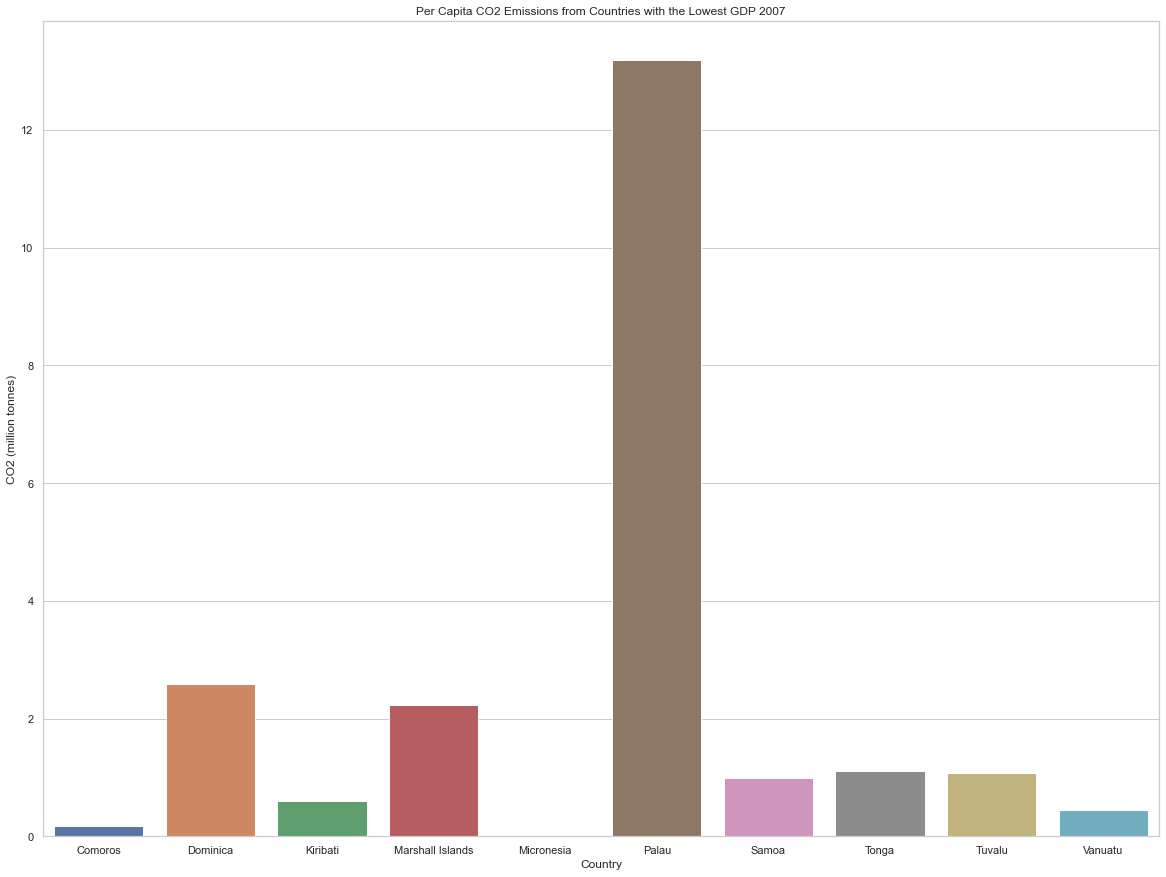

In [140]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_low10_07)
plt.title("Per Capita CO2 Emissions from Countries with the Lowest GDP 2007")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

### 2009

In [143]:
dfgdp_low_top09= dfgdp_low_top[dfgdp_low_top.year==2009]
dfgdp_low_top09[['country', 'year', 'co2']]

country  year       co2
3475             Brazil  2009   389.775
4269             Canada  2009   546.610
4712              China  2009  7886.533
4925            Comoros  2009     0.136
6136           Dominica  2009     0.161
8746             France  2009   368.631
9579            Germany  2009   790.295
10966             India  2009  1612.817
11801             Italy  2009   424.739
12025             Japan  2009  1163.213
12418          Kiribati  2009     0.055
14187  Marshall Islands  2009     0.132
14583        Micronesia  2009       NaN
17466             Palau  2009     0.198
19521             Samoa  2009     0.169
22614             Tonga  2009     0.132
23240            Tuvalu  2009     0.011
23835    United Kingdom  2009   493.895
24056     United States  2009  5478.210
24395           Vanuatu  2009     0.121

#### 2009 Highest GDP Emissions

In [144]:
dfgdp_top10_09 = dfgdp_low_top09
# Countries entered in order of GDP
countries =["United States", "China", "Japan","Germany","India","United Kingdom",
            "France", "Brazil", "Italy", "Canada"]
dfgdp_top10_09 = dfgdp_top10_09.loc[dfgdp_top10_09['country'].isin(countries)]

dfgdp_top10_09

iso_code         country  year       co2  consumption_co2  \
3475       BRA          Brazil  2009   389.775          407.131   
4269       CAN          Canada  2009   546.610          561.266   
4712       CHN           China  2009  7886.533         6729.098   
8746       FRA          France  2009   368.631          503.089   
9579       DEU         Germany  2009   790.295          931.350   
10966      IND           India  2009  1612.817         1539.689   
11801      ITA           Italy  2009   424.739          550.156   
12025      JPN           Japan  2009  1163.213         1363.150   
23835      GBR  United Kingdom  2009   493.895          656.702   
24056      USA   United States  2009  5478.210         5795.485   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
3475             -5.54         -22.863     17.356           2.010   
4269             -5.65         -32.757     14.656          16.198   
4712              5.20         389.701  -1157.435           5.794   
8746             -4.99         -19.361    134.458           5.894   
9579             -7.56         -64.632    141.056           9.769   
10966            10.25         150.002    -73.128           1.324   
11801           -11.31         -54.164    125.417           7.186   
12025            -5.61         -69.101    199.937           9.048   
23835            -9.29         -50.603    162.808           7.861   
24056            -7.37        -435.868    317.275          17.885   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
3475                        2.100  ...           7.392   404.17   
4269                       16.632  ...          23.733    95.76   
4712                        4.944  ...           6.604  1026.00   
8746                        8.044  ...           6.478    66.40   
9579                       11.512  ...          10.311    60.91   
10966                       1.264  ...           1.934   655.71   
11801                       9.308  ...           7.265    49.17   
12025                      10.604  ...           7.801    25.28   
23835                      10.452  ...           9.054    70.15   
24056                      18.920  ...          19.150   679.85   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
3475                2.085         152.95                     0.789   
4269                2.838          40.22                     1.192   
4712                0.754         478.86                     0.352   
8746                1.062          39.69                     0.635   
9579                0.753          43.88                     0.542   
10966               0.538         233.53                     0.192   
11801               0.832          19.50                     0.330   
12025               0.197          20.23                     0.157   
23835               1.117          28.92                     0.460   
24056               2.219         246.01                     0.803   

         population           gdp  primary_energy_consumption  \
3475   1.938865e+08  2.587478e+12                    2771.813   
4269   3.374609e+07  1.361508e+12                    3537.741   
4712   1.361169e+09  1.157254e+13                   27089.785   
8746   6.254288e+07  2.294315e+12                    2873.505   
9579   8.089996e+07  3.189040e+12                    3653.974   
10966  1.217726e+09  4.945731e+12                    5978.990   
11801  5.910562e+07  2.013345e+12                    1964.093   
12025  1.285552e+08  4.287890e+12                    5509.297   
23835  6.282862e+07  2.151646e+12                    2423.059   
24056  3.063076e+08  1.489429e+13                   24978.914   

       energy_per_capita  energy_per_gdp  
3475           14296.021           1.205  
4269          104834.380           2.680  
4712           19901.852           2.441  
8746           45944.468           1.260  
9579           45166.556           1.131  
10966           4909.964 

Text(0, 0.5, 'CO2 (million tonnes)')

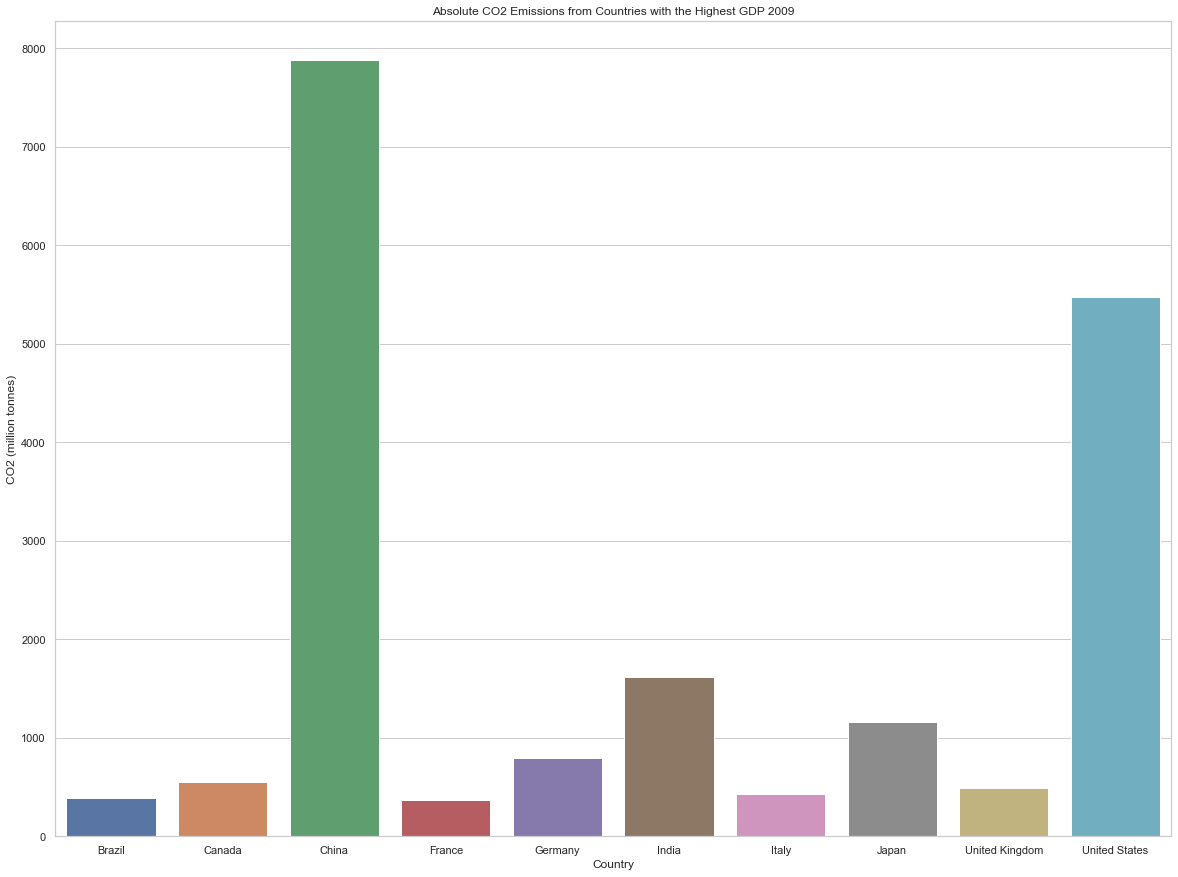

In [145]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_top10_09)
plt.title("Absolute CO2 Emissions from Countries with the Highest GDP 2009")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

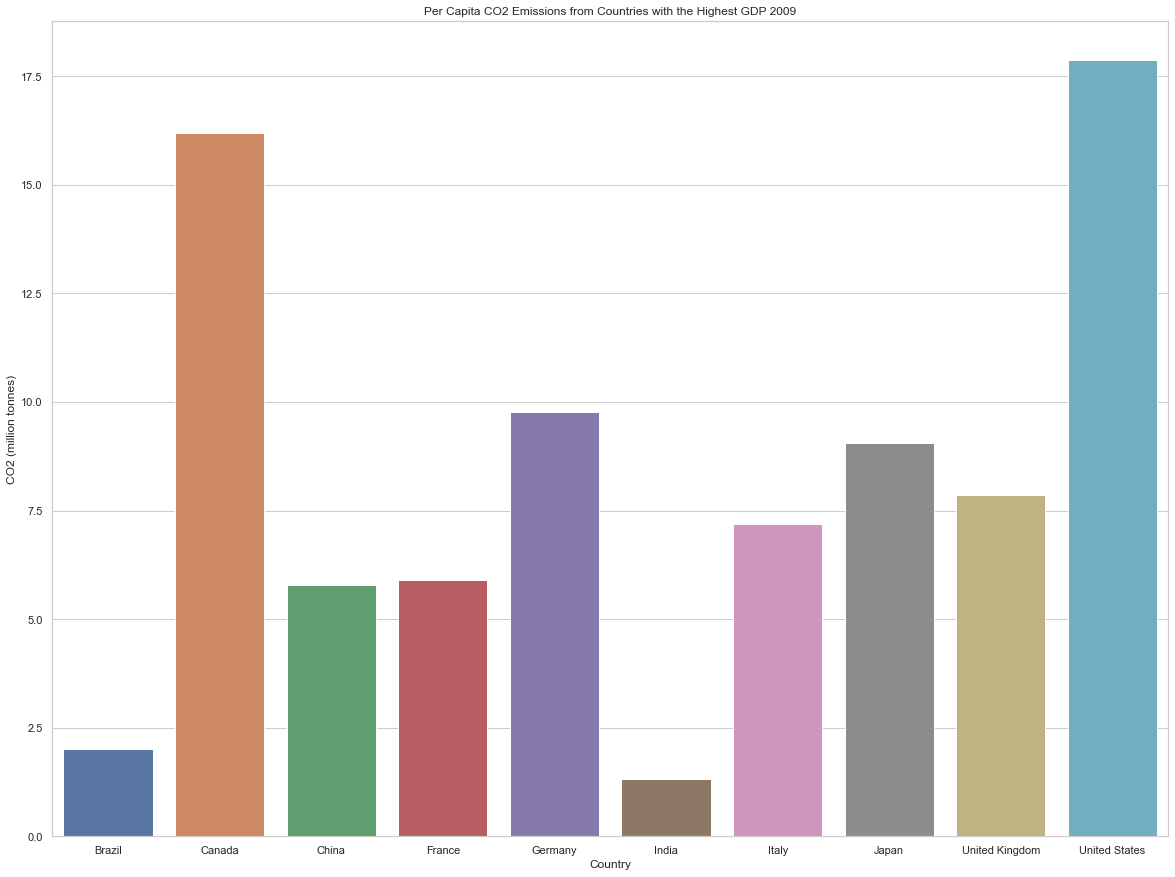

In [147]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_top10_09)
plt.title("Per Capita CO2 Emissions from Countries with the Highest GDP 2009")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

#### 2009 Lowest GDP Emissions

In [150]:
dfgdp_low10_09 = dfgdp_low_top09
# Countries entered in order of GDP
countries =["Comoros","Vanuatu", "Samoa","Dominica",
            "Tonga", "Micronesia", "Palau", "Marshall Islands",
            "Kiribati", "Tuvalu"]
dfgdp_low10_09 = dfgdp_low10_09.loc[dfgdp_low10_09['country'].isin(countries)]

dfgdp_low10_09

iso_code           country  year    co2  consumption_co2  \
4925       COM           Comoros  2009  0.136              NaN   
6136       DMA          Dominica  2009  0.161              NaN   
12418      KIR          Kiribati  2009  0.055              NaN   
14187      MHL  Marshall Islands  2009  0.132              NaN   
14583      NaN        Micronesia  2009    NaN              NaN   
17466      PLW             Palau  2009  0.198              NaN   
19521      WSM             Samoa  2009  0.169              NaN   
22614      TON             Tonga  2009  0.132              NaN   
23240      TUV            Tuvalu  2009  0.011              NaN   
24395      VUT           Vanuatu  2009  0.121              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
4925             23.33           0.026        NaN           0.201   
6136             -2.22          -0.004        NaN           2.276   
12418           -16.67          -0.011        NaN           0.544   
14187             2.86           0.004        NaN           2.345   
14583              NaN             NaN        NaN             NaN   
17466            -3.57          -0.007        NaN          10.818   
19521             4.55           0.007        NaN           0.913   
22614             9.09           0.011        NaN           1.270   
23240             0.00           0.000        NaN           1.056   
24395            26.92           0.026        NaN           0.525   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
4925                          NaN  ...           0.698     0.22   
6136                          NaN  ...          10.141     0.04   
12418                         NaN  ...           0.594     0.02   
14187                         NaN  ...           2.500     0.03   
14583                         NaN  ...             NaN     0.05   
17466                         NaN  ...          15.000     0.02   
19521                         NaN  ...          -0.216     0.27   
22614                         NaN  ...          -1.923     0.09   
23240                         NaN  ...           2.000     0.01   
24395                         NaN  ...           3.000     0.44   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
4925                0.327           0.05                     0.074   
6136                0.563           0.02                     0.282   
12418               0.198           0.00                     0.000   
14187               0.536           0.00                     0.000   
14583                 NaN           0.02                       NaN   
17466               1.111           0.00                     0.000   
19521               1.459           0.05                     0.270   
22614               0.865           0.08                     0.769   
23240               1.000           0.00                     0.000   
24395               1.913           0.15                     0.652   

       population           gdp  primary_energy_consumption  \
4925     673251.0  1.004145e+09                       0.594   
6136      70848.0  6.213656e+08                       0.745   
12418    100928.0           NaN                       0.264   
14187     56255.0           NaN                         NaN   
14583         NaN           NaN                         NaN   
17466     18290.0           NaN                         NaN   
19521    184553.0           NaN                       1.089   
22614    103897.0           NaN                       0.587   
23240     10413.0           NaN                         NaN   
24395    230244.0           NaN                       0.658   

       energy_per_capita  energy_per_gdp  
4925             882.349           0.581  
6136           10499.117           1.207  
12418           2611.456             NaN  
14187                NaN             NaN  
14583                NaN             NaN  
17466                NaN             NaN  
19521          

Text(0, 0.5, 'CO2 (million tonnes)')

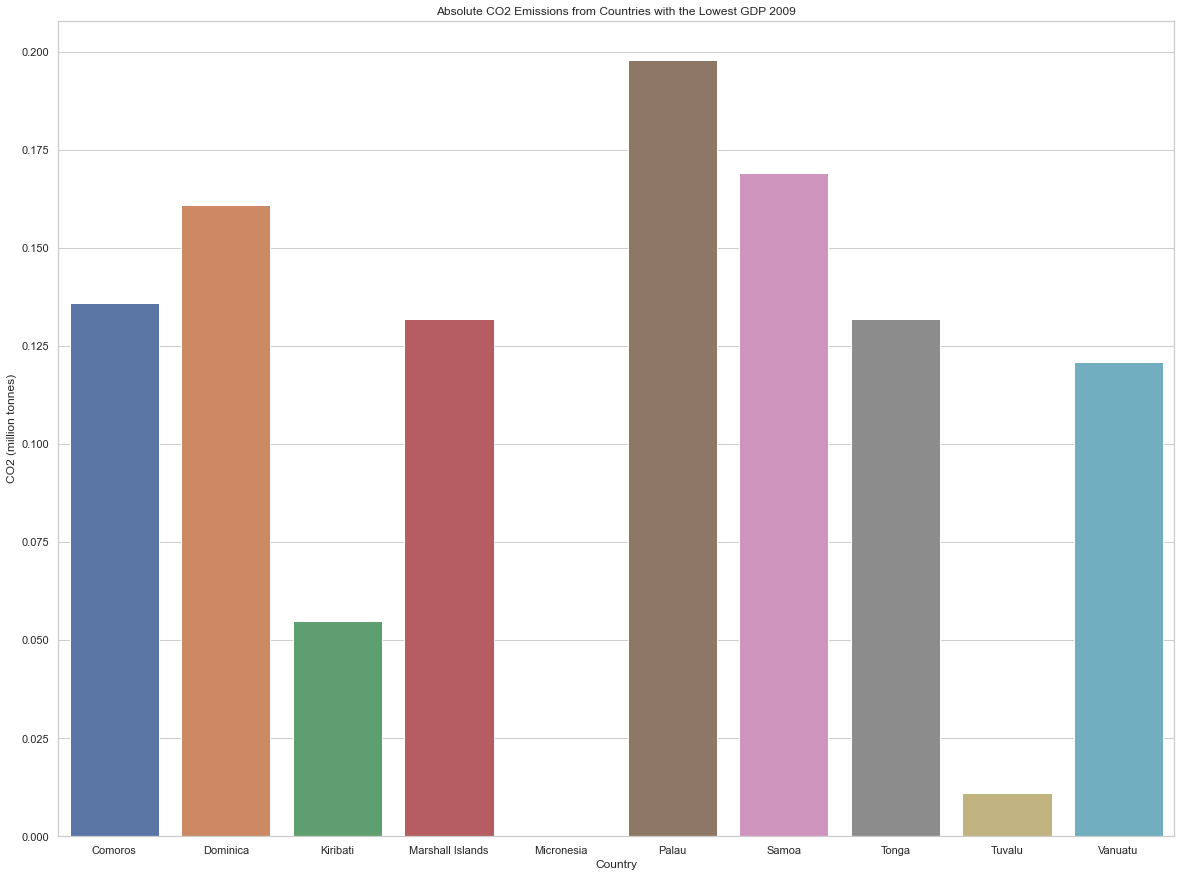

In [151]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dfgdp_low10_09)
plt.title("Absolute CO2 Emissions from Countries with the Lowest GDP 2009")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

Text(0, 0.5, 'CO2 (million tonnes)')

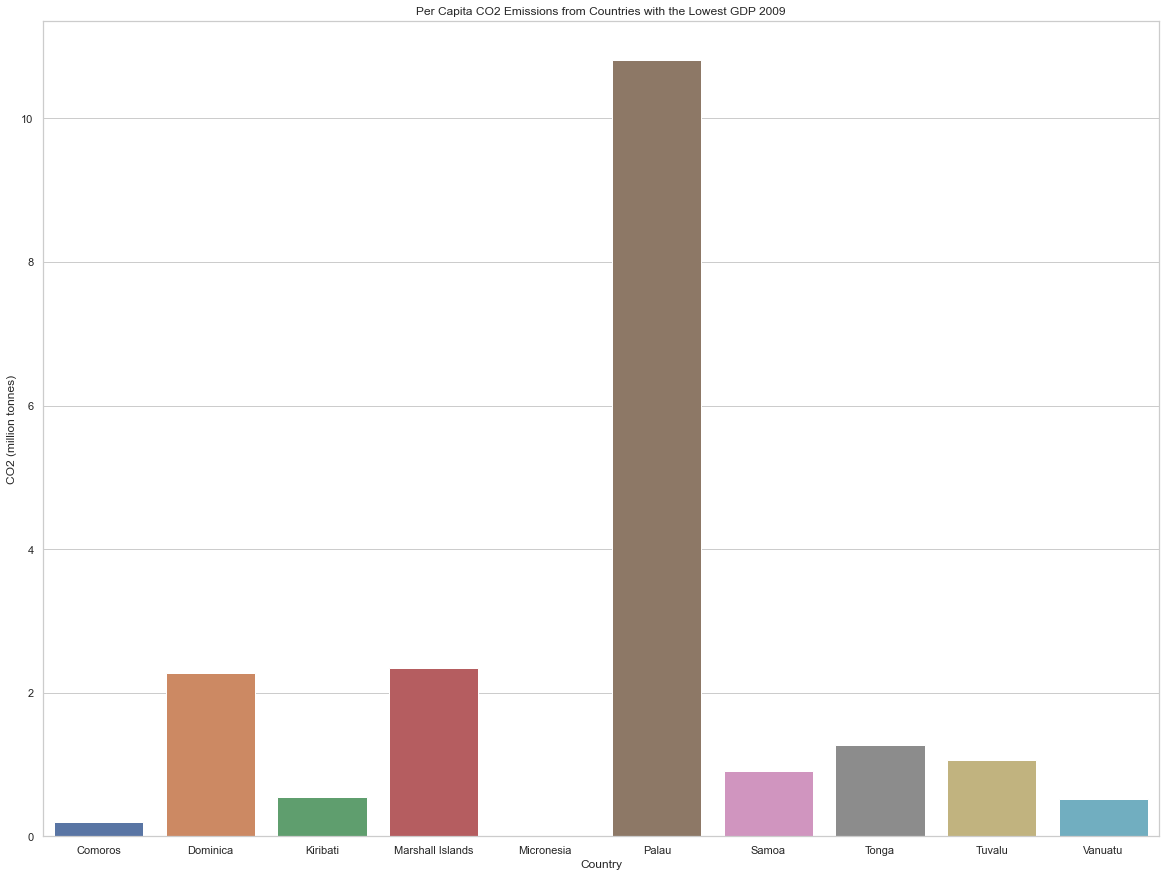

In [152]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dfgdp_low10_09)
plt.title("Per Capita CO2 Emissions from Countries with the Lowest GDP 2009")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

## Three Largest Emitters

Here I will examine the three largest emitters of CO<sub>2</sub>. The three largest emitters are United States, China and Russia.

### Per Capita

#### United States

In [164]:
dfUS_per_capita=dfc02percapita.loc[dfc02percapita.country=='United States']
dfUS_per_capita.set_index('country')
dfUS_per_capita

country  year   population  co2_per_capita
23847  United States  1800    6000000.0           0.042
23848  United States  1801    6113782.0           0.044
23849  United States  1802    6229723.0           0.046
23850  United States  1803    6347862.0           0.047
23851  United States  1804    6468241.0           0.052
...              ...   ...          ...             ...
24063  United States  2016  323015992.0          16.247
24064  United States  2017  325084758.0          16.020
24065  United States  2018  327096263.0          16.434
24066  United States  2019  329064917.0          15.972
24067  United States  2020  331002647.0          14.238

[221 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

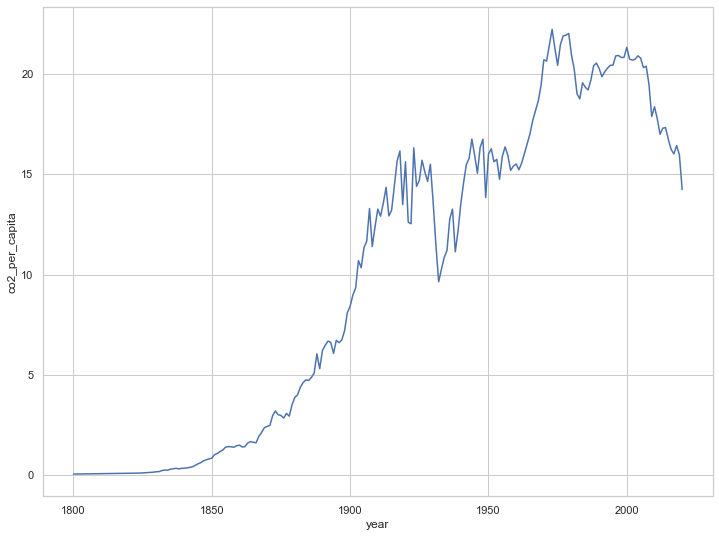

In [77]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfUS_per_capita, x='year', y='co2_per_capita')

#### China

In [172]:
dfChina_per_capita=dfc02percapita.loc[dfc02percapita.country=='China']
dfChina_per_capita.set_index('country')
dfChina_per_capita

country  year    population  co2_per_capita
4602   China  1899  3.994218e+08           0.000
4603   China  1900  4.015797e+08             NaN
4604   China  1901  4.037865e+08             NaN
4605   China  1902  4.060427e+08           0.000
4606   China  1903  4.083487e+08           0.005
...      ...   ...           ...             ...
4719   China  2016  1.414049e+09           6.874
4720   China  2017  1.421022e+09           6.981
4721   China  2018  1.427648e+09           7.208
4722   China  2019  1.433784e+09           7.316
4723   China  2020  1.439324e+09           7.412

[122 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

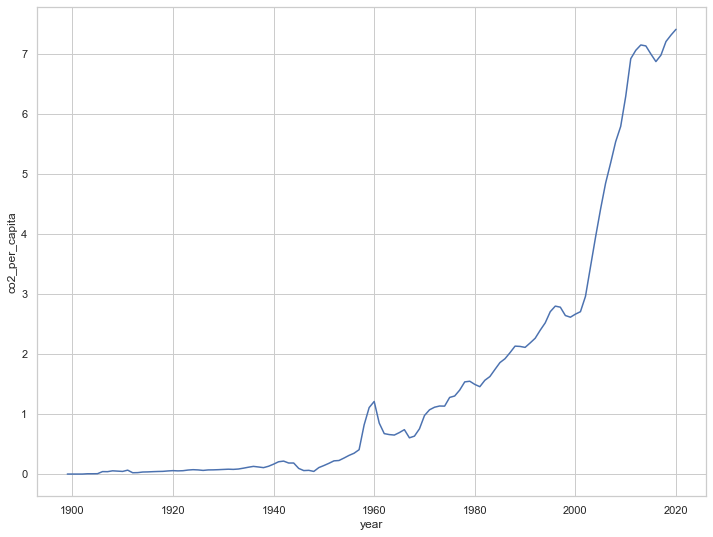

In [79]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfChina_per_capita, x='year', y='co2_per_capita')

#### Russia

In [166]:
dfRussia_per_capita=dfc02percapita.loc[dfc02percapita.country=='Russia']
dfRussia_per_capita.set_index('country')
dfRussia_per_capita

country  year   population  co2_per_capita
18825  Russia  1830   34361978.0           0.000
18826  Russia  1831   34679300.0           0.000
18827  Russia  1832   34999553.0           0.000
18828  Russia  1833   35322763.0           0.000
18829  Russia  1834   35648958.0             NaN
...       ...   ...          ...             ...
19011  Russia  2016  145275374.0          11.142
19012  Russia  2017  145530091.0          11.314
19013  Russia  2018  145734034.0          11.608
19014  Russia  2019  145872260.0          11.513
19015  Russia  2020  145934460.0          10.807

[191 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

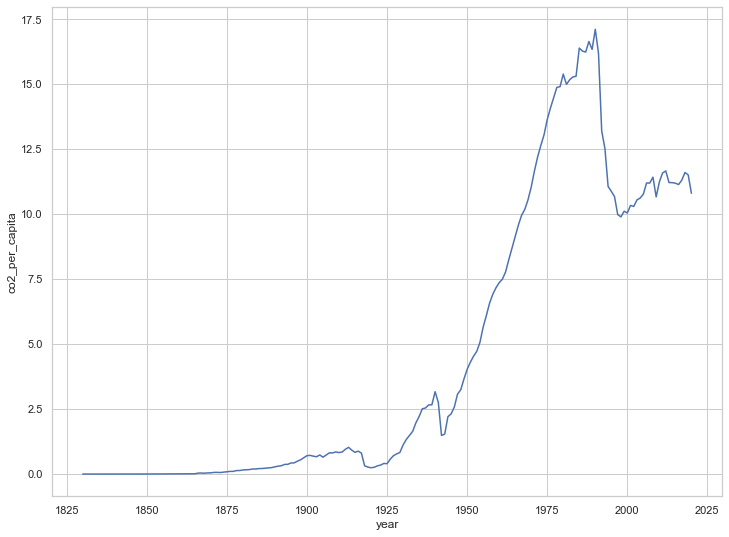

In [167]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfRussia_per_capita, x='year', y='co2_per_capita')

#### Top Three Per Capita

In [168]:
dftop3 = dfco2_Data.copy()
countries =["China", "United States", "Russia"]

dftop3= dftop3.loc[dftop3['country'].isin(countries)]
dftop3

iso_code        country  year       co2  consumption_co2  \
4602       CHN          China  1899     0.095              NaN   
4603       CHN          China  1900       NaN              NaN   
4604       CHN          China  1901       NaN              NaN   
4605       CHN          China  1902     0.095              NaN   
4606       CHN          China  1903     1.964              NaN   
...        ...            ...   ...       ...              ...   
24063      USA  United States  2016  5248.024         5576.720   
24064      USA  United States  2017  5207.751         5550.772   
24065      USA  United States  2018  5375.491         5726.611   
24066      USA  United States  2019  5255.816         5625.784   
24067      USA  United States  2020  4712.771              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
4602               NaN             NaN        NaN           0.000   
4603              0.00             NaN        NaN             NaN   
4604              0.00             NaN        NaN             NaN   
4605              0.00             NaN        NaN           0.000   
4606           1961.54           1.869        NaN           0.005   
...                ...             ...        ...             ...   
24063            -2.30        -123.747    328.696          16.247   
24064            -0.77         -40.273    343.021          16.020   
24065             3.22         167.739    351.120          16.434   
24066            -2.23        -119.674    369.967          15.972   
24067           -10.33        -543.046        NaN          14.238   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
4602                          NaN  ...             NaN      NaN   
4603                          NaN  ...             NaN      NaN   
4604                          NaN  ...             NaN      NaN   
4605                          NaN  ...             NaN      NaN   
4606                          NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
24063                      17.264  ...          18.059   629.38   
24064                      17.075  ...             NaN      NaN   
24065                      17.507  ...             NaN      NaN   
24066                      17.096  ...             NaN      NaN   
24067                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
4602                  NaN            NaN                       NaN   
4603                  NaN            NaN                       NaN   
4604                  NaN            NaN                       NaN   
4605                  NaN            NaN                       NaN   
4606                  NaN            NaN                       NaN   
...                   ...            ...                       ...   
24063               1.948          251.7                     0.779   
24064                 NaN            NaN                       NaN   
24065                 NaN            NaN                       NaN   
24066                 NaN            NaN                       NaN   
24067                 NaN            NaN                       NaN   

        population           gdp  primary_energy_consumption  \
4602   399421783.0           NaN                         NaN   
4603   401579661.0  3.888000e+11                         NaN   
4604   403786465.0           NaN                         NaN   
4605   406042669.0           NaN                         NaN   
4606   408348748.0           NaN                         NaN   
...            ...           ...                         ...   
24063  323015992.0  1.716256e+13                   25560.520   
24064  325084758.0  1.759628e+13                   25647.389   
24065  327096263.0  1.814065e+13                   26556.388   
24066  329064917.0           NaN                   26291.355   
24067  331002647.0           NaN  

<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

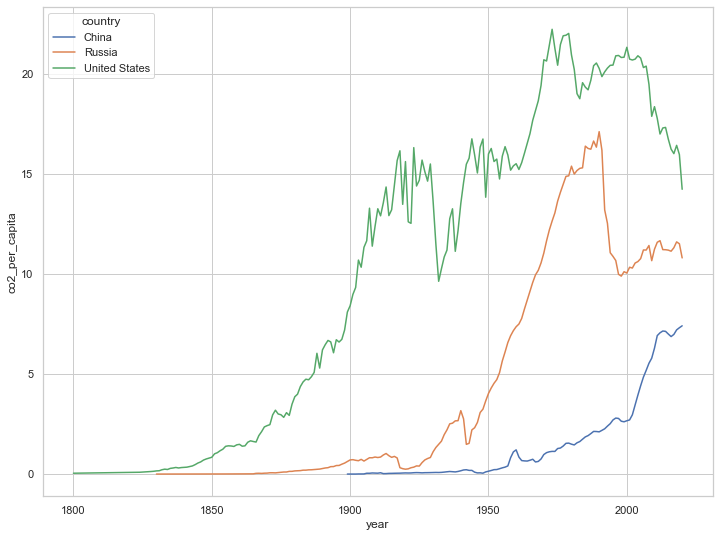

In [169]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftop3, x='year', y='co2_per_capita', hue='country')

Text(0, 0.5, 'CO2 (million tonnes)')

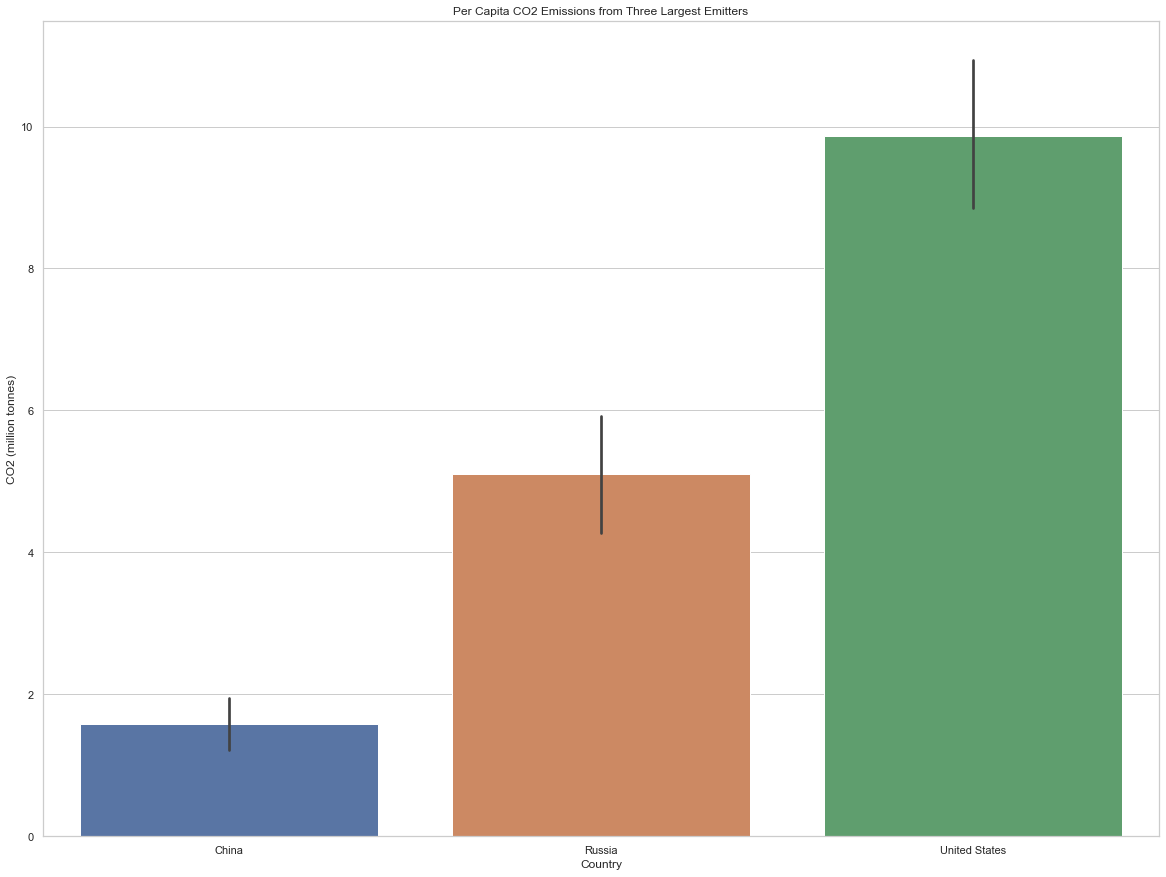

In [171]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2_per_capita", data = dftop3)
plt.title("Per Capita CO2 Emissions from Three Largest Emitters")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

### Per Capita

#### United States

In [173]:
dfUSco2=dfc02.loc[dfc02.country=='United States']
dfUSco2.set_index('country')
dfUSco2

country  year   population       co2
23847  United States  1800    6000000.0     0.253
23848  United States  1801    6113782.0     0.267
23849  United States  1802    6229723.0     0.289
23850  United States  1803    6347862.0     0.297
23851  United States  1804    6468241.0     0.333
...              ...   ...          ...       ...
24063  United States  2016  323015992.0  5248.024
24064  United States  2017  325084758.0  5207.751
24065  United States  2018  327096263.0  5375.491
24066  United States  2019  329064917.0  5255.816
24067  United States  2020  331002647.0  4712.771

[221 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

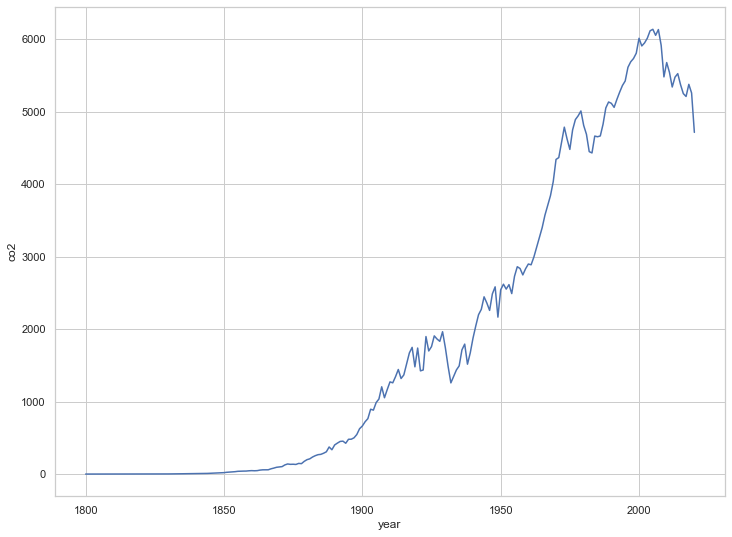

In [175]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfUSco2, x='year', y='co2')

#### China

In [176]:
dfChinaco2=dfc02.loc[dfc02.country=='China']
dfChinaco2.set_index('country')
dfChinaco2

country  year    population        co2
4602   China  1899  3.994218e+08      0.095
4603   China  1900  4.015797e+08        NaN
4604   China  1901  4.037865e+08        NaN
4605   China  1902  4.060427e+08      0.095
4606   China  1903  4.083487e+08      1.964
...      ...   ...           ...        ...
4719   China  2016  1.414049e+09   9720.444
4720   China  2017  1.421022e+09   9920.459
4721   China  2018  1.427648e+09  10289.990
4722   China  2019  1.433784e+09  10489.989
4723   China  2020  1.439324e+09  10667.887

[122 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

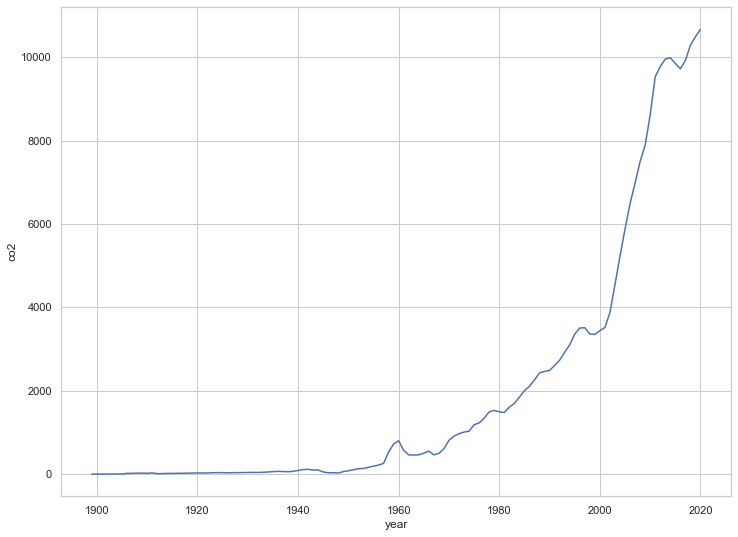

In [179]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfChinaco2, x='year', y='co2')

#### Russia

In [180]:
dfRussia_co2=dfc02.loc[dfc02.country=='Russia']
dfRussia_co2.set_index('country')
dfRussia_co2

country  year   population       co2
18825  Russia  1830   34361978.0     0.011
18826  Russia  1831   34679300.0     0.013
18827  Russia  1832   34999553.0     0.009
18828  Russia  1833   35322763.0     0.011
18829  Russia  1834   35648958.0       NaN
...       ...   ...          ...       ...
19011  Russia  2016  145275374.0  1618.599
19012  Russia  2017  145530091.0  1646.457
19013  Russia  2018  145734034.0  1691.647
19014  Russia  2019  145872260.0  1679.449
19015  Russia  2020  145934460.0  1577.136

[191 rows x 4 columns]

<AxesSubplot:xlabel='year', ylabel='co2'>

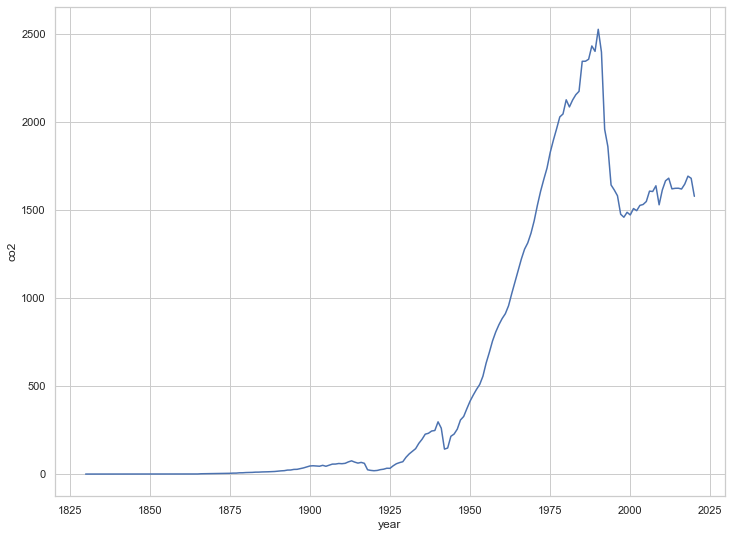

In [181]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfRussia_co2, x='year', y='co2')

In [183]:
dftop3_co2 = dfco2_Data.copy()
countries =["China", "United States", "Russia"]

dftop3_co2= dftop3_co2.loc[dftop3_co2['country'].isin(countries)]
dftop3_co2

iso_code        country  year       co2  consumption_co2  \
4602       CHN          China  1899     0.095              NaN   
4603       CHN          China  1900       NaN              NaN   
4604       CHN          China  1901       NaN              NaN   
4605       CHN          China  1902     0.095              NaN   
4606       CHN          China  1903     1.964              NaN   
...        ...            ...   ...       ...              ...   
24063      USA  United States  2016  5248.024         5576.720   
24064      USA  United States  2017  5207.751         5550.772   
24065      USA  United States  2018  5375.491         5726.611   
24066      USA  United States  2019  5255.816         5625.784   
24067      USA  United States  2020  4712.771              NaN   

       co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
4602               NaN             NaN        NaN           0.000   
4603              0.00             NaN        NaN             NaN   
4604              0.00             NaN        NaN             NaN   
4605              0.00             NaN        NaN           0.000   
4606           1961.54           1.869        NaN           0.005   
...                ...             ...        ...             ...   
24063            -2.30        -123.747    328.696          16.247   
24064            -0.77         -40.273    343.021          16.020   
24065             3.22         167.739    351.120          16.434   
24066            -2.23        -119.674    369.967          15.972   
24067           -10.33        -543.046        NaN          14.238   

       consumption_co2_per_capita  ...  ghg_per_capita  methane  \
4602                          NaN  ...             NaN      NaN   
4603                          NaN  ...             NaN      NaN   
4604                          NaN  ...             NaN      NaN   
4605                          NaN  ...             NaN      NaN   
4606                          NaN  ...             NaN      NaN   
...                           ...  ...             ...      ...   
24063                      17.264  ...          18.059   629.38   
24064                      17.075  ...             NaN      NaN   
24065                      17.507  ...             NaN      NaN   
24066                      17.096  ...             NaN      NaN   
24067                         NaN  ...             NaN      NaN   

       methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
4602                  NaN            NaN                       NaN   
4603                  NaN            NaN                       NaN   
4604                  NaN            NaN                       NaN   
4605                  NaN            NaN                       NaN   
4606                  NaN            NaN                       NaN   
...                   ...            ...                       ...   
24063               1.948          251.7                     0.779   
24064                 NaN            NaN                       NaN   
24065                 NaN            NaN                       NaN   
24066                 NaN            NaN                       NaN   
24067                 NaN            NaN                       NaN   

        population           gdp  primary_energy_consumption  \
4602   399421783.0           NaN                         NaN   
4603   401579661.0  3.888000e+11                         NaN   
4604   403786465.0           NaN                         NaN   
4605   406042669.0           NaN                         NaN   
4606   408348748.0           NaN                         NaN   
...            ...           ...                         ...   
24063  323015992.0  1.716256e+13                   25560.520   
24064  325084758.0  1.759628e+13                   25647.389   
24065  327096263.0  1.814065e+13                   26556.388   
24066  329064917.0           NaN                   26291.355   
24067  331002647.0           NaN  

<AxesSubplot:xlabel='year', ylabel='co2'>

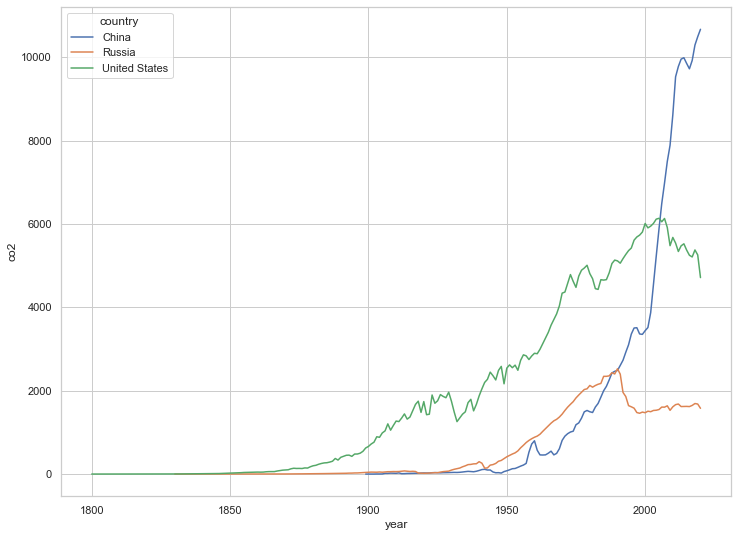

In [184]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftop3_co2, x='year', y='co2', hue='country')

Text(0, 0.5, 'CO2 (million tonnes)')

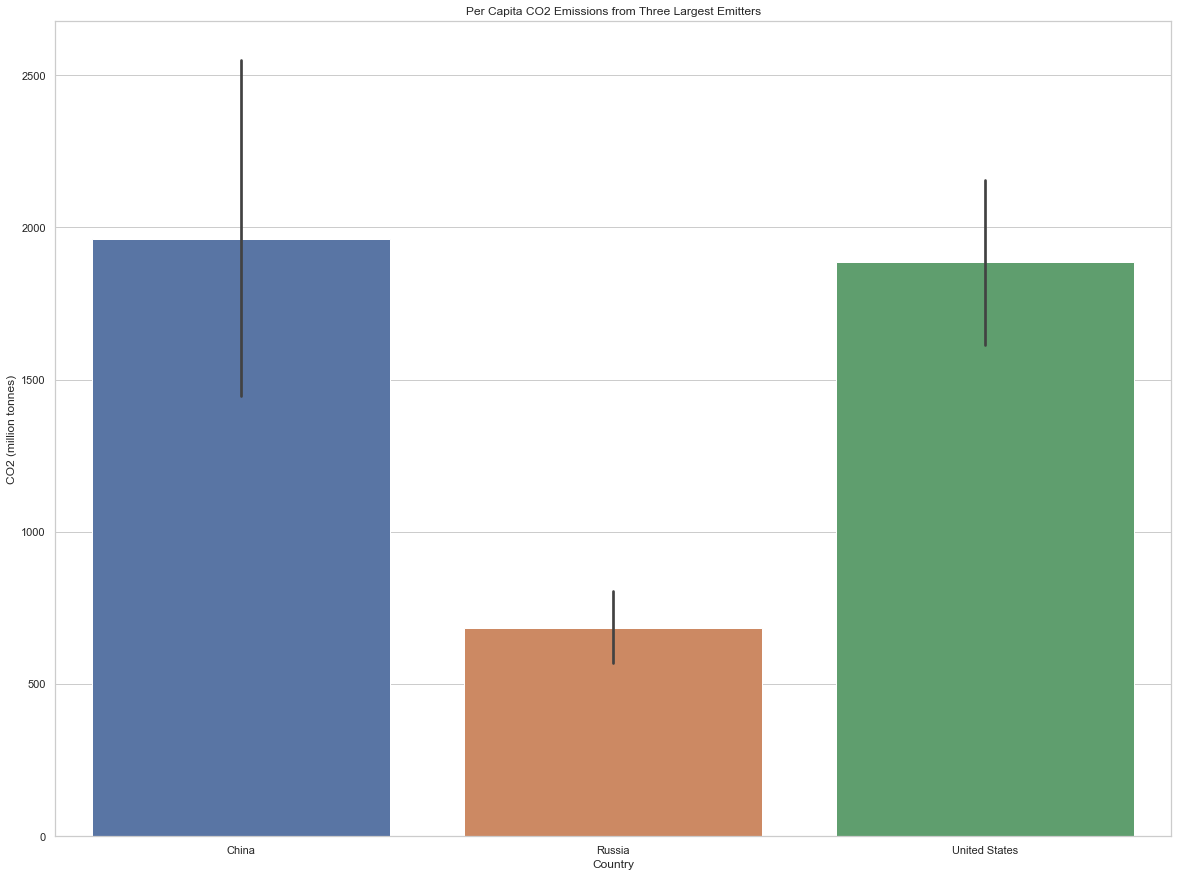

In [185]:
sns.set(style="whitegrid", rc={'figure.figsize':(20,15)})
sns.barplot(x = "country", y = "co2", data = dftop3_co2)
plt.title("Per Capita CO2 Emissions from Three Largest Emitters")
plt.xlabel("Country")
plt.ylabel("CO2 (million tonnes)")

## Conclusion

I believe I have shown in this notebook the link between high GDP and CO<sub>2</sub> emissions both in terms of absolute and per capita. Population also plays a role in CO<sub>2</sub> emissions but the main driver of per capita emissions is GDP.

## References
<sup>1</sup>[owidco2data](https://github.com/owid/co2-data/blob/master/owid-co2-data.xlsx)  
<sup>2</sup>[Global Emissions](https://www.c2es.org/content/international-emissions/)  
<sup>3</sup>[CO<sub>2</sub> and Greenhouse Gas Emissions](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)  
<sup>4</sup>[Countries in Europe](https://www.worldometers.info/geography/how-many-countries-in-europe/)  
<sup>5</sup>[Eurostat GDP](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Volume_indices_of_GDP_and_AIC_per_capita,_2020,_(EU%3D100)_update_December.png)  
<sup>6</sup>[Developed Countries Are Responsible for 79 Percent of Historical Carbon Emissions](https://www.cgdev.org/media/who-caused-climate-change-historically)  
<sup>7</sup>[GDP by Country](https://www.worldometers.info/gdp/gdp-by-country/)  